# Cybersecurity Intrusion Detection Dataset - EDA

### [Cybersecurity Intrusion Detection](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Citation

[1] Dinesh Naveen Kumar Samudrala, https://kaggle.com/dnkumars

## Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('cybersecurity_intrusion_data.csv')

## Perform Essential Exploration & Data Cleaning

#### Display the initial number of rows and columns.

In [3]:
df.shape

(9537, 11)

#### Display the initial variable names and their associated data types.

In [4]:
df.dtypes

session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object

#### Display the number of missing values for each column, remove the missing values and create a clean copy of the dataset.

In [5]:
df.isna().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [6]:
df.encryption_used.value_counts()

encryption_used
AES    4706
DES    2865
Name: count, dtype: int64

In [7]:
df['encryption_used'] = df['encryption_used'].fillna('NONE')

In [8]:
df_clean = df.dropna().copy()

In [9]:
df.shape

(9537, 11)

In [10]:
df_clean.isna().sum()

session_id             0
network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

#### Display the number of unique values for each column after removing missing data and before initial exploration.

In [11]:
df_clean.nunique()

session_id             9537
network_packet_size     959
protocol_type             3
login_attempts           13
session_duration       9532
encryption_used           3
ip_reputation_score    9537
failed_logins             6
browser_type              5
unusual_time_access       2
attack_detected           2
dtype: int64

#### Display the number of unique values for the categorical variables after removing missing data and before initial exploration.

In [12]:
df_clean.select_dtypes(exclude='number').nunique()

session_id         9537
protocol_type         3
encryption_used       3
browser_type          5
dtype: int64

#### Display the number of unique values for the continuous variables after removing missing data and before initial exploration.

In [13]:
df_clean.select_dtypes(include='number').nunique()

network_packet_size     959
login_attempts           13
session_duration       9532
ip_reputation_score    9537
failed_logins             6
unusual_time_access       2
attack_detected           2
dtype: int64

#### Consider `session_id` and evaluate whether to include its data as a feature in the model.

We will drop `session_id` because it's a high‑cardinality identifier (mostly unique per record) that carries no predictive signal, inflates dimensionality, and risks overfitting.

In [14]:
df_clean.session_id.value_counts()

session_id
SID_00001    1
SID_06354    1
SID_06356    1
SID_06357    1
SID_06358    1
            ..
SID_03180    1
SID_03181    1
SID_03182    1
SID_03183    1
SID_09537    1
Name: count, Length: 9537, dtype: int64

In [15]:
df_clean.session_id.nunique()

9537

In [16]:
df_clean = df_clean.drop(columns=['session_id'])

#### Save the cleaned dataset for use in other project notebooks.

In [17]:
df_clean.to_csv('cybersecurity_intrusion_data-clean.csv', index=False)

## Convert Data: Long Format

### Categorical Names

In [18]:
df_clean_category_names = df_clean.select_dtypes(['object', 
                                                  'category']). \
                                                  columns. \
                                                  tolist()

In [19]:
df_clean_category_names

['protocol_type', 'encryption_used', 'browser_type']

### Numeric Names

In [20]:
df_clean_numeric_names = df_clean.select_dtypes('number'). \
                                  columns. \
                                  tolist()

In [21]:
df_clean_numeric_names

['network_packet_size',
 'login_attempts',
 'session_duration',
 'ip_reputation_score',
 'failed_logins',
 'unusual_time_access',
 'attack_detected']

### Reshape

In [22]:
df_clean_lf = df_clean.reset_index().\
                       rename(columns={'index': 'rowid'}). \
                       melt(id_vars=['rowid'] + df_clean_category_names, 
                            value_vars=df_clean_numeric_names)

## Visually Explore Data

### Count Plots – Marginal Distributions of Each Categorical Variable, with Facets for Each Categorical Variable

The plots show heavy class imbalance where most traffic is TCP and from Chrome, AES is the most common encryption but DES and a notable NONE category remain substantial.

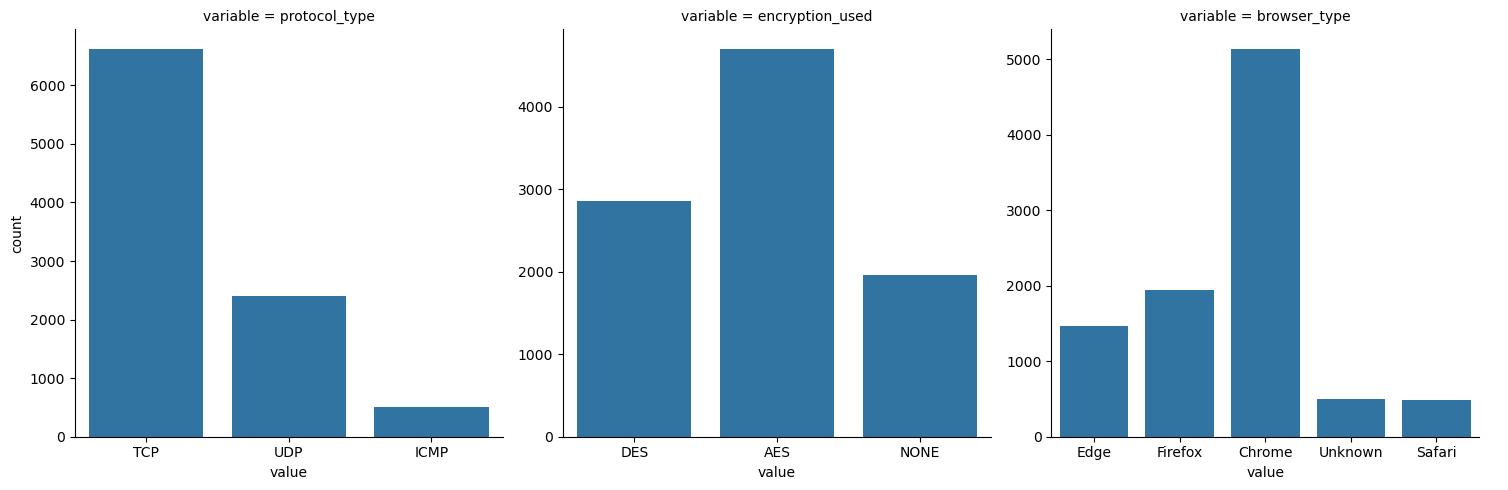

In [23]:
sns.catplot(data=df_clean.melt(value_vars=df_clean_category_names), 
            x='value', 
            col='variable', 
            col_wrap=3,
            kind='count',
            sharex=False,
            sharey=False)
plt.show()

### Count Plots – Marginal Distributions of the `protocol_type` Categorical Variable, with Facets for Each `encryption_used` Categorical Variable

TCP overwhelmingly dominates for DES, AES and NONE, UDP is much less frequent and ICMP is rare, with AES showing the highest total volume.

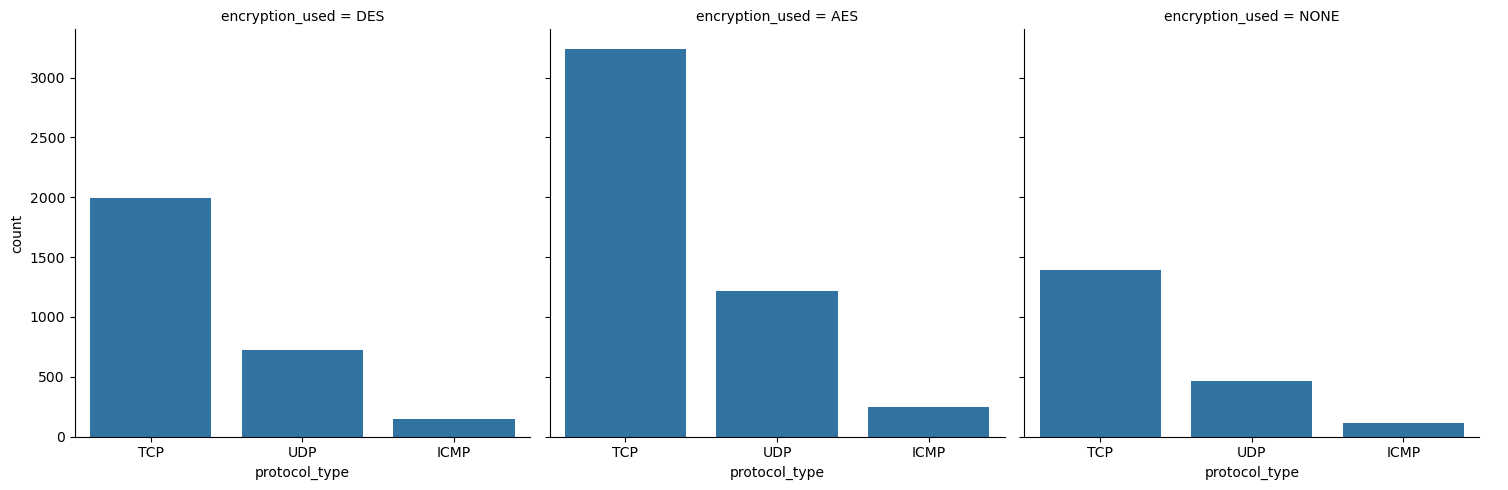

In [24]:
sns.catplot(data=df_clean, 
            x='protocol_type', 
            col='encryption_used', 
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `protocol_type` Categorical Variable, with Facets for Each `browser_type` Categorical Variable

TCP dominates for every browser, UDP is the second-most common, and ICMP is rare; Chrome has by far the largest volume (mostly TCP), Firefox and Edge are moderate, and Unknown and Safari have much smaller counts.

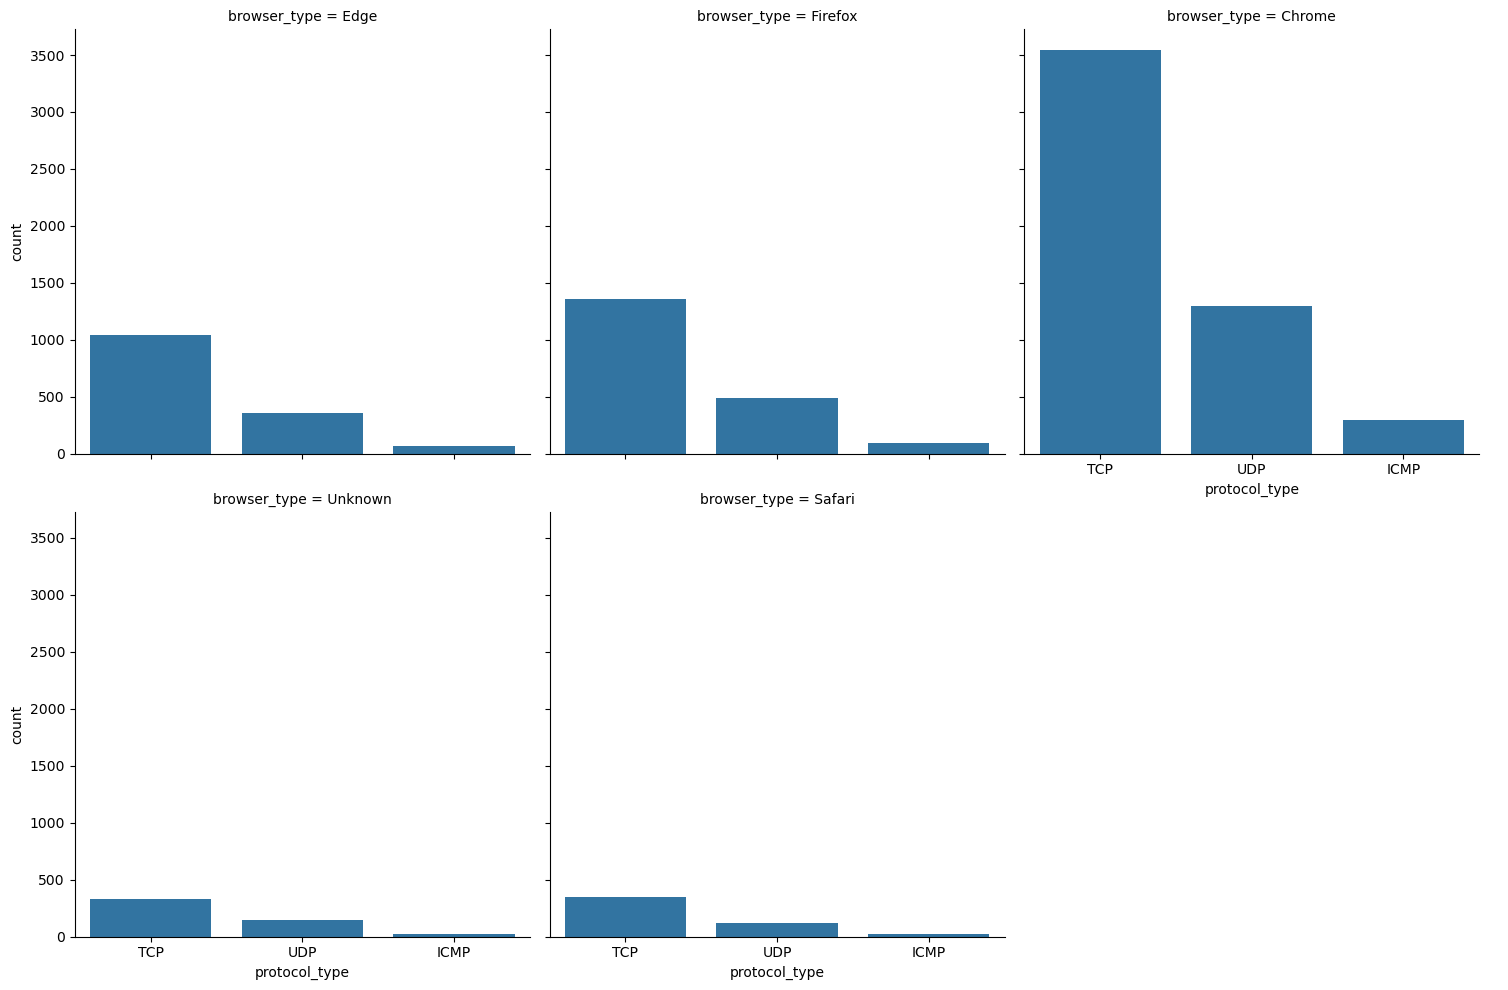

In [25]:
sns.catplot(data=df_clean, 
            x='protocol_type', 
            col='browser_type', 
            kind='count',
            col_wrap=3)
plt.show()

### Count Plots – Marginal Distributions of the `protocol_type` Categorical Variable, Colored by Each `encryption_used` Categorical Variable

TCP is the dominant protocol for all encryption types, AES has the highest counts overall, followed by DES and then NONE, UDP is the second-most common protocol and ICMP is rare; the pattern (AES > DES > NONE) holds across TCP, UDP and ICMP.

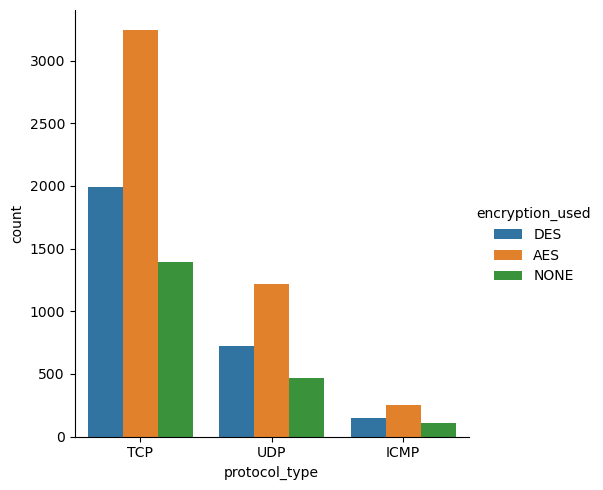

In [26]:
sns.catplot(data=df_clean, 
            x='protocol_type', 
            hue='encryption_used', 
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `protocol_type` Categorical Variable, with Facets for Each Combination of `encryption_used` and `browser_type` Categorical Variables

Edge/Firefox/Chrome/Unknown/Safari) and found TCP dominates in every panel, UDP is consistently the second-most common, ICMP is rare, Chrome panels have by far the largest counts while Unknown and Safari are much smaller, and the protocol mix looks similar across encryption types.

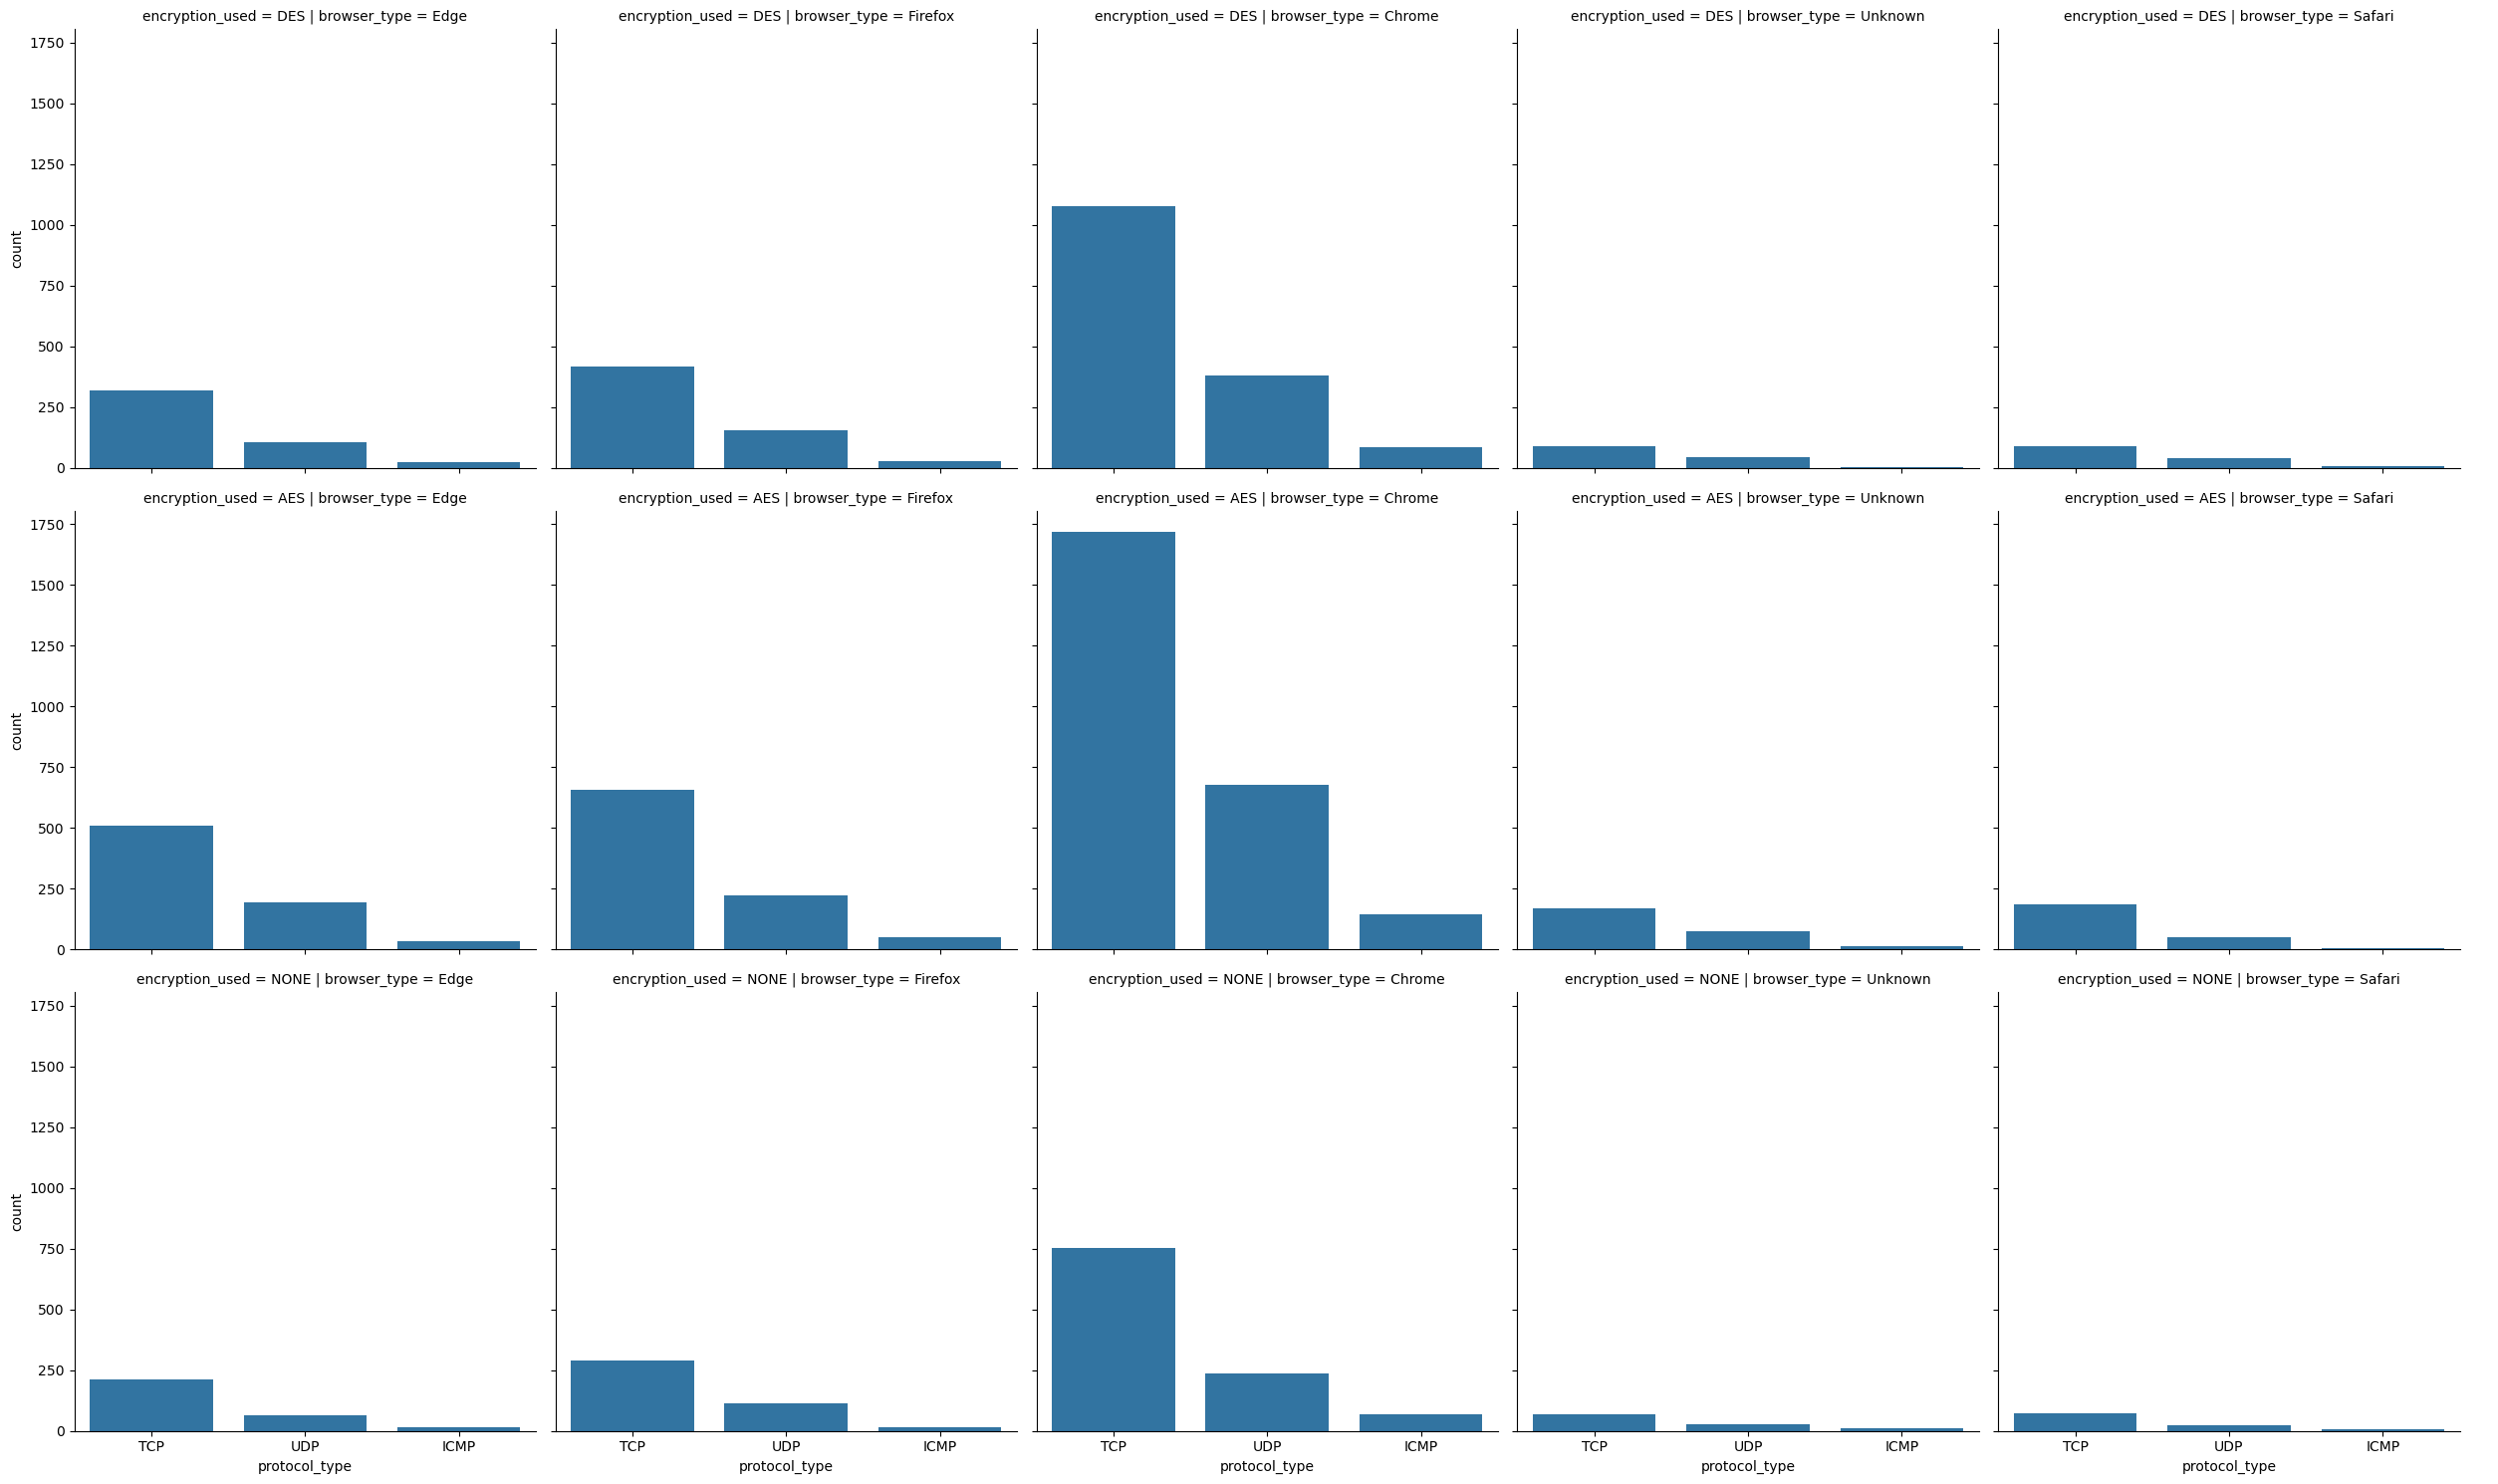

In [27]:
sns.catplot(data=df_clean, 
            x='protocol_type', 
            row='encryption_used',
            col='browser_type', 
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `protocol_type` Categorical Variable, Colored by Each `encryption_used` Categorical Variable, with Facets for Each `browser_type` Categorical Variable

TCP dominates in every panel, AES has the highest counts (especially for Chrome), UDP is consistently second and ICMP is rare, and Chrome shows far larger volume while Unknown and Safari are much smaller.

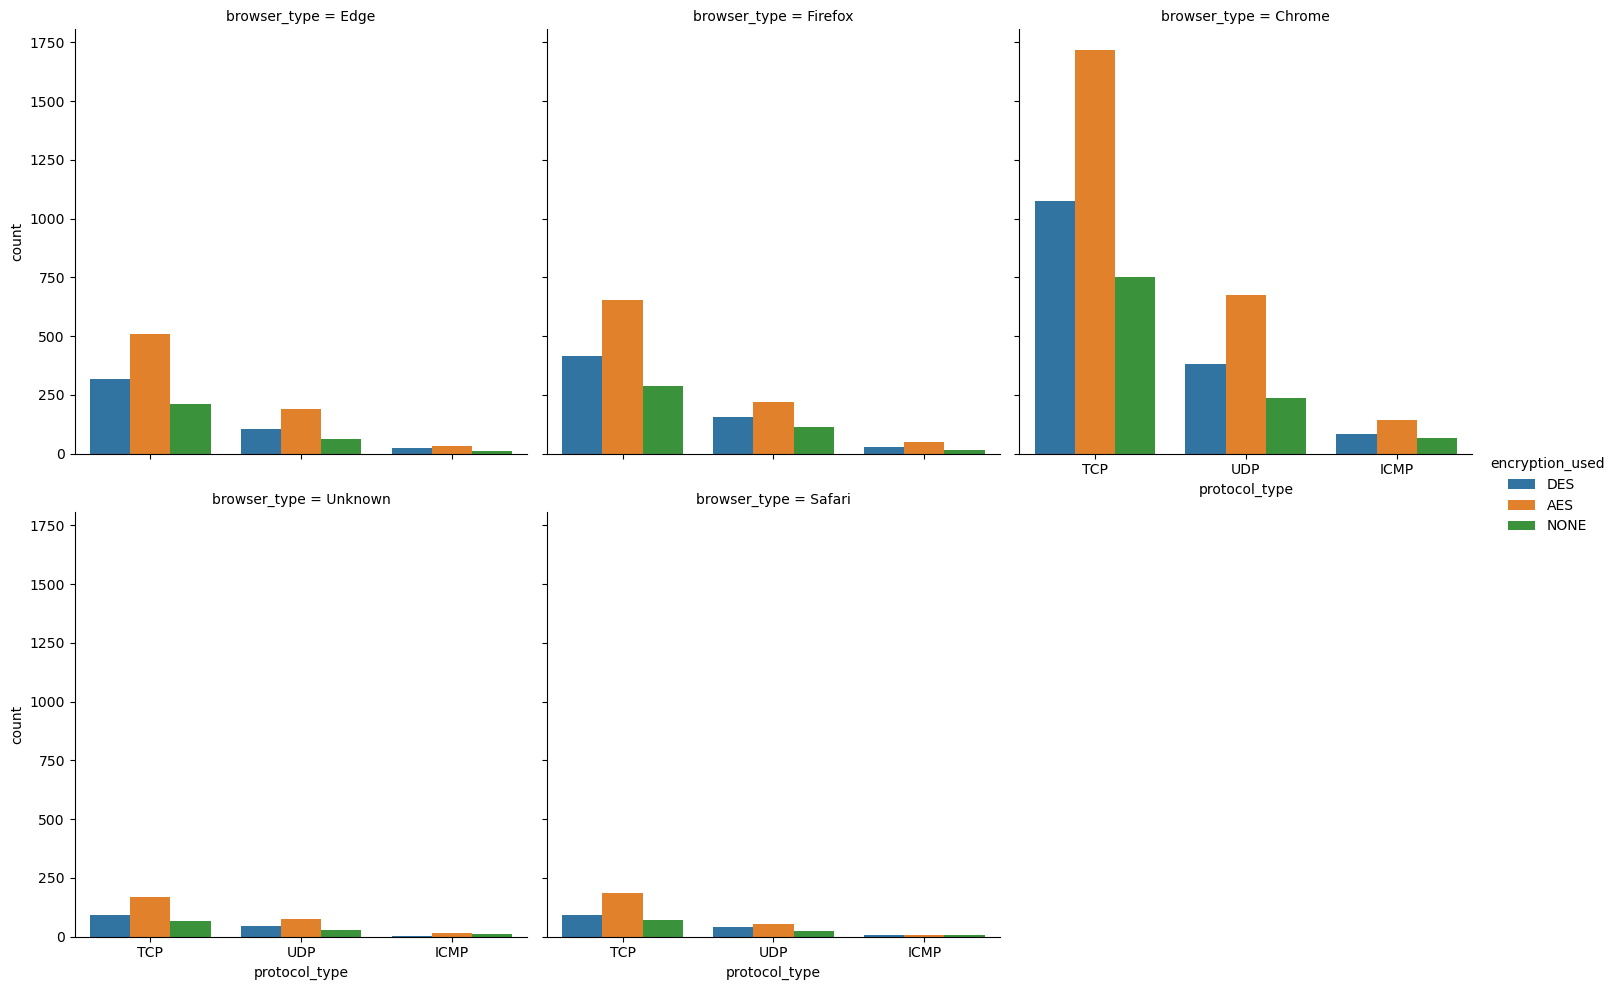

In [28]:
sns.catplot(data=df_clean, 
            x='protocol_type', 
            hue='encryption_used', 
            col='browser_type', 
            col_wrap=3,
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `protocol_type` Categorical Variable, Colored by Each `browser_type` Categorical Variable, with Facets for Each `encryption_used` Categorical Variable

TCP is the dominant protocol in every panel and for every browser, Chrome bars are substantially larger than other browsers (especially for AES), UDP is the second-most common and ICMP is rare, and the protocol mix looks similar across the three encryption categories.

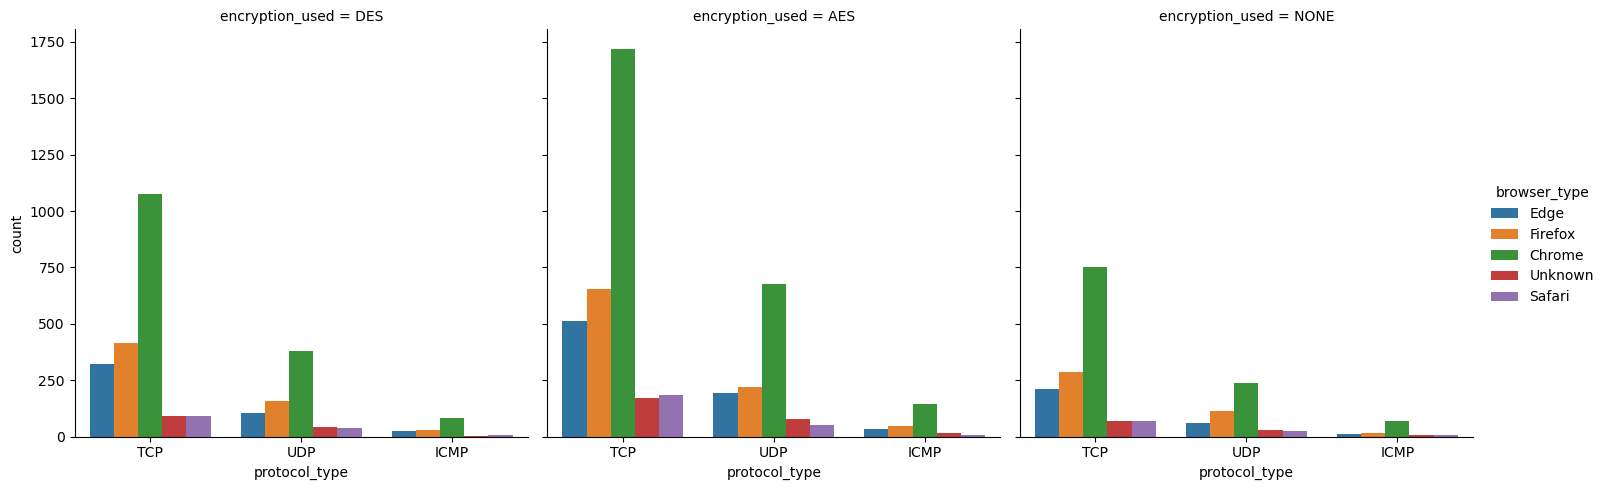

In [29]:
sns.catplot(data=df_clean, 
            x='protocol_type', 
            hue='browser_type', 
            col='encryption_used', 
            kind='count')
plt.show()

### Histogram Plots – Marginal Distributions of Each Numerical Variable, with Facets for Each Numerical Variable

The distributions show that network packet sizes are roughly bell‑shaped with a peak around 400–600 bytes and a moderate right tail, most users make only a few login attempts (typically 2–4) with very few high counts, session lengths are strongly right‑skewed with many short sessions and a long tail of long sessions, IP reputation scores concentrate in the low‑to‑mid range (about 0.2–0.4) with fewer high scores, failed login counts cluster at 1–2, unusual‑time access is almost always zero (very rare), and the attack flag is binary with substantially more normal traffic than attacks and looking across the protocol/encryption/browser plots, TCP dominates by a large margin in every subgroup, UDP is consistently the second most common and ICMP is rare, AES-encrypted traffic is the largest encryption class (then DES, then none), and Chrome contributes most of the volume while Unknown and Safari are much smaller.

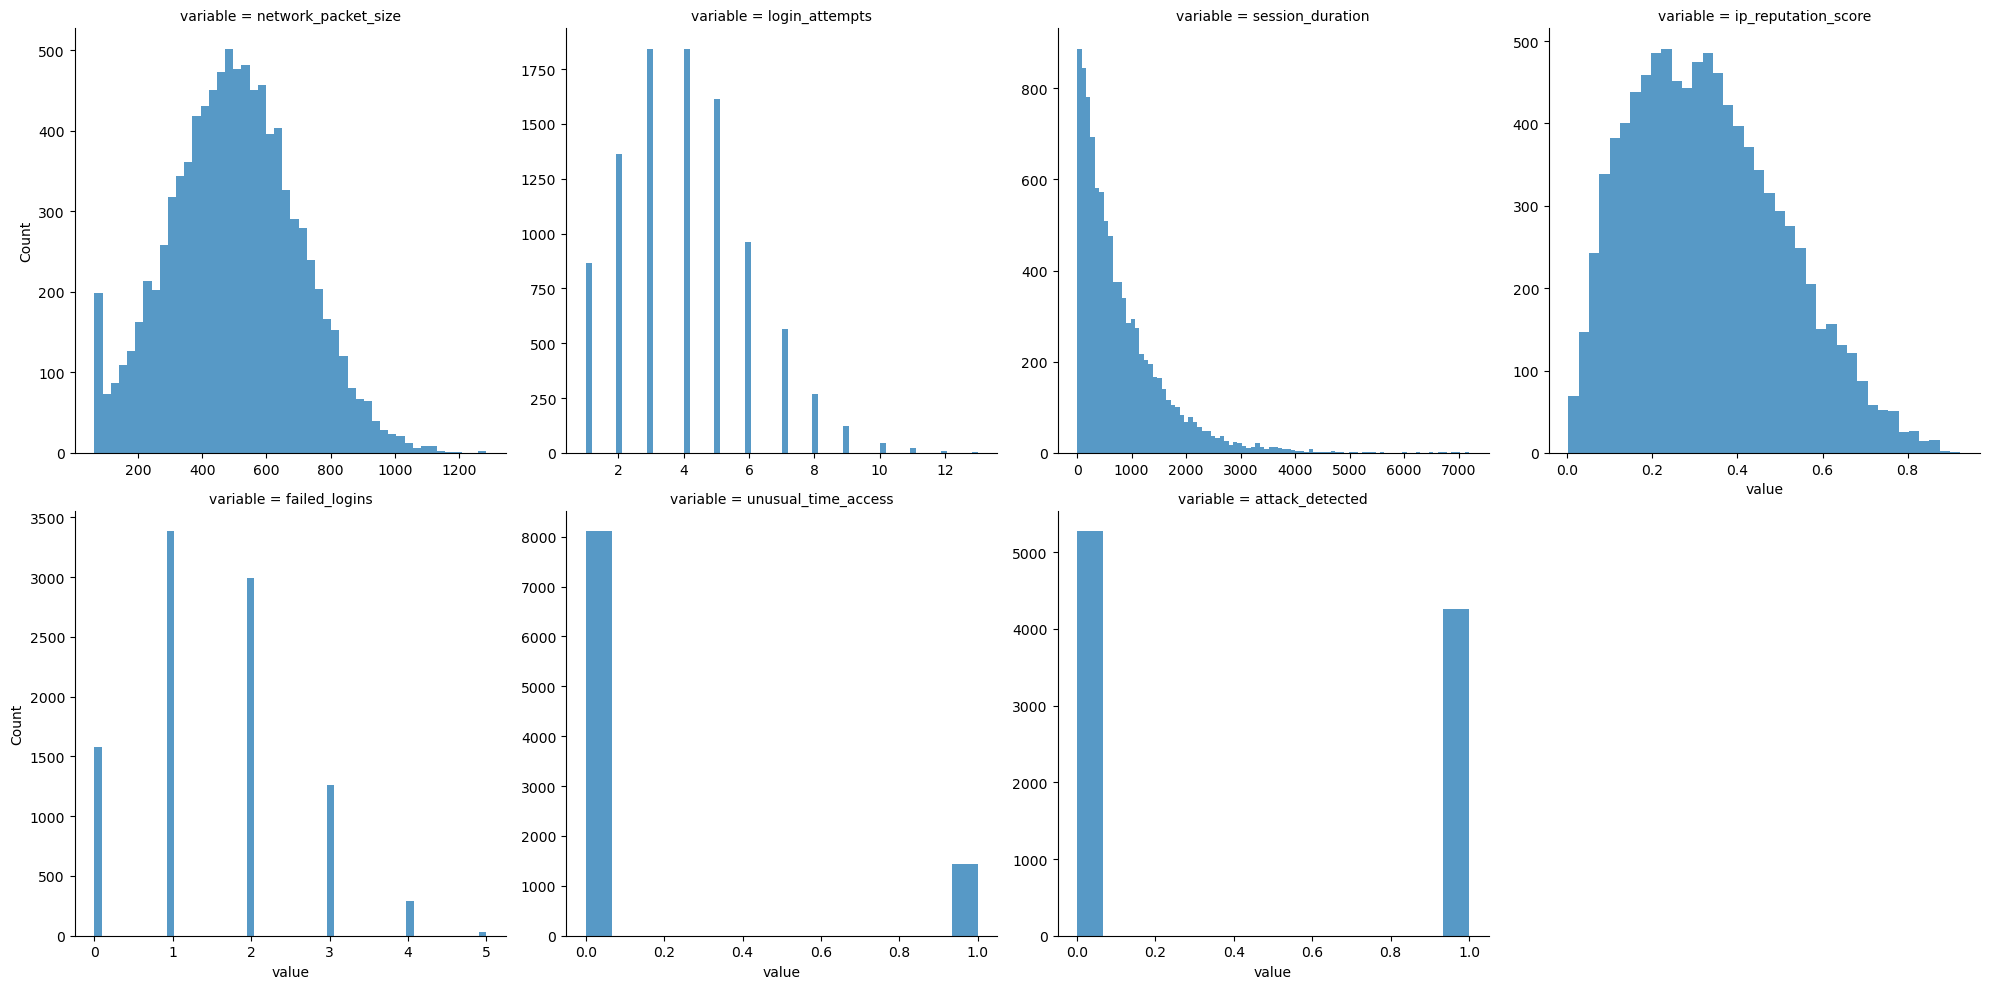

In [30]:
sns.displot(data=df_clean_lf, 
            x='value', 
            col='variable', 
            col_wrap=4,
            kind='hist',
            facet_kws={'sharex': False, 
                       'sharey': False},
            common_bins=False)
plt.show()

### Histogram Plots – Marginal Distributions of the `network_packet_size` Continuous Variable, with Facets for Each `protocol_type` Categorical Variable

TCP overwhelmingly dominates the traffic with a pronounced bell‑shaped peak around roughly 400–600 bytes and a right tail, UDP has far fewer packets with a broader, right‑skewed distribution, and ICMP is rare with low counts spread across sizes and no strong central peak.

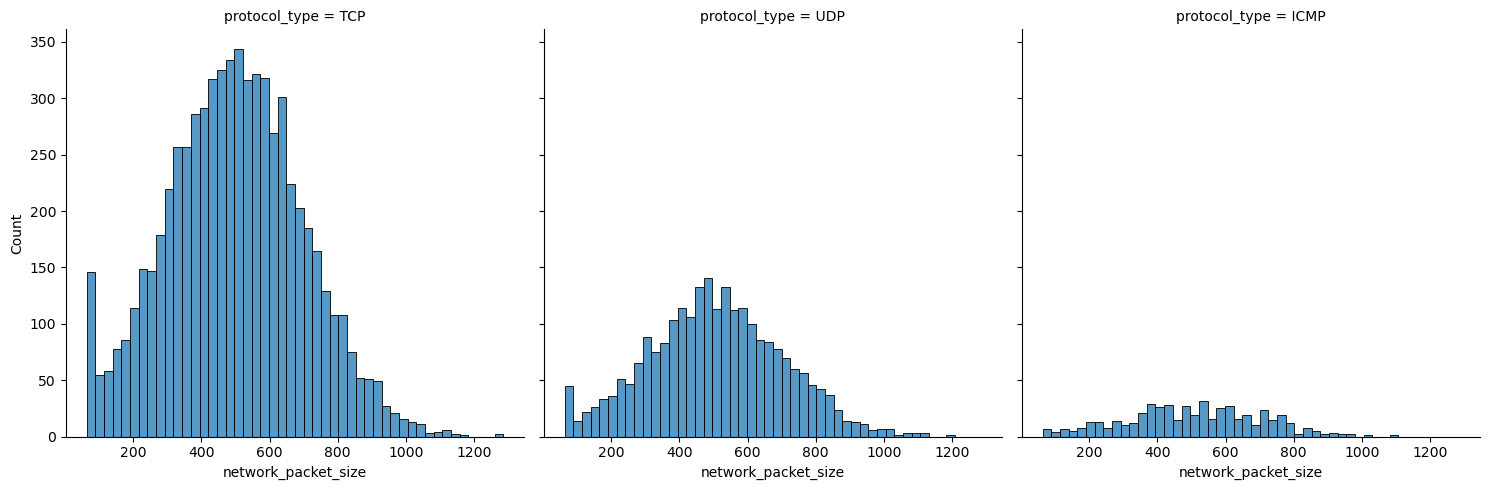

In [31]:
sns.displot(data=df_clean, 
            x='network_packet_size', 
            col='protocol_type', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `network_packet_size` Continuous Variable, with Facets for Each `encryption_used` Categorical Variable

AES traffic is largest with a peak near 400–550 bytes, DES is intermediate with a broader peak, and NONE has the fewest packets with an earlier, smaller peak, while all three distributions are roughly bell‑shaped with a right tail.

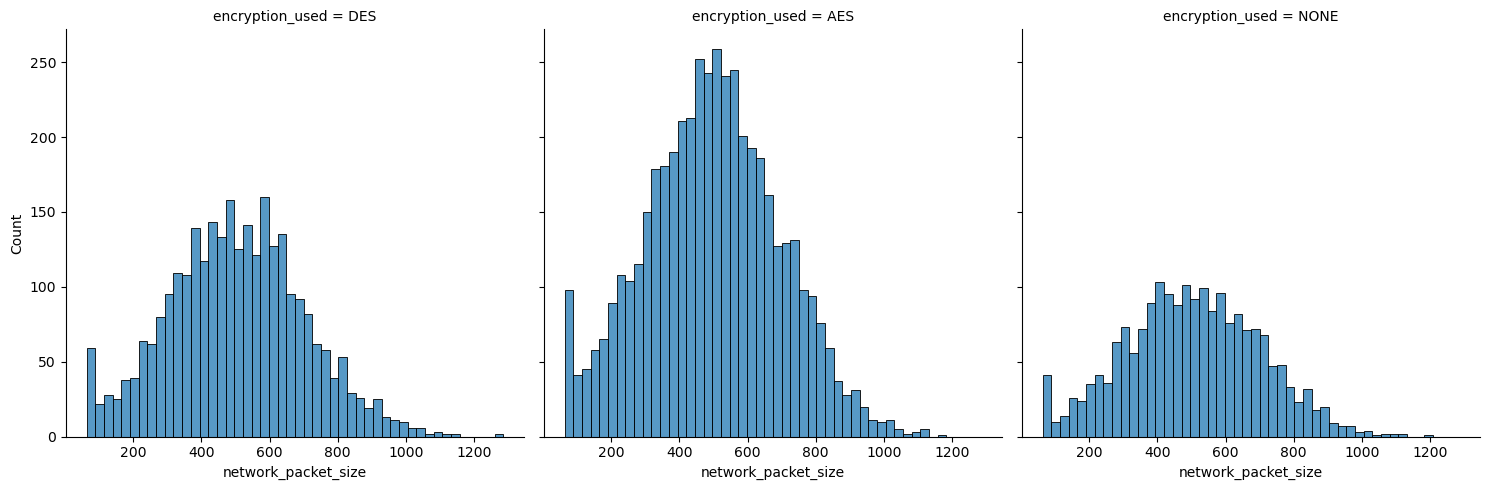

In [32]:
sns.displot(data=df_clean, 
            x='network_packet_size', 
            col='encryption_used', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `network_packet_size` Continuous Variable, with Facets for Each `browser_type` Categorical Variable

Chrome dominates traffic volume and shows the strongest, widest peak in packet sizes, while other browsers follow the same modal range but at much lower counts and with noisier tails.

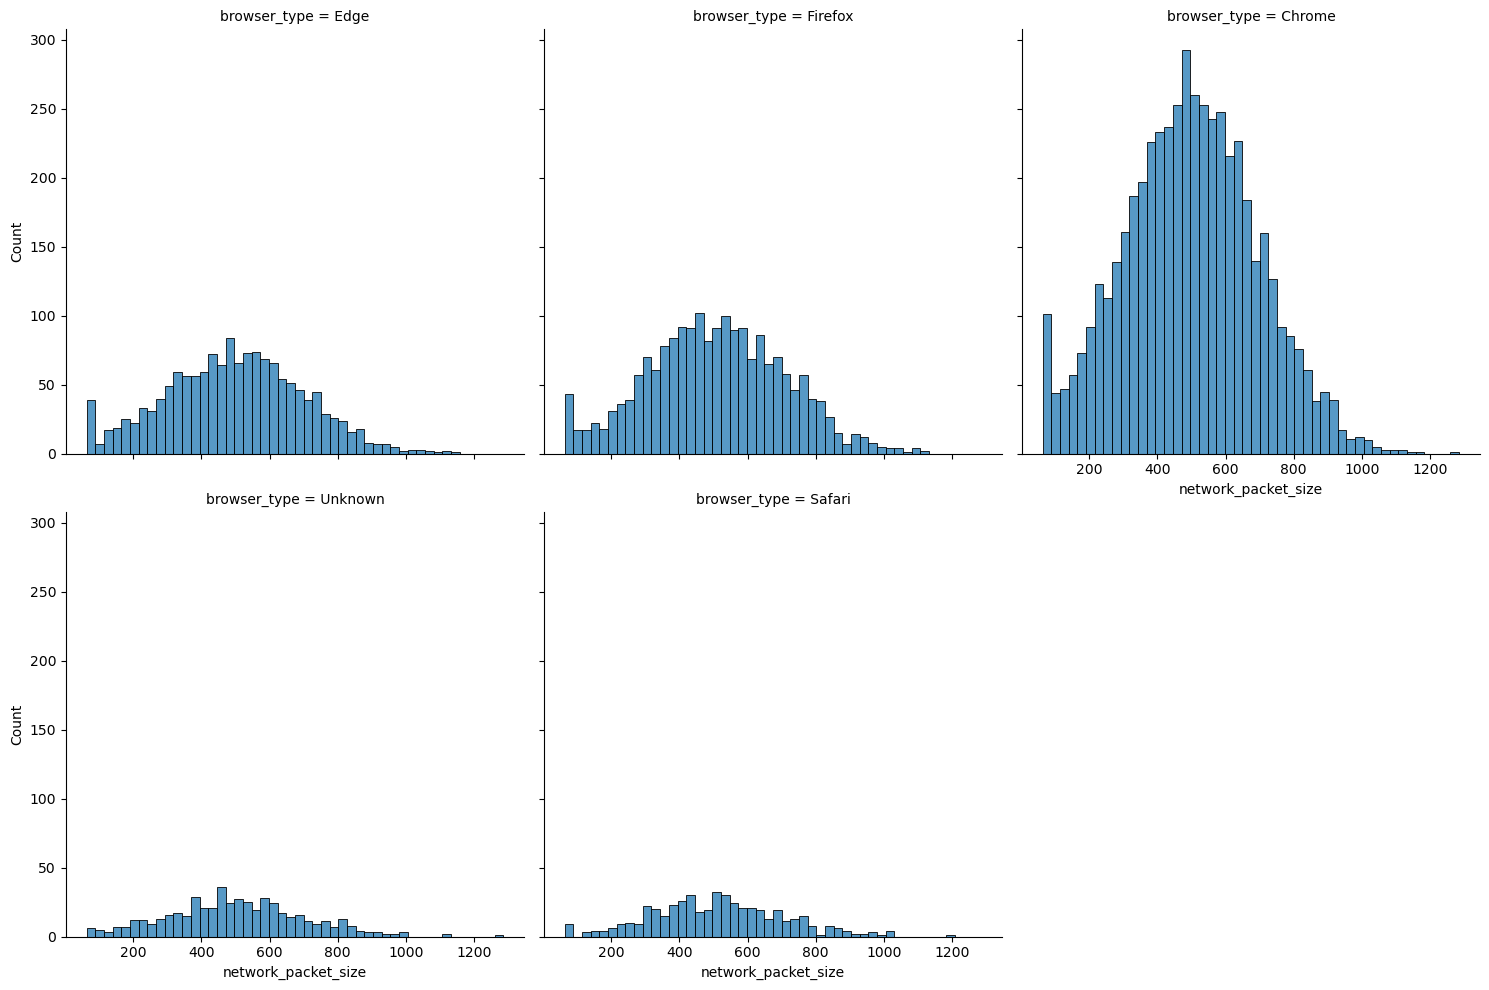

In [33]:
sns.displot(data=df_clean, 
            x='network_packet_size', 
            col='browser_type',
            col_wrap=3, 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `login_attempts` Continuous Variable, with Facets for Each `protocol_type` Categorical Variable

Most login attempts occur over TCP with a peak at 3–5 attempts, UDP shows fewer attempts with a similar peak, and ICMP is rare.

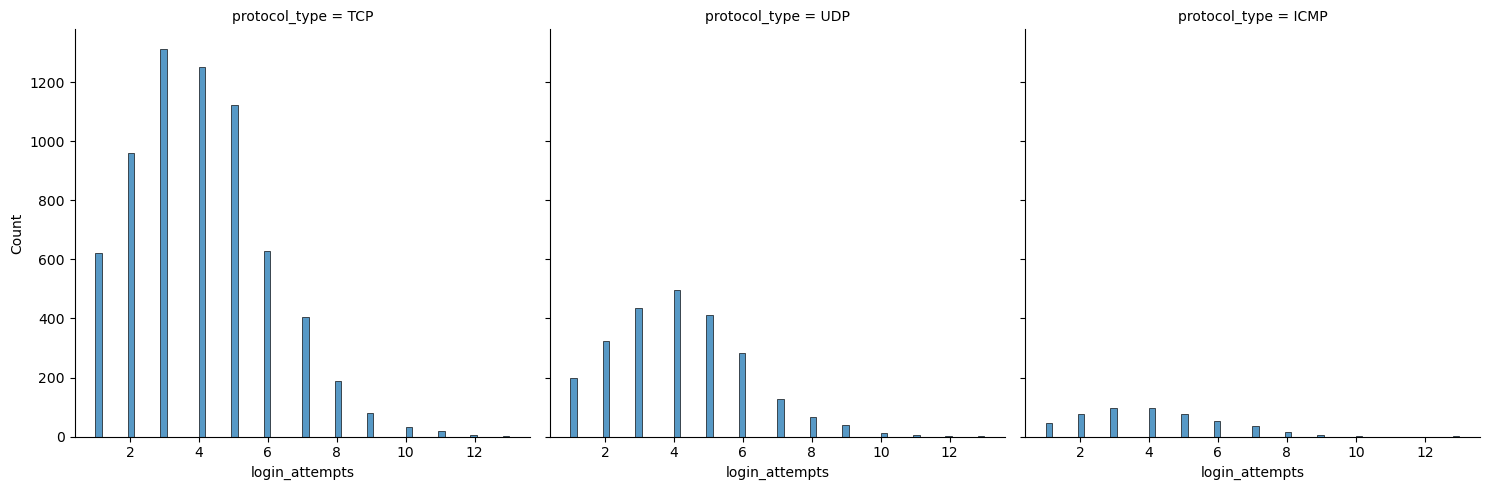

In [34]:
sns.displot(data=df_clean, 
            x='login_attempts', 
            col='protocol_type', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `login_attempts` Continuous Variable, with Facets for Each `encryption_used` Categorical Variable

Most login attempts occur in AES‑encrypted sessions (peaking around 3–4 attempts), DES is moderate with a similar peak, and NONE has the fewest attempts, with all distributions skewed right.

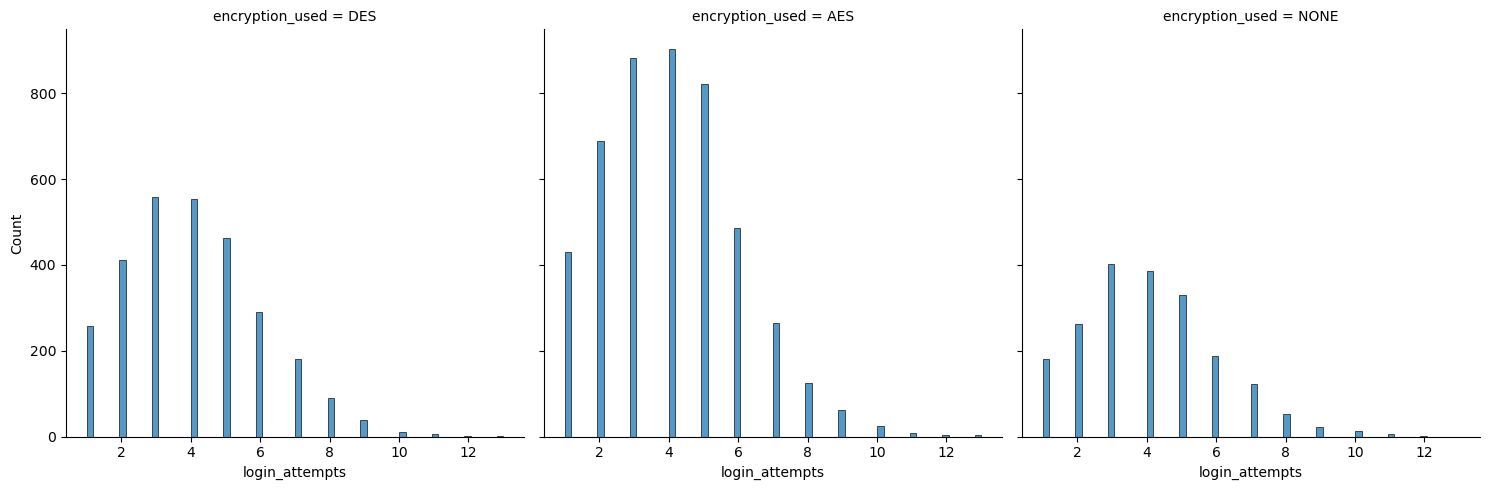

In [35]:
sns.displot(data=df_clean, 
            x='login_attempts', 
            col='encryption_used', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `login_attempts` Continuous Variable, with Facets for Each `browser_type` Categorical Variable

Chrome sessions show by far the most login attempts with a clear peak at 3–4 attempts, Firefox and Edge have moderate peaks around 3–5 attempts, and Unknown and Safari have much lower counts.

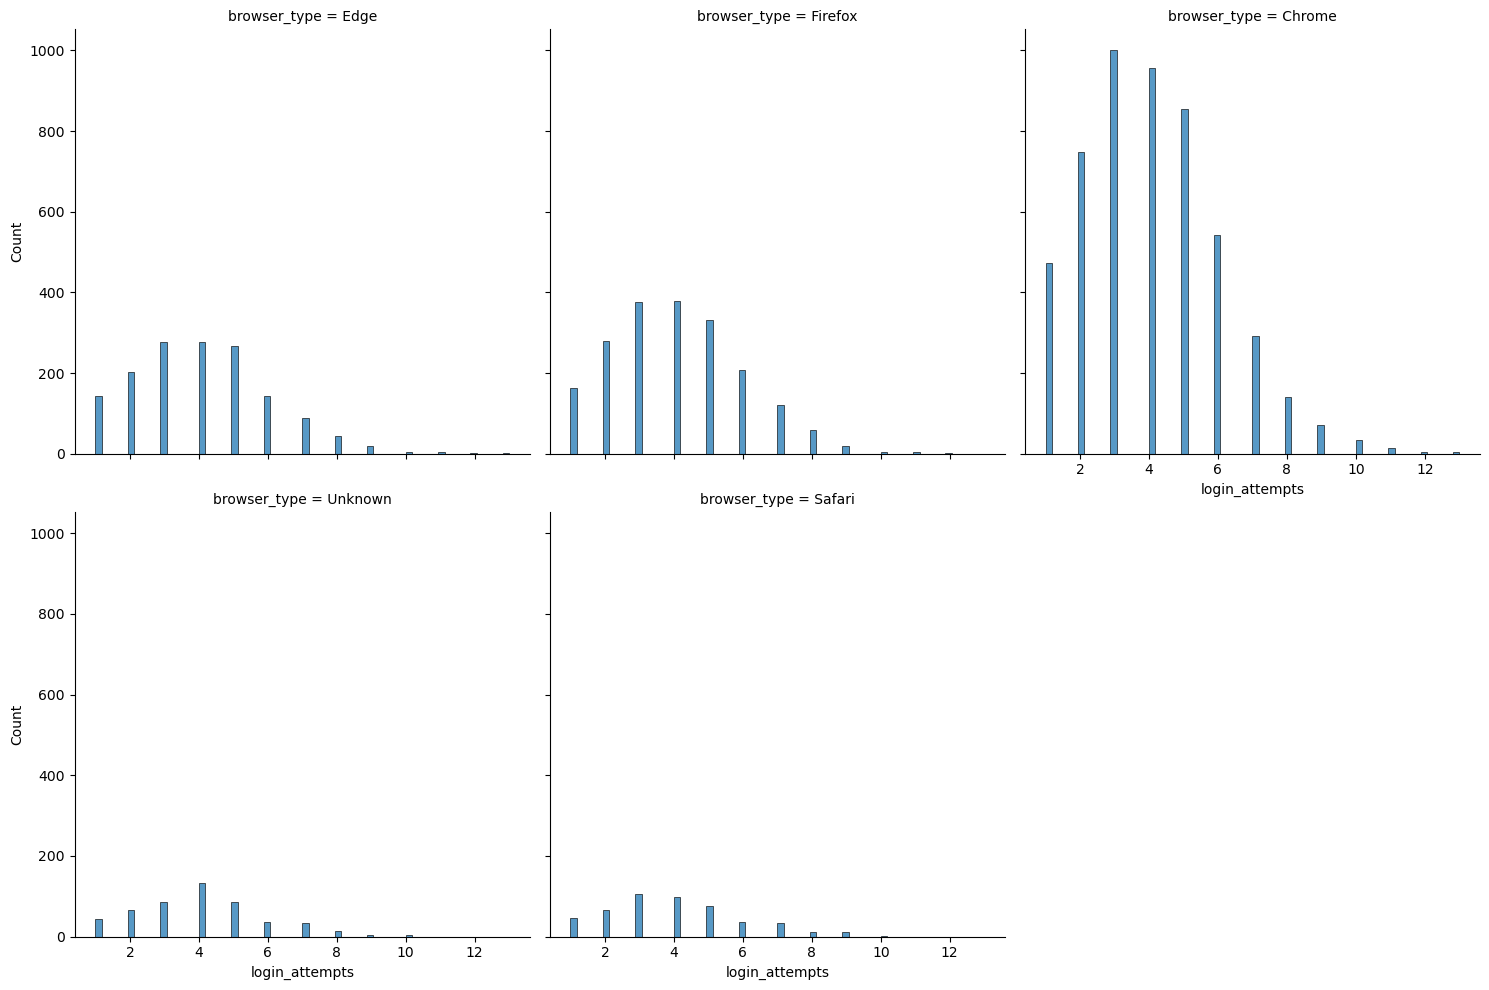

In [36]:
sns.displot(data=df_clean, 
            x='login_attempts', 
            col='browser_type', 
            col_wrap=3,
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `session_duration` Continuous Variable, with Facets for Each `protocol_type` Categorical Variable

TCP has the most sessions concentrated at short durations with a strong right‑skewed tail stretching to ~7000s, UDP has fewer but similarly short, right‑skewed sessions, and ICMP is rare with low counts mostly at very short durations.

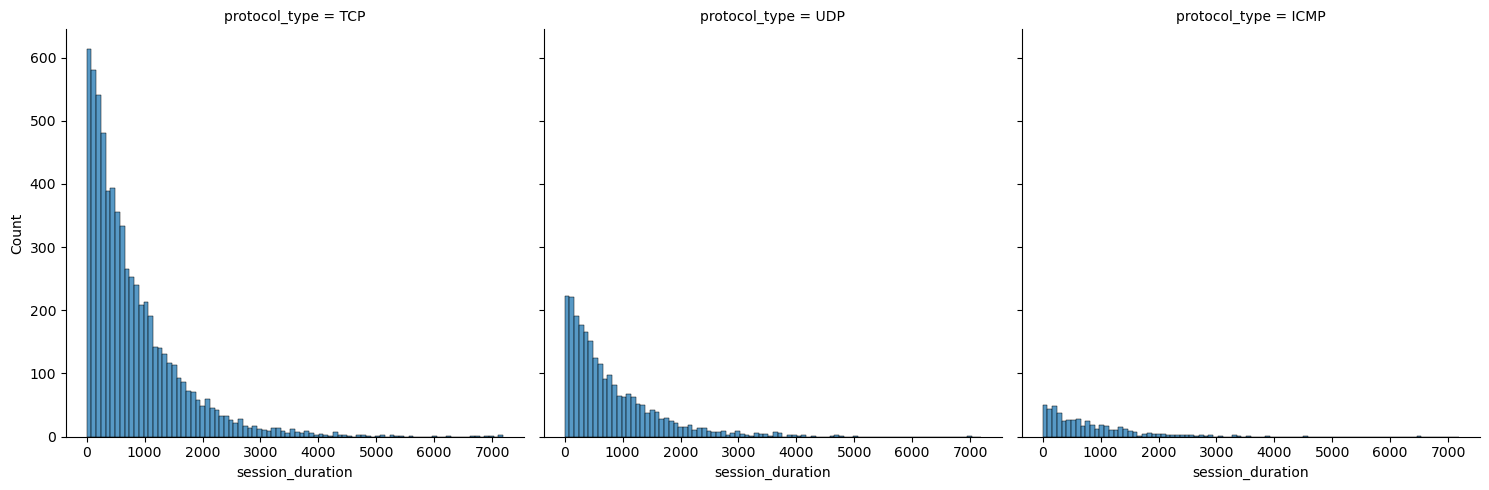

In [37]:
sns.displot(data=df_clean, 
            x='session_duration', 
            col='protocol_type', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `session_duration` Continuous Variable, with Facets for Each `encryption_used` Categorical Variable

AES sessions are the most frequent and concentrated at short durations, DES is intermediate, and NONE has the fewest sessions, with all distributions right‑skewed.

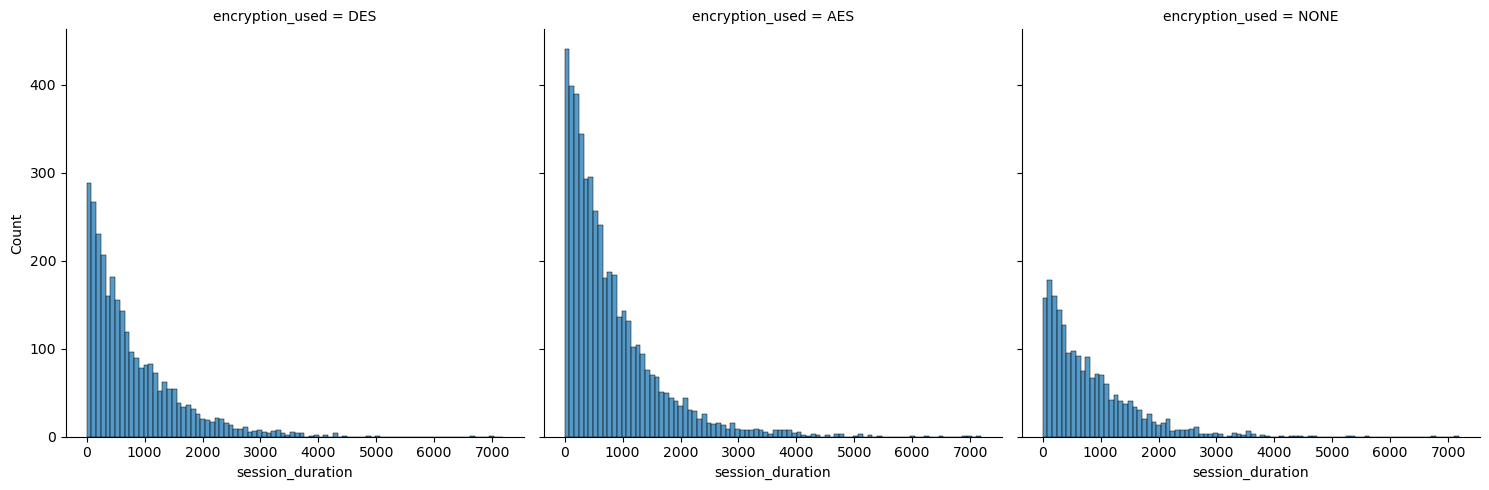

In [38]:
sns.displot(data=df_clean, 
            x='session_duration', 
            col='encryption_used', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `session_duration` Continuous Variable, with Facets for Each `browser_type` Categorical Variable

Chrome has the most short sessions, Edge and Firefox are moderate, and Unknown and Safari have the fewest, with all distributions right‑skewed.

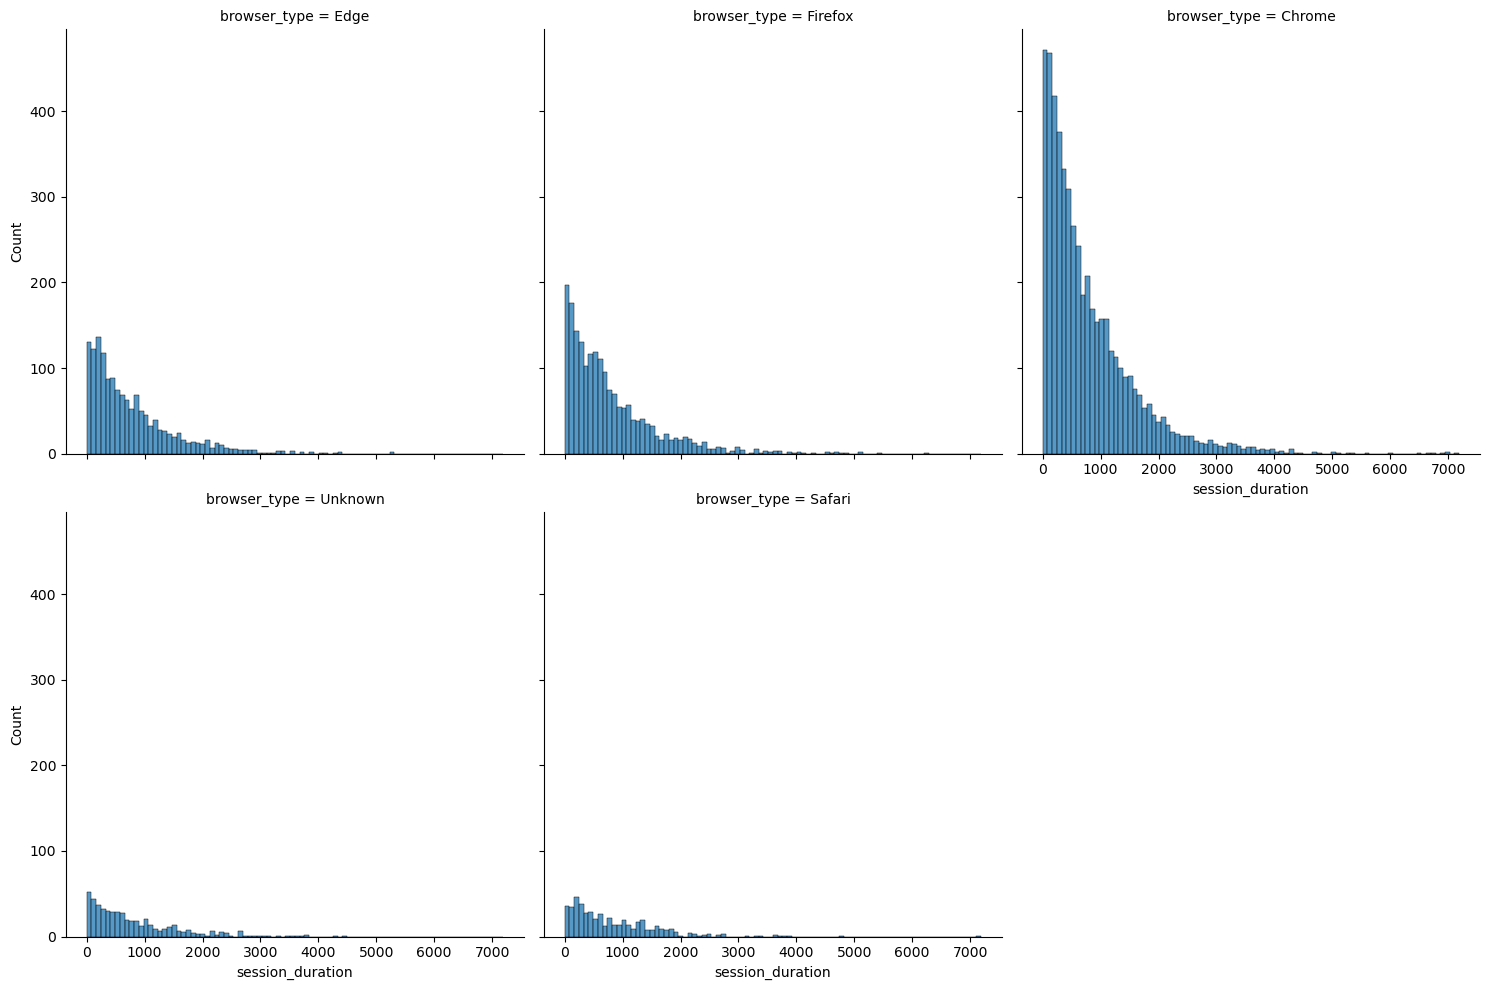

In [39]:
sns.displot(data=df_clean, 
            x='session_duration', 
            col='browser_type', 
            col_wrap=3,
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `ip_reputation_score` Continuous Variable, with Facets for Each `protocol_type` Categorical Variable

TCP shows the most scores peaking around 0.2–0.4, UDP is intermediate with a broader spread, and ICMP is rare with generally lower scores.

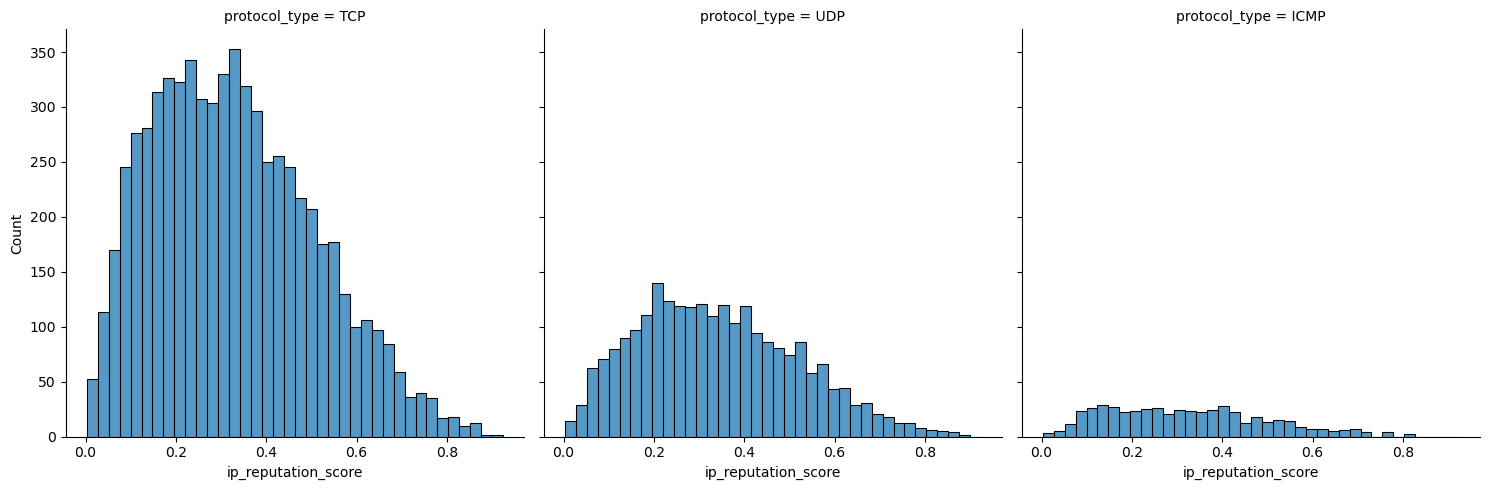

In [40]:
sns.displot(data=df_clean, 
            x='ip_reputation_score', 
            col='protocol_type', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `ip_reputation_score` Continuous Variable, with Facets for Each `encryption_used` Categorical Variable

AES has the most IP reputation scores peaking around 0.2–0.4, DES is moderate, and NONE has the fewest.

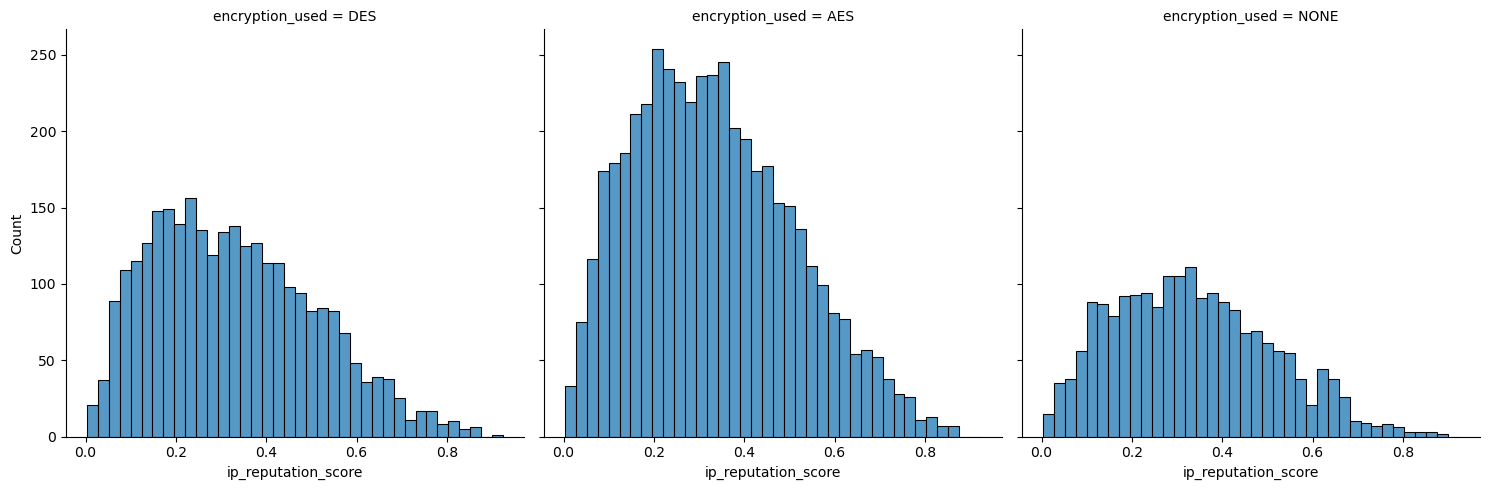

In [41]:
sns.displot(data=df_clean, 
            x='ip_reputation_score', 
            col='encryption_used', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `ip_reputation_score` Continuous Variable, with Facets for Each `browser_type` Categorical Variable

Chrome has the highest and most IP reputation scores (peak ~0.2–0.4), Firefox and Edge are moderate, and Unknown and Safari are lowest.

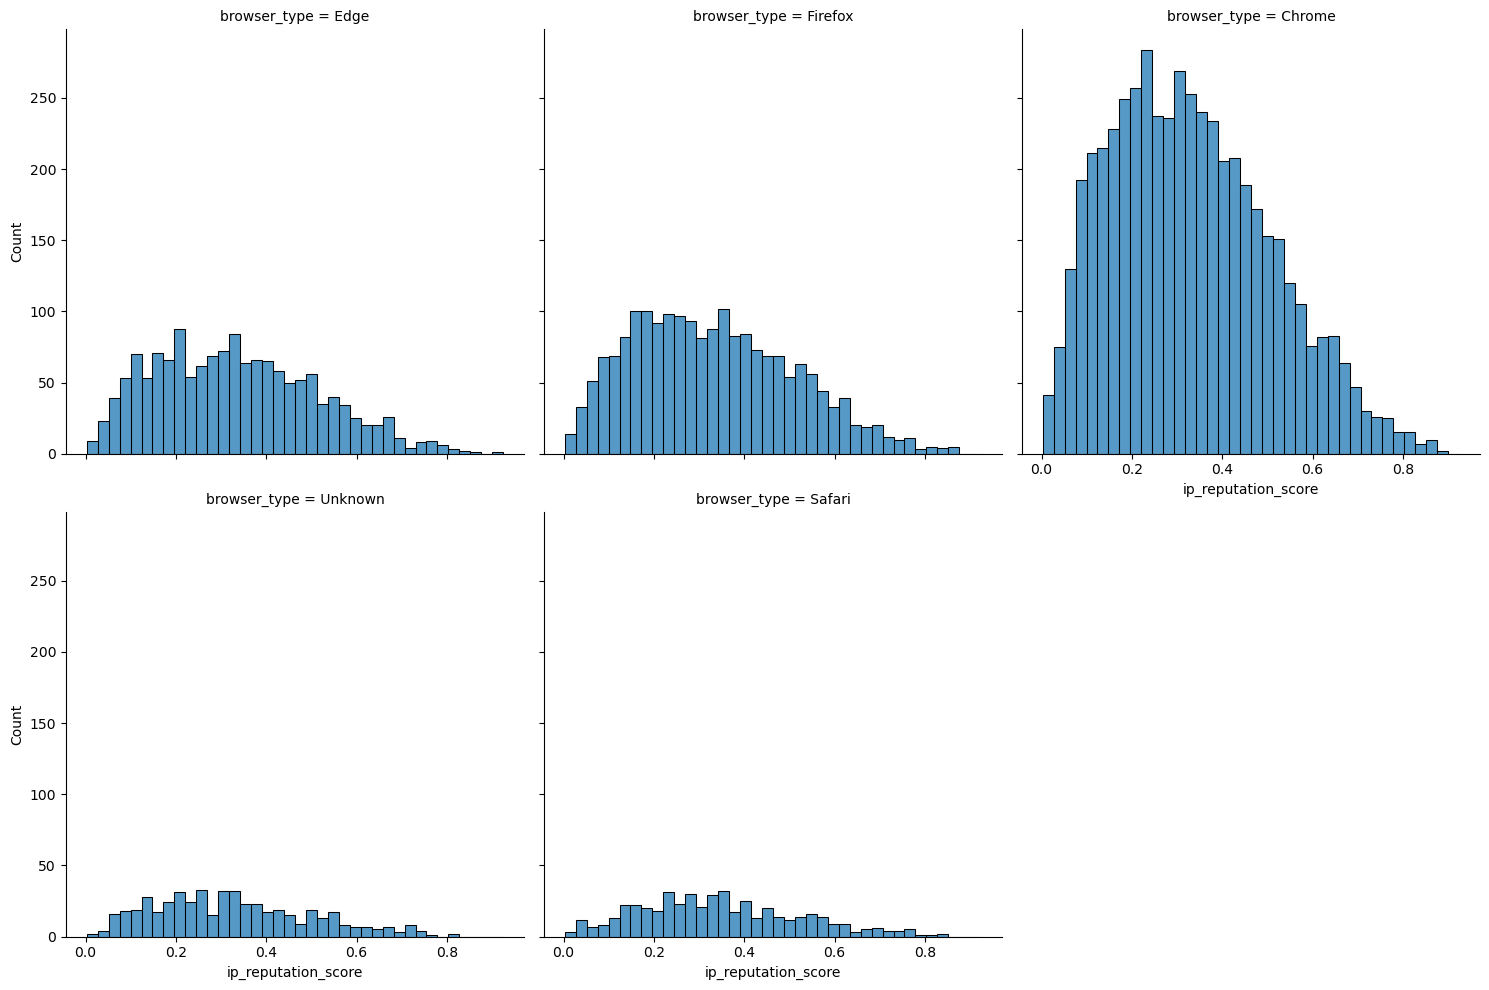

In [42]:
sns.displot(data=df_clean, 
            x='ip_reputation_score', 
            col='browser_type', 
            col_wrap=3,
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `failed_logins` Continuous Variable, with Facets for Each `protocol_type` Categorical Variable

TCP shows the most failed logins (peaking at 1–2), UDP is lower with a similar peak, and ICMP is rare with very few failures.

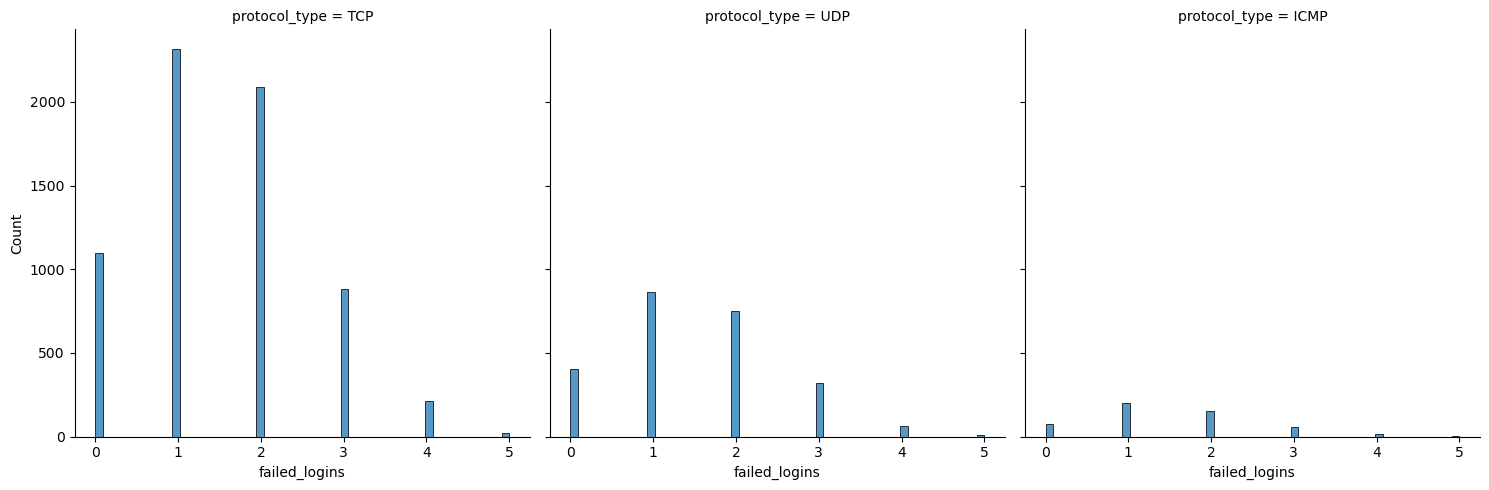

In [43]:
sns.displot(data=df_clean, 
            x='failed_logins', 
            col='protocol_type', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `failed_logins` Continuous Variable, with Facets for Each `encryption_used` Categorical Variable

AES sessions have the most failed logins (peaking at 1–2), DES is moderate, and NONE has the fewest.

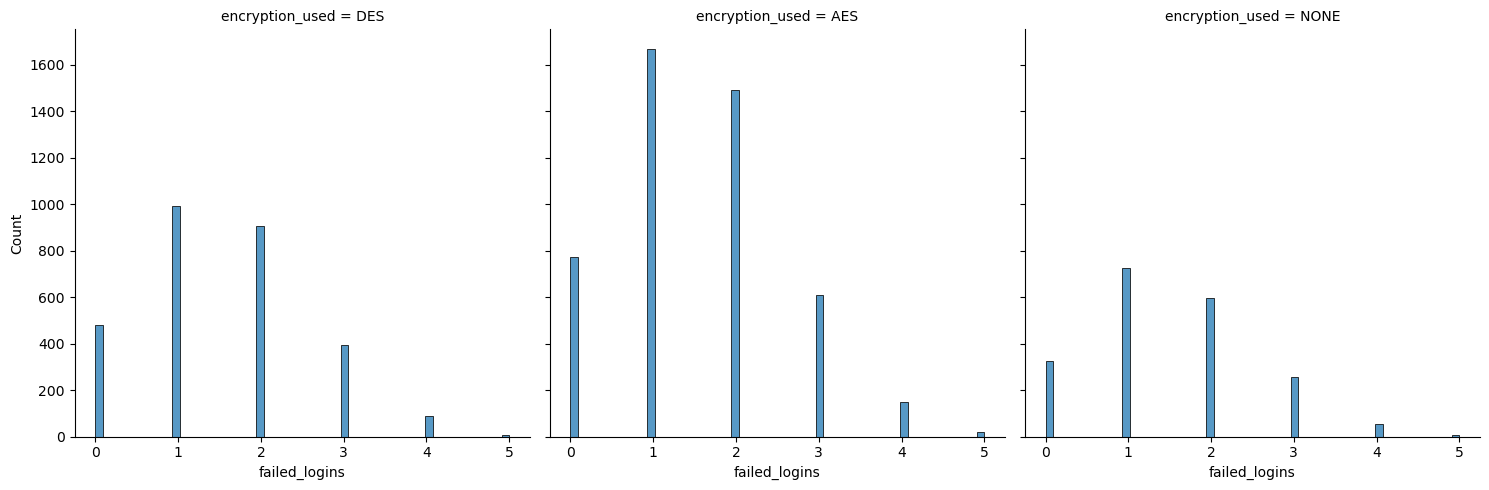

In [44]:
sns.displot(data=df_clean, 
            x='failed_logins', 
            col='encryption_used', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `failed_logins` Continuous Variable, with Facets for Each `browser_type` Categorical Variable

Chrome has the most failed logins (peaks at 1–2), Firefox and Edge are moderate, and Unknown and Safari have the fewest.

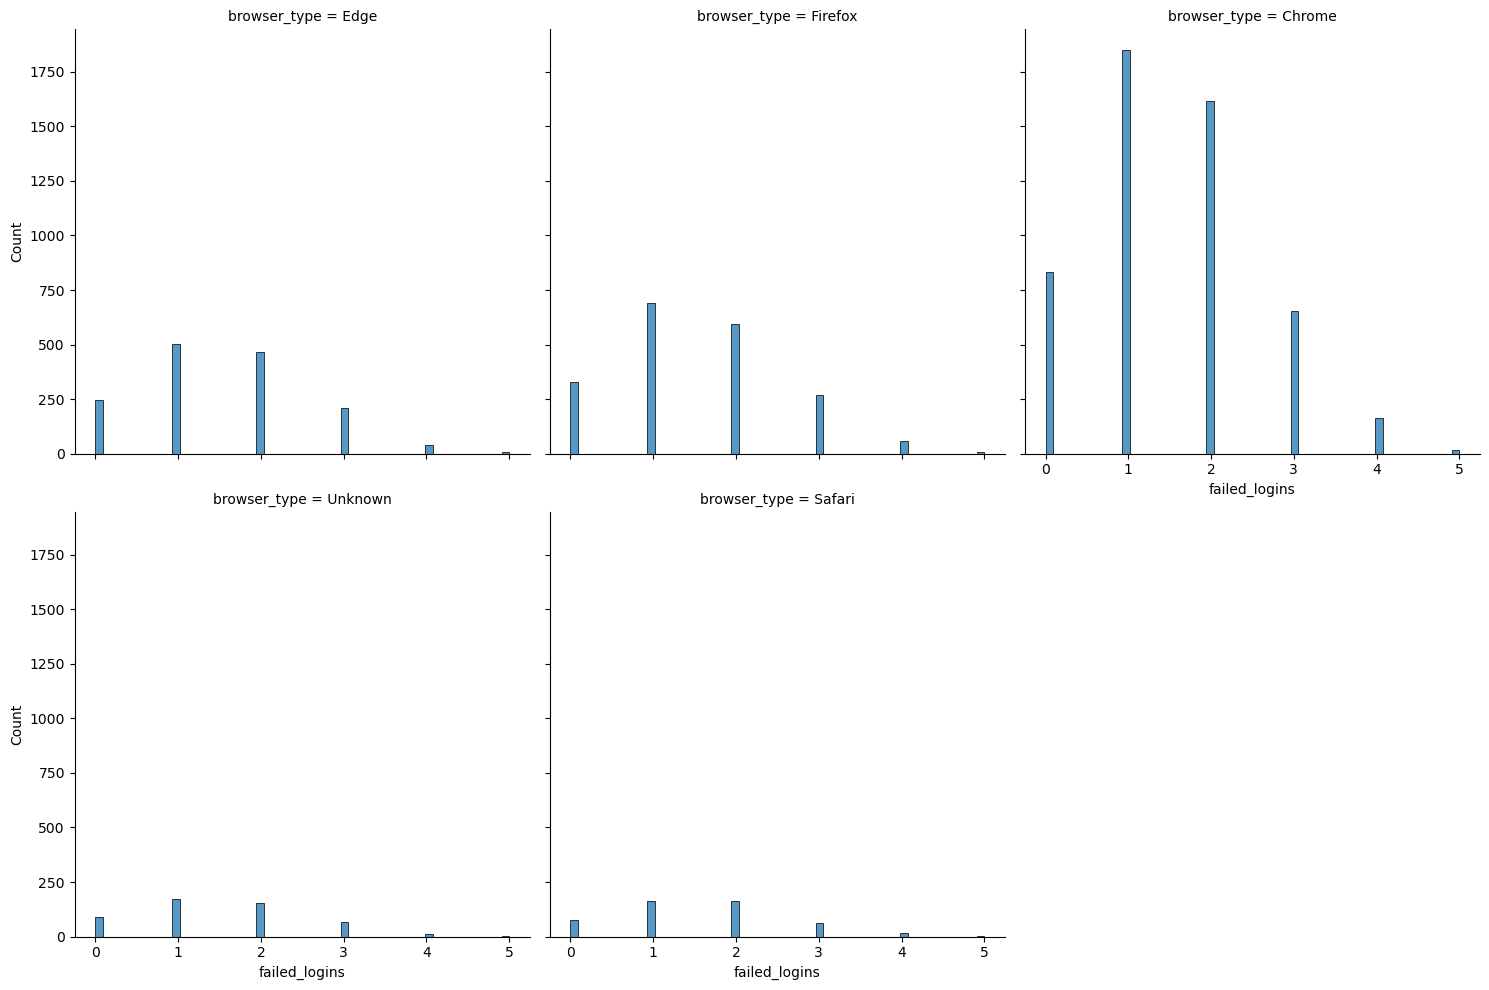

In [45]:
sns.displot(data=df_clean, 
            x='failed_logins', 
            col='browser_type', 
            col_wrap=3,
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `unusual_time_access` Continuous Variable, with Facets for Each `protocol_type` Categorical Variable

Most sessions occur at usual times (0) across all protocols; TCP has the most unusual-time accesses (1), followed by UDP and ICMP.

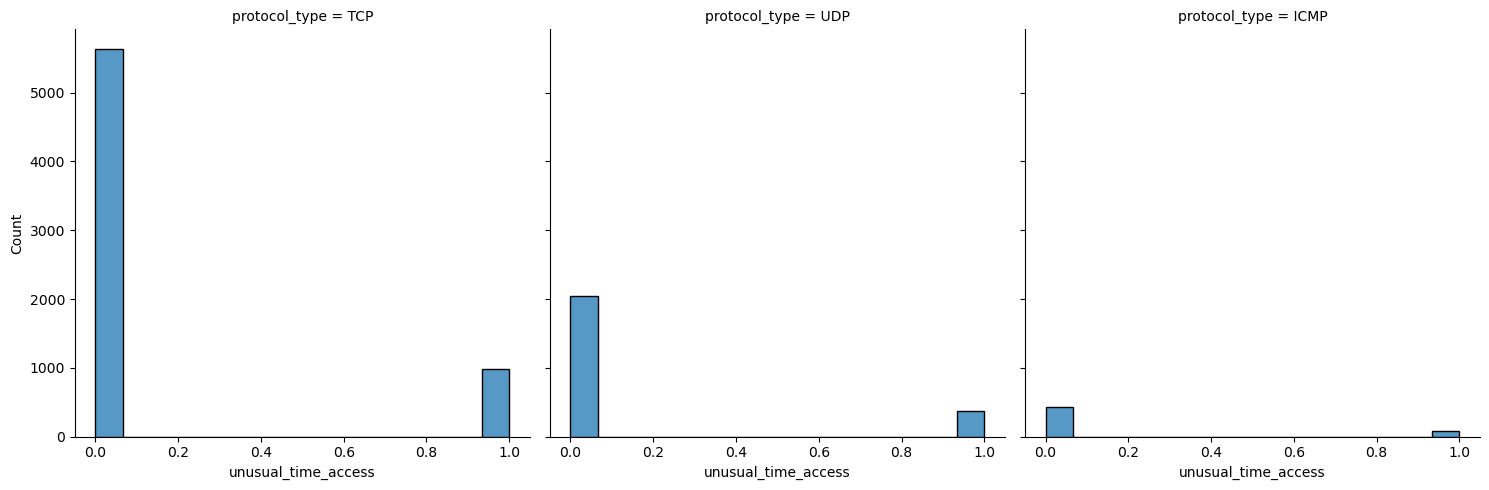

In [46]:
sns.displot(data=df_clean, 
            x='unusual_time_access', 
            col='protocol_type', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `unusual_time_access` Continuous Variable, with Facets for Each `encryption_used` Categorical Variable

Most sessions occur at usual times, with AES having the most sessions and the most unusual-time accesses, followed by DES and NONE.

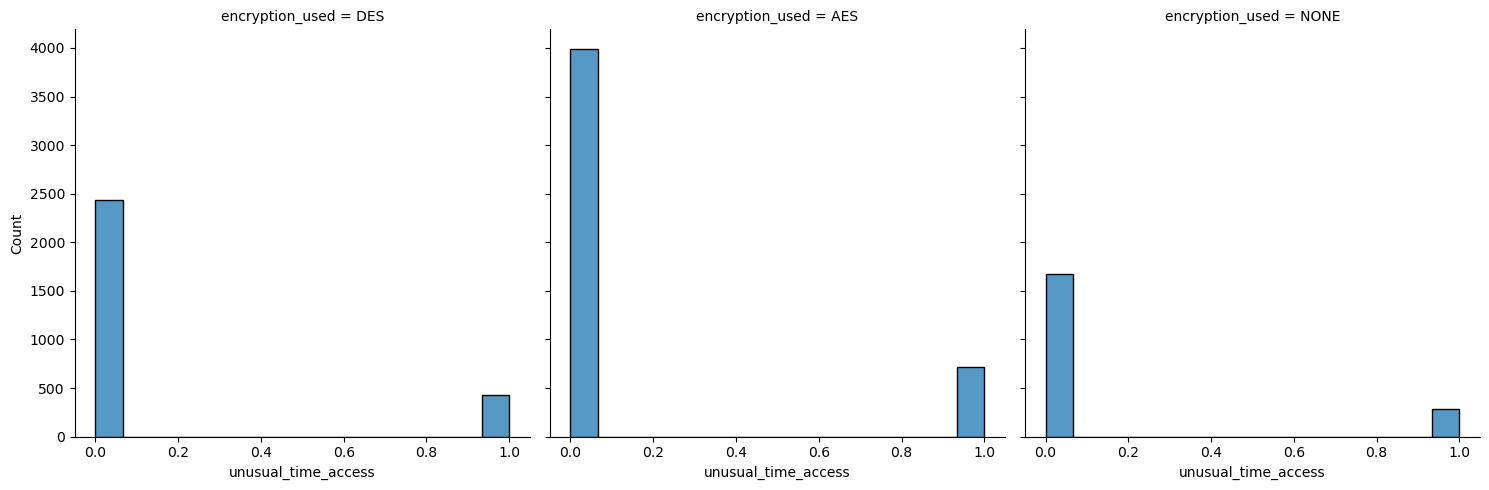

In [47]:
sns.displot(data=df_clean, 
            x='unusual_time_access', 
            col='encryption_used', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `unusual_time_access` Continuous Variable, with Facets for Each `browser_type` Categorical Variable

Most sessions occur at usual times for all browsers; Chrome has the most unusual-time accesses, followed by Firefox and Edge, while Unknown and Safari have the fewest.

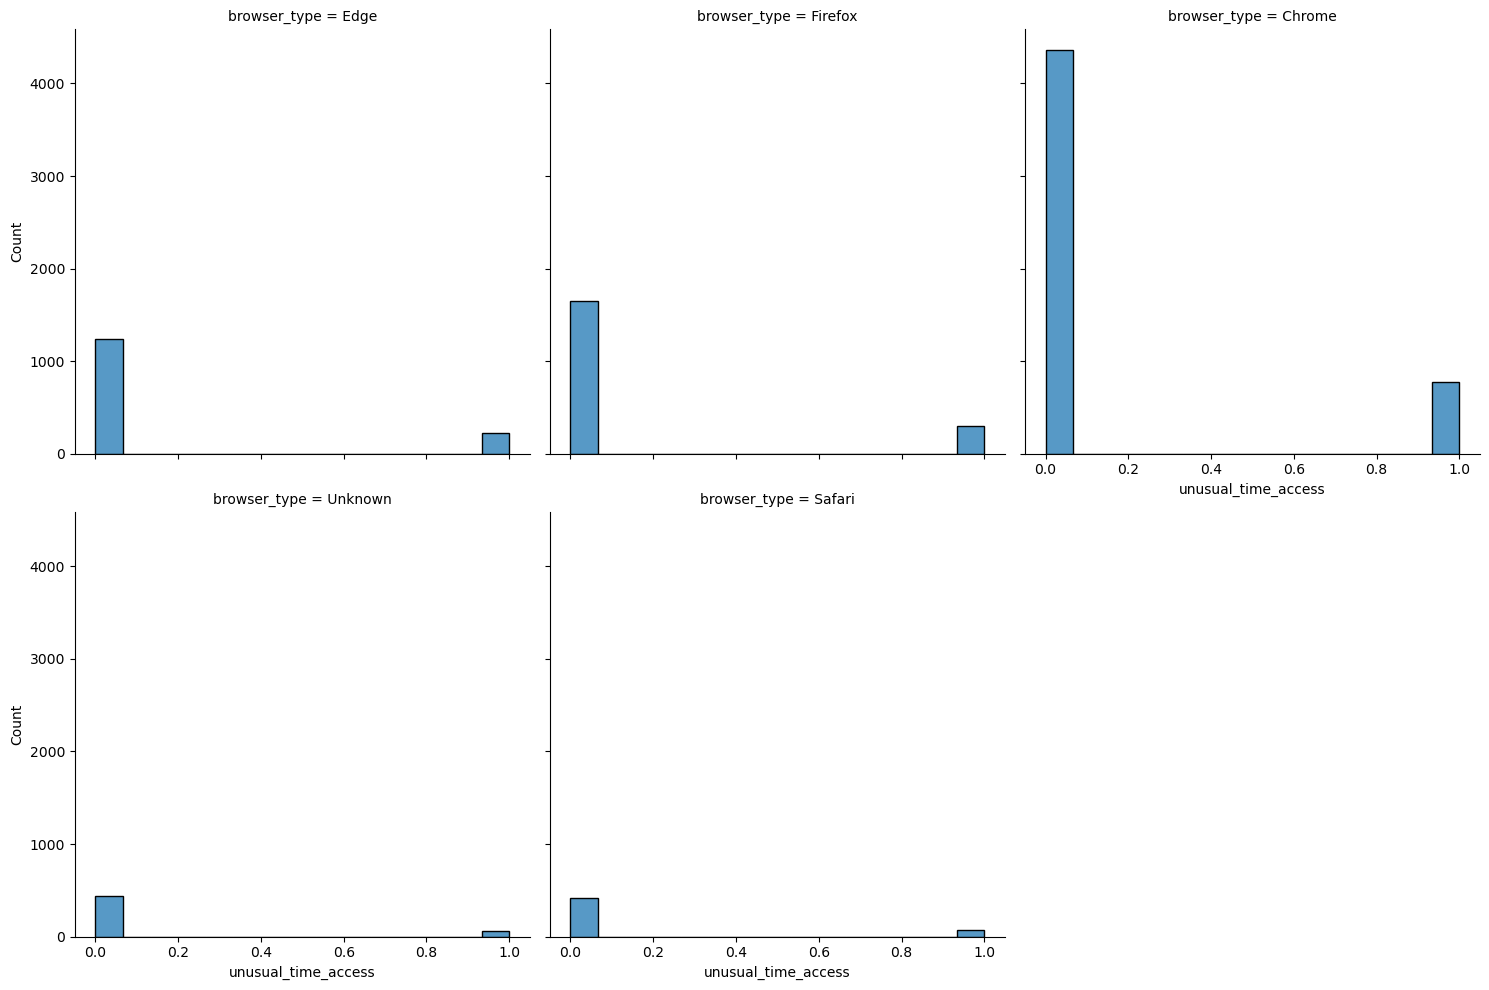

In [48]:
sns.displot(data=df_clean, 
            x='unusual_time_access', 
            col='browser_type', 
            col_wrap=3,
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `attack_detected` Continuous Variable, with Facets for Each `protocol_type` Categorical Variable

TCP has the most sessions and the most detected attacks, UDP is in the middle, and ICMP has the fewest as the attack rate looks roughly similar across protocols, so TCP contributes the largest number of attacks simply because it has the highest volume.

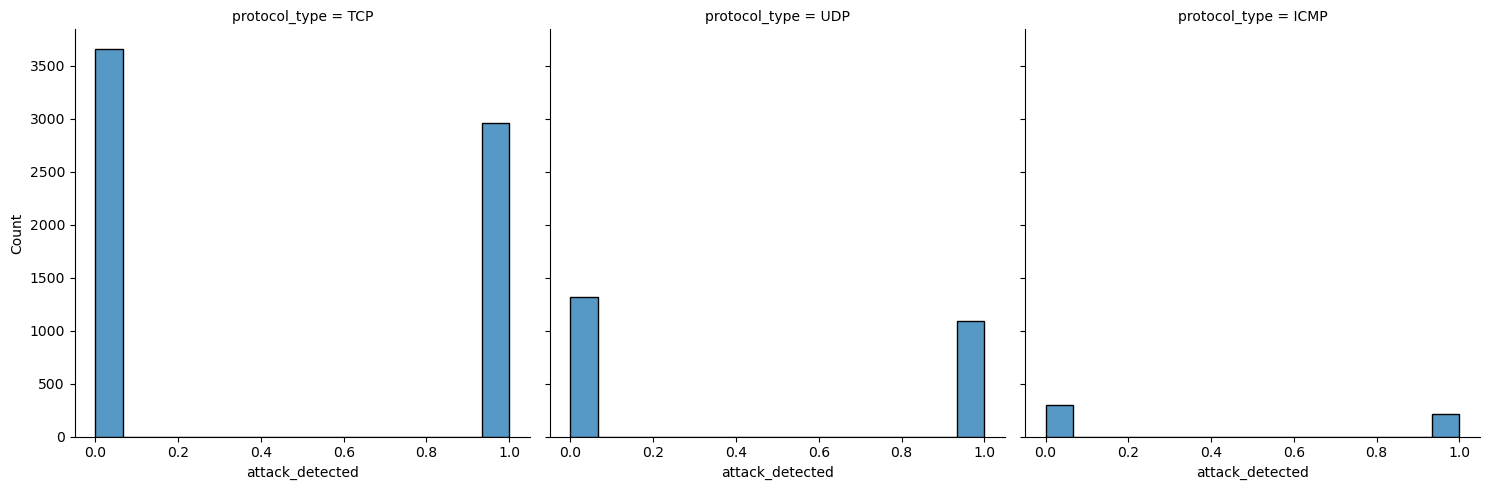

In [49]:
sns.displot(data=df_clean, 
            x='attack_detected', 
            col='protocol_type', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `attack_detected` Continuous Variable, with Facets for Each `encryption_used` Categorical Variable

AES has the most sessions and the most detected attacks, DES is in the middle, and NONE has the fewest as attack rates look roughly similar across encryptions, so AES contributes the largest number of attacks mainly because it has higher volume.

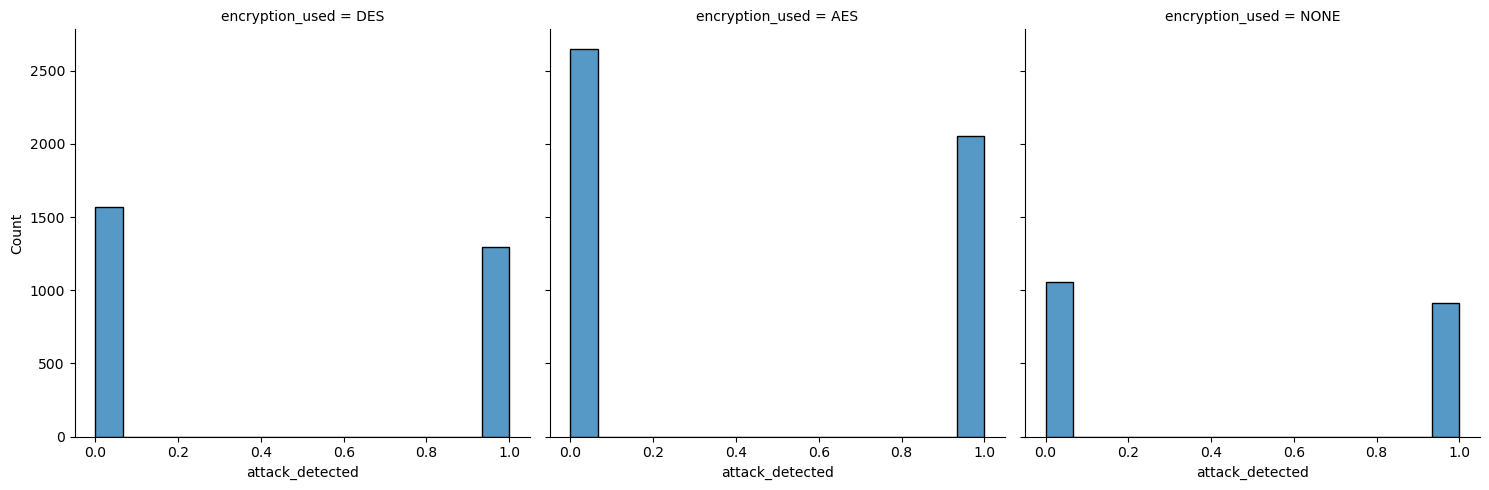

In [50]:
sns.displot(data=df_clean, 
            x='attack_detected', 
            col='encryption_used', 
            kind='hist')
plt.show()

### Histogram Plots – Marginal Distributions of the `attack_detected` Continuous Variable, with Facets for Each `browser_type` Categorical Variable

Chrome has by far the most sessions and the most detected attacks, Firefox and Edge are moderate (both show substantial attacks), and Unknown and Safari have the fewest sessions and attacks where Unknown has less attacks and Safari just slightly more attacks; attack rates look roughly similar across browsers, so Chrome contributes the largest number of attacks mainly because of its higher volume.

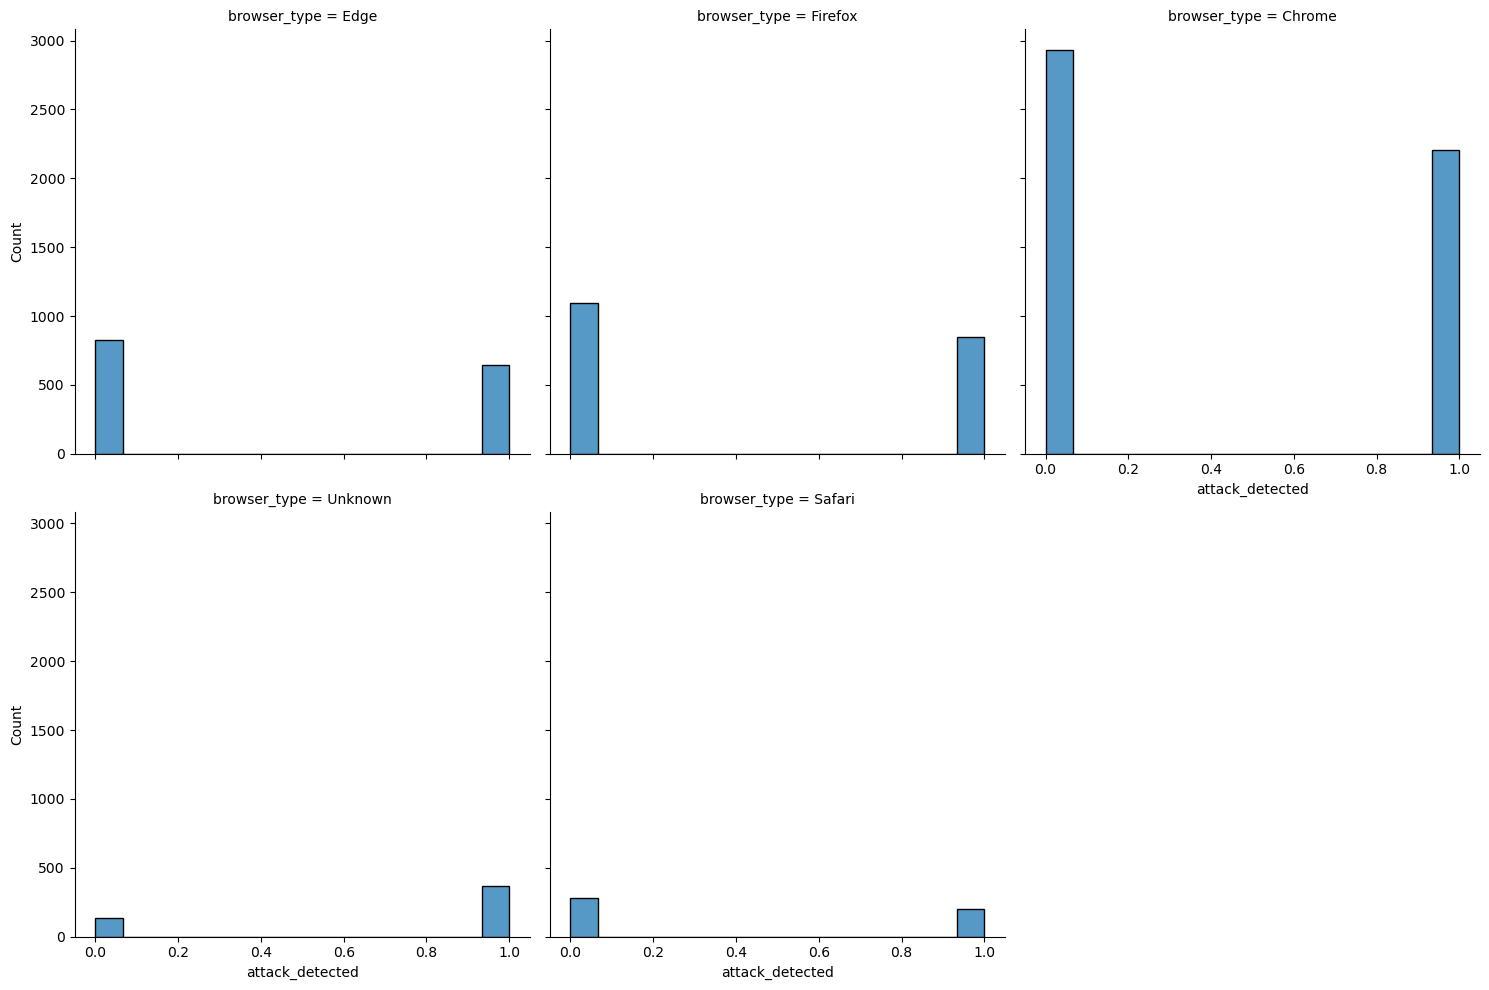

In [51]:
sns.displot(data=df_clean, 
            x='attack_detected', 
            col='browser_type',
            col_wrap=3, 
            kind='hist')
plt.show()

### KDE Plot – Marginal Distribution Density of the `attack_detected` Continuous Variable, Colored by Each `browser_type` Categorical Variable

The distribution is clearly bimodal at 0 and 1 (non‑attacks vs attacks); Chrome has the tallest peak at 0 (most non‑attacks), Unknown has the tallest peak at 1 (highest attack density), Firefox and Edge are similar and intermediate, and Safari shows the lowest densities overall.

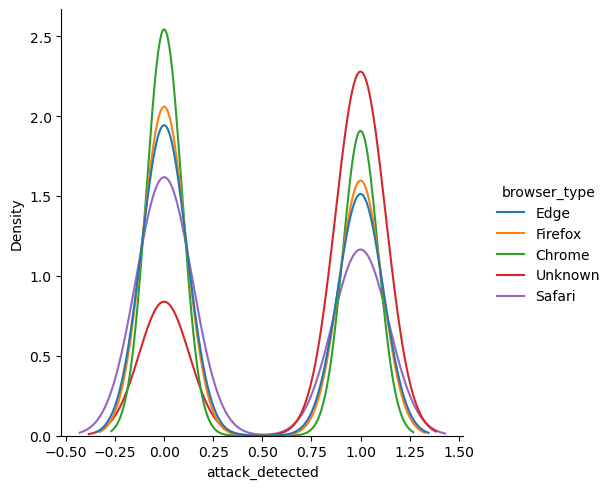

In [52]:
sns.displot(data=df_clean, 
            x='attack_detected', 
            hue='browser_type',
            common_norm=False, 
            kind='kde')
plt.show()

### Box Plots – Distribution of Each Numerical Variable by `browser_type`, Faceted by the Respective Numerical Variable

All browser groups look broadly similar for packet size (medians ~400–600) and login attempts (medians ~3–4), failed logins are low (mostly 0–2), unusual time access is almost always 0, and attack detected is bimodal (both 0 and 1 present for every browser); notable differences are in the tails as session duration is highly skewed with many large outliers (Chrome and Unknown show the heaviest upper tails), Chrome and Firefox have the most high IP reputation outliers while Unknown’s median reputation is slightly lower, and overall the main signal is similar central tendencies across browsers but different extremes.

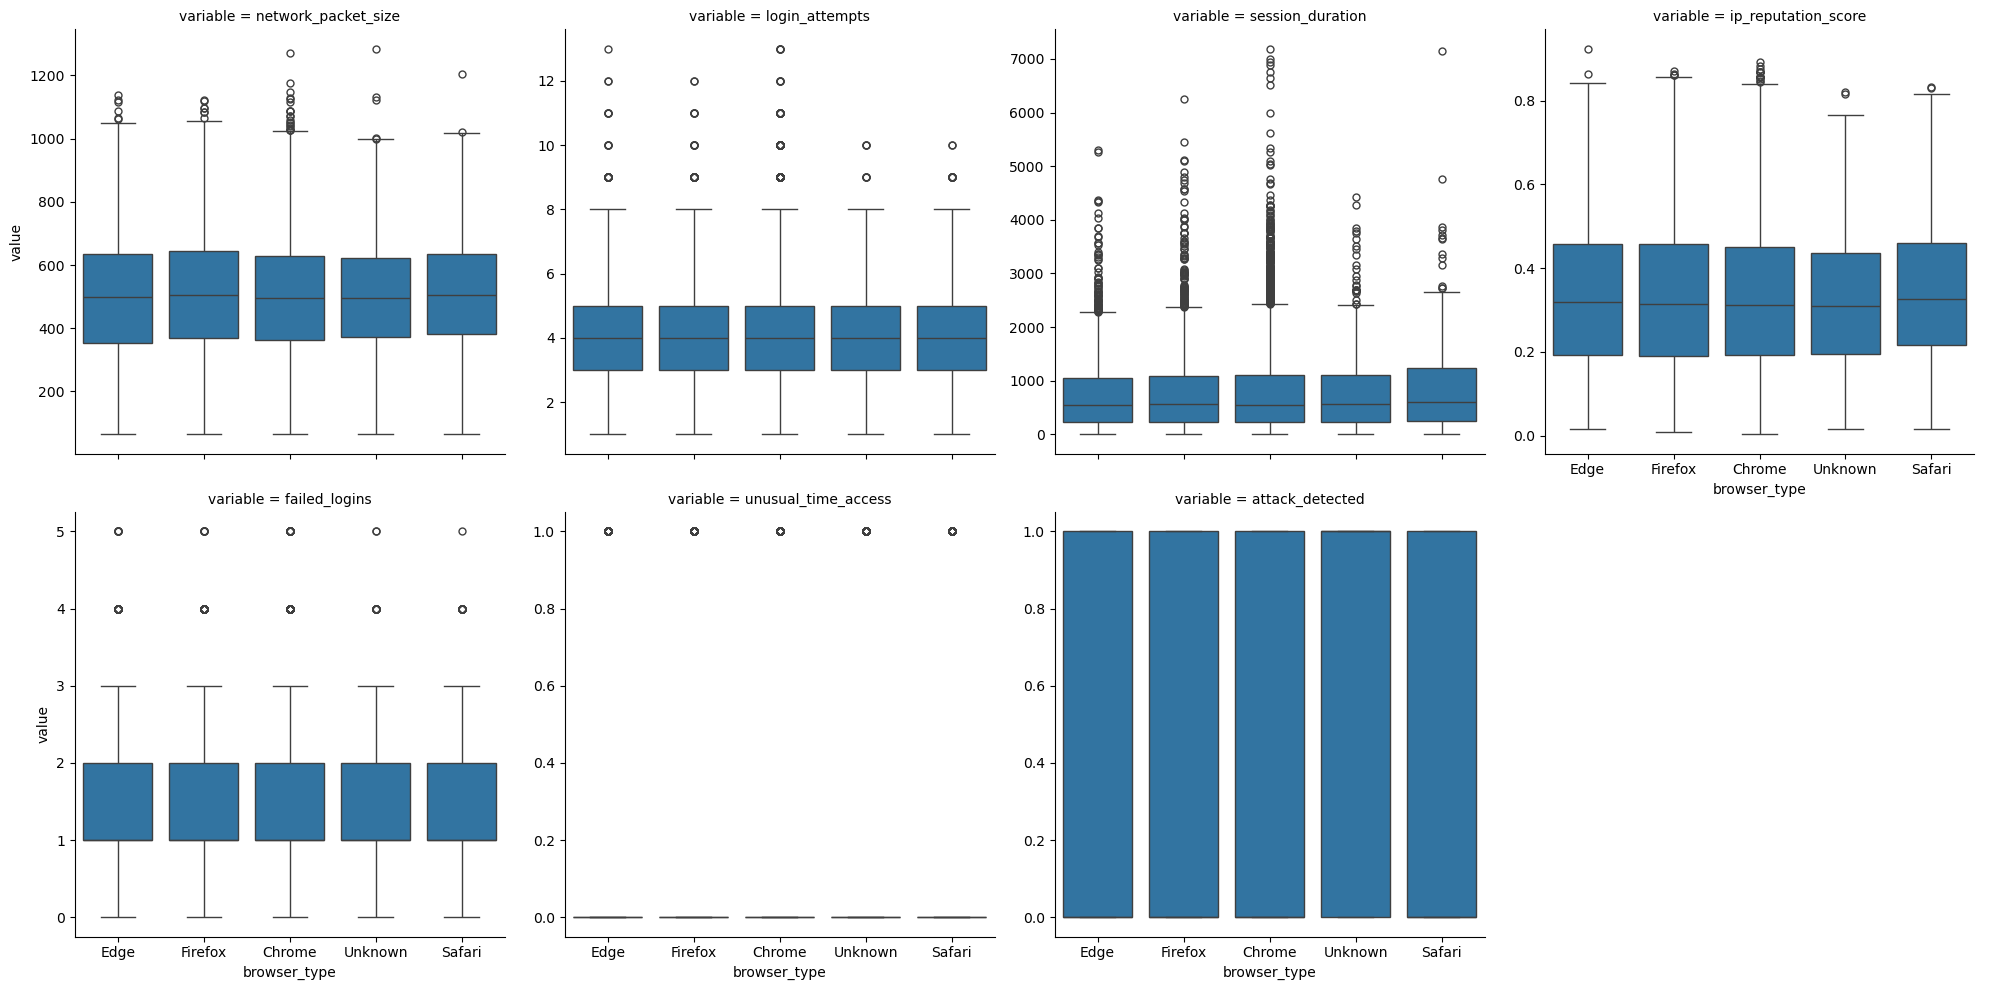

In [53]:
sns.catplot(data=df_clean_lf, 
            x='browser_type', 
            y='value', 
            col='variable', 
            col_wrap=4,
            kind='box', 
            sharey=False)
plt.show()

### Box Plots – Distribution of Each Numerical Variable by `browser_type`, Colored by `encryption_used` Categorical Variable, Faceted by the Respective Numerical Variable

All groups look similar in their centers: network packet size medians are around 400–600, login attempts medians about 3–4, and failed logins are low (mostly 0–2); unusual time access is almost always 0. Session duration is highly skewed with many large outliers (Chrome and Unknown show the heaviest upper tails). IP reputation score centers around ~0.2–0.4 with similar spread across browsers/encryptions, though Chrome/AES show more high outliers. attack detected is clearly bimodal (0 and 1 present in every group), so differences in total attack counts are driven more by volume than by dramatically different attack rates

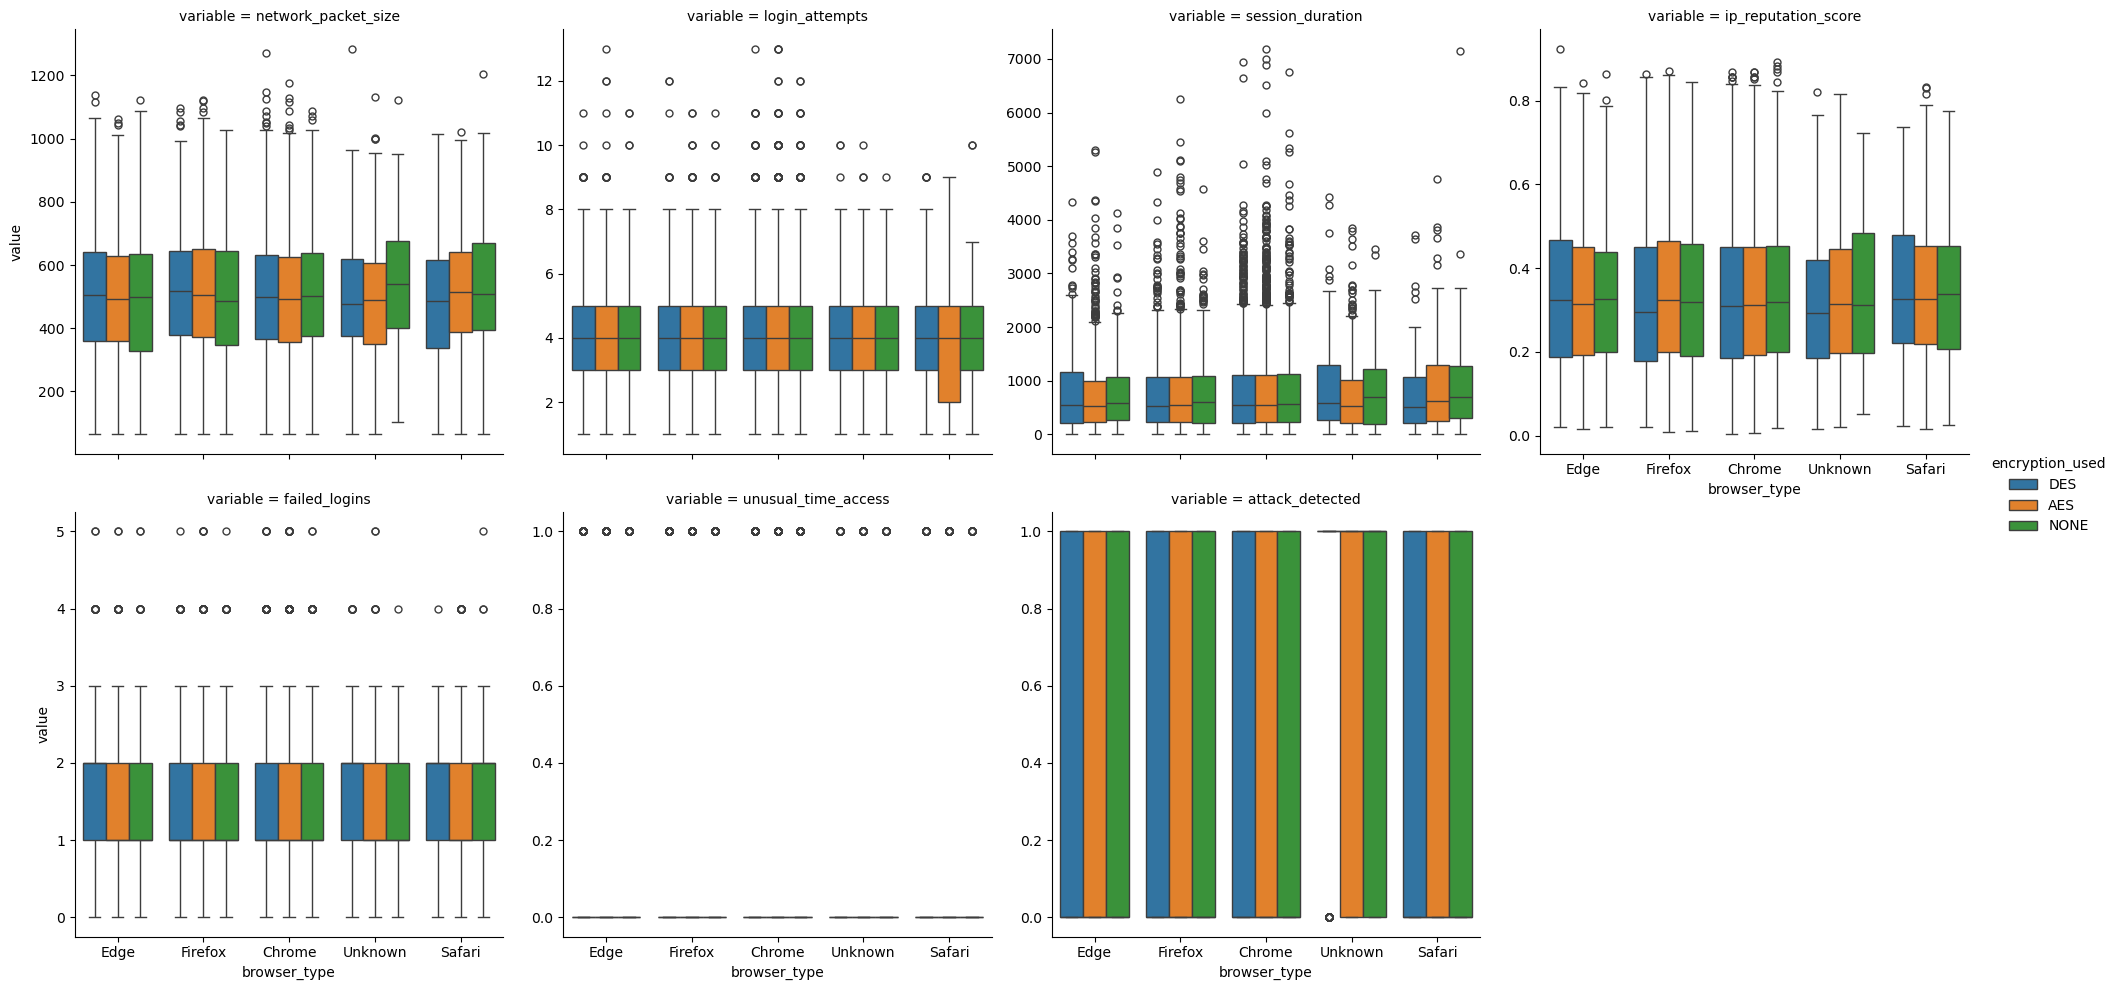

In [54]:
sns.catplot(data=df_clean_lf, 
            x='browser_type', 
            y='value', 
            col='variable', 
            col_wrap=4,
            hue='encryption_used',
            kind='box', 
            sharey=False)
plt.show()

### Box Plot – Marginal Distributions of the `attack_detected` Continuous Variable, Grouped by Each `encryption_used` Categorical Variable

Each encryption group (DES, AES, NONE) shows both non‑attacks and attacks and the attack rate looks roughly similar across all three—no major difference by encryption type.

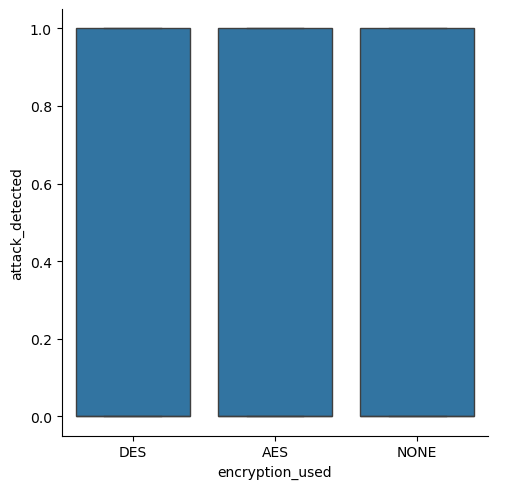

In [55]:
sns.catplot(data=df_clean, 
            x='encryption_used', 
            y='attack_detected', 
            kind='box')
plt.show()

### Box Plot – Distribution of the `attack_detected` Continuous Variable Across `login_attempts` Continuous Variable, Colored by Each `browser_type` Categorical Variable

For non‑attacks (0) most browsers have similar login attempts (median ~3–4), but Unknown is noticeably lower (median ~1–2) and tighter; for attacks (1) medians rise for all browsers and Firefox/Chrome/Safari/Edge show much wider upper tails with many extreme outliers (up to ~12–13), while Unknown again stands out with fewer extremes and a smaller spread (lower max). In short: Unknown has a lower baseline and far fewer extreme retry attempts than the named browsers and that difference could mean Unknown is a different traffic source (e.g., services or poorly parsed user‑agents).

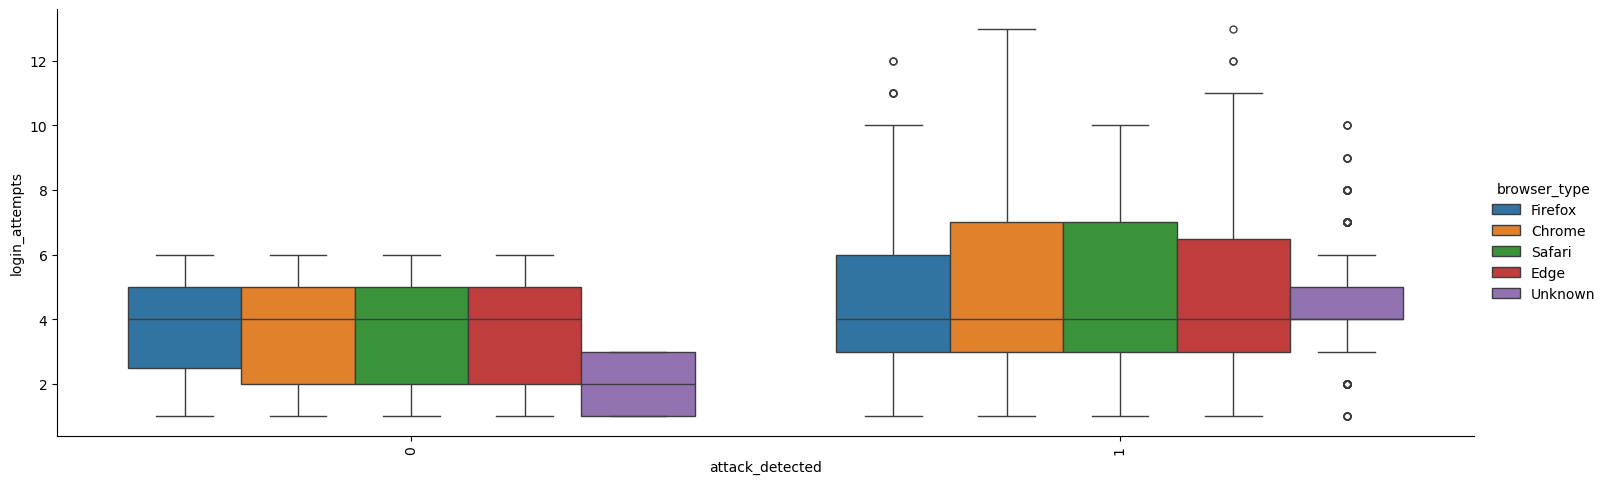

In [56]:
sns.catplot(data=df_clean, 
            x='attack_detected', 
            y='login_attempts', 
            hue='browser_type', 
            kind='box',
            aspect=3)
plt.xticks(rotation=90) 
plt.show()

### Violin Plots – Distribution Density of Each Numerical Variable by `browser_type`, Faceted by the Respective Numerical Variable

Overall, the violin plots show similar central tendencies across browsers: network packet size medians are roughly 400–600, login attempts medians are near 3–4, failed logins are concentrated at 0–2, and unusual time access is almost always 0. Session duration is strongly right‑skewed with long upper tails (Chrome and Edge among those with the heaviest tails), IP reputation_score mass is centered around ~0.2–0.4, and attack detected is bimodal (clear mass at both 0 and 1) for every browser. The 'Unknown' browser has, in some earlier plots, appeared to show a tighter, lower distribution of login attempts and fewer extreme failed login outliers, but that difference is not large or fully consistent in the current violin.

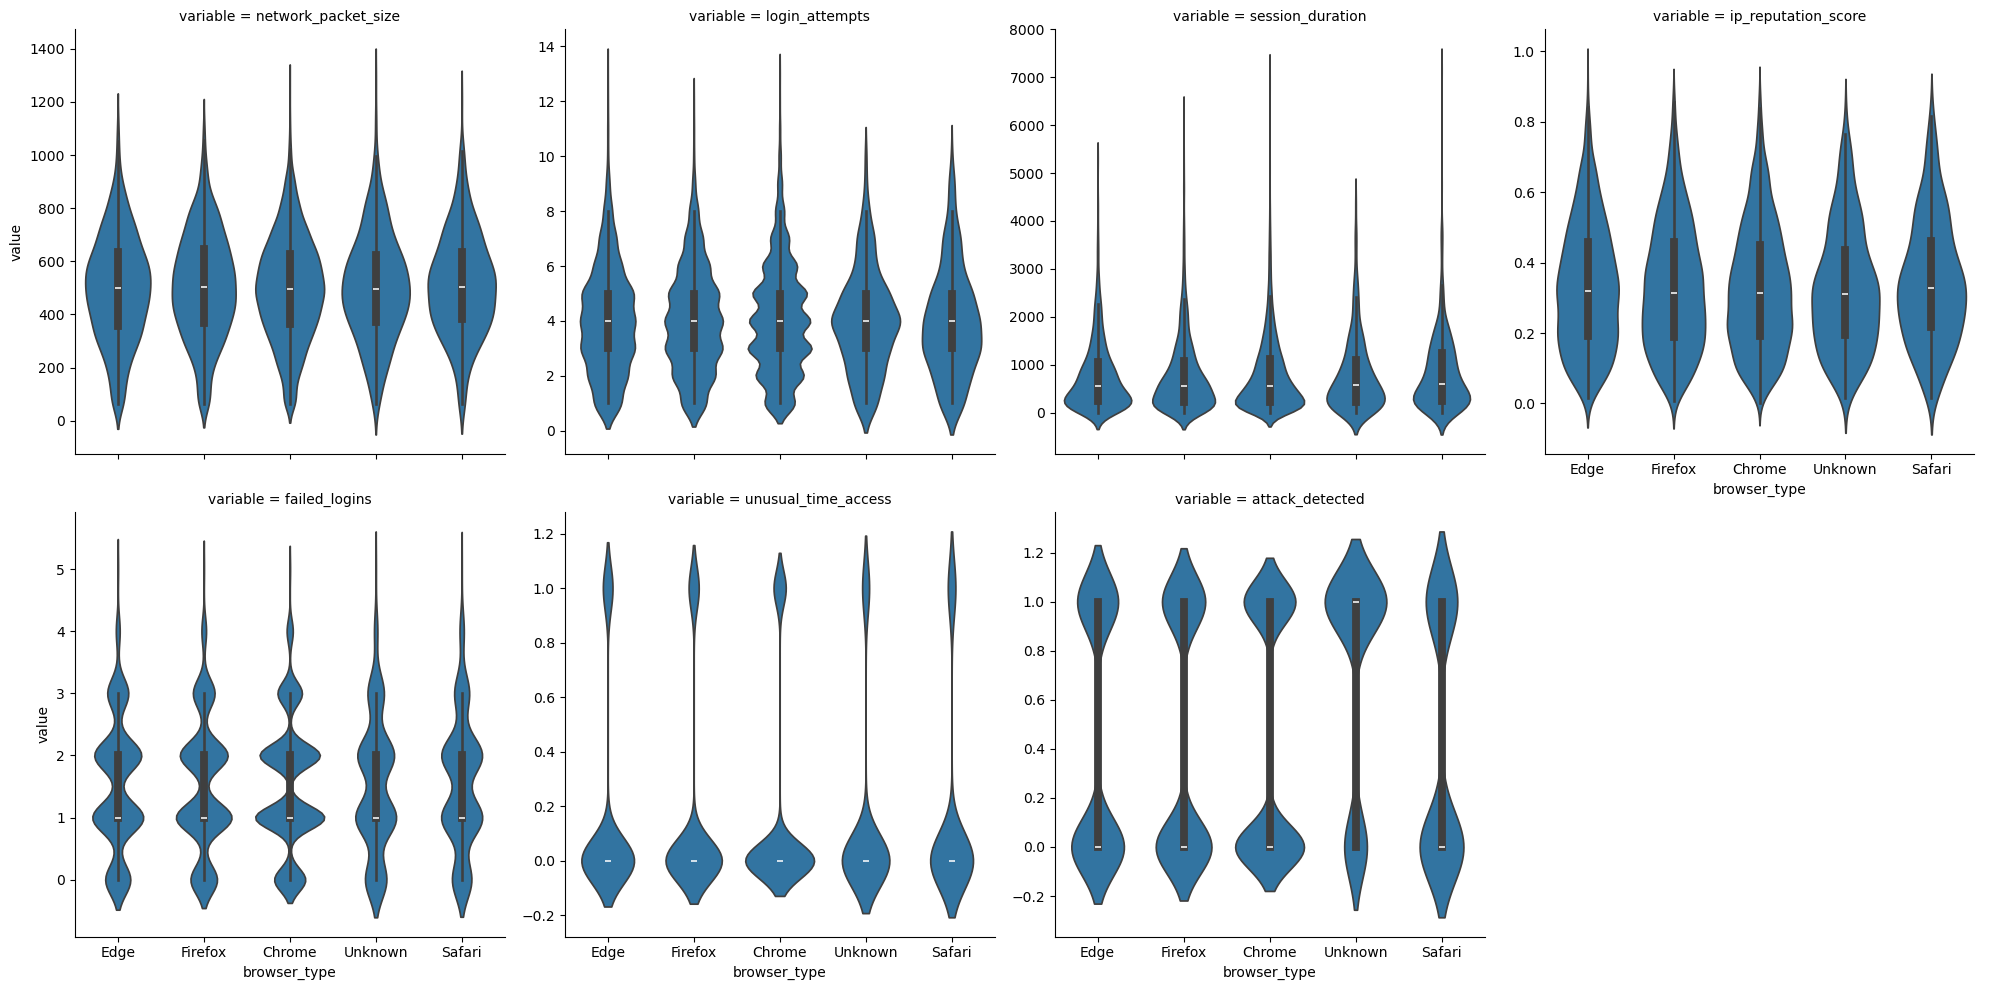

In [57]:
sns.catplot(data=df_clean_lf, 
            x='browser_type', 
            y='value', 
            col='variable', 
            col_wrap=4,
            kind='violin', 
            sharey=False)  
plt.show()

### Violin Plots – Distribution Density of Each Numerical Variable by `browser_type`, Colored by `protocol_type`, Faceted by the Respective Numerical Variable

Overall, the violin plots show similar central tendencies across browsers, network packet size medians around 400–600, login attempts medians near 3–4, failed logins concentrated at 0–2, and unusual time access almost always 0 while session duration is strongly right‑skewed with long upper tails (especially in Chrome/Edge and TCP), IP reputation score mass lies roughly between 0.2–0.4, attack detected is bimodal in every group, and the 'Unknown' browser sometimes appears to have a tighter/lower login attempts distribution.

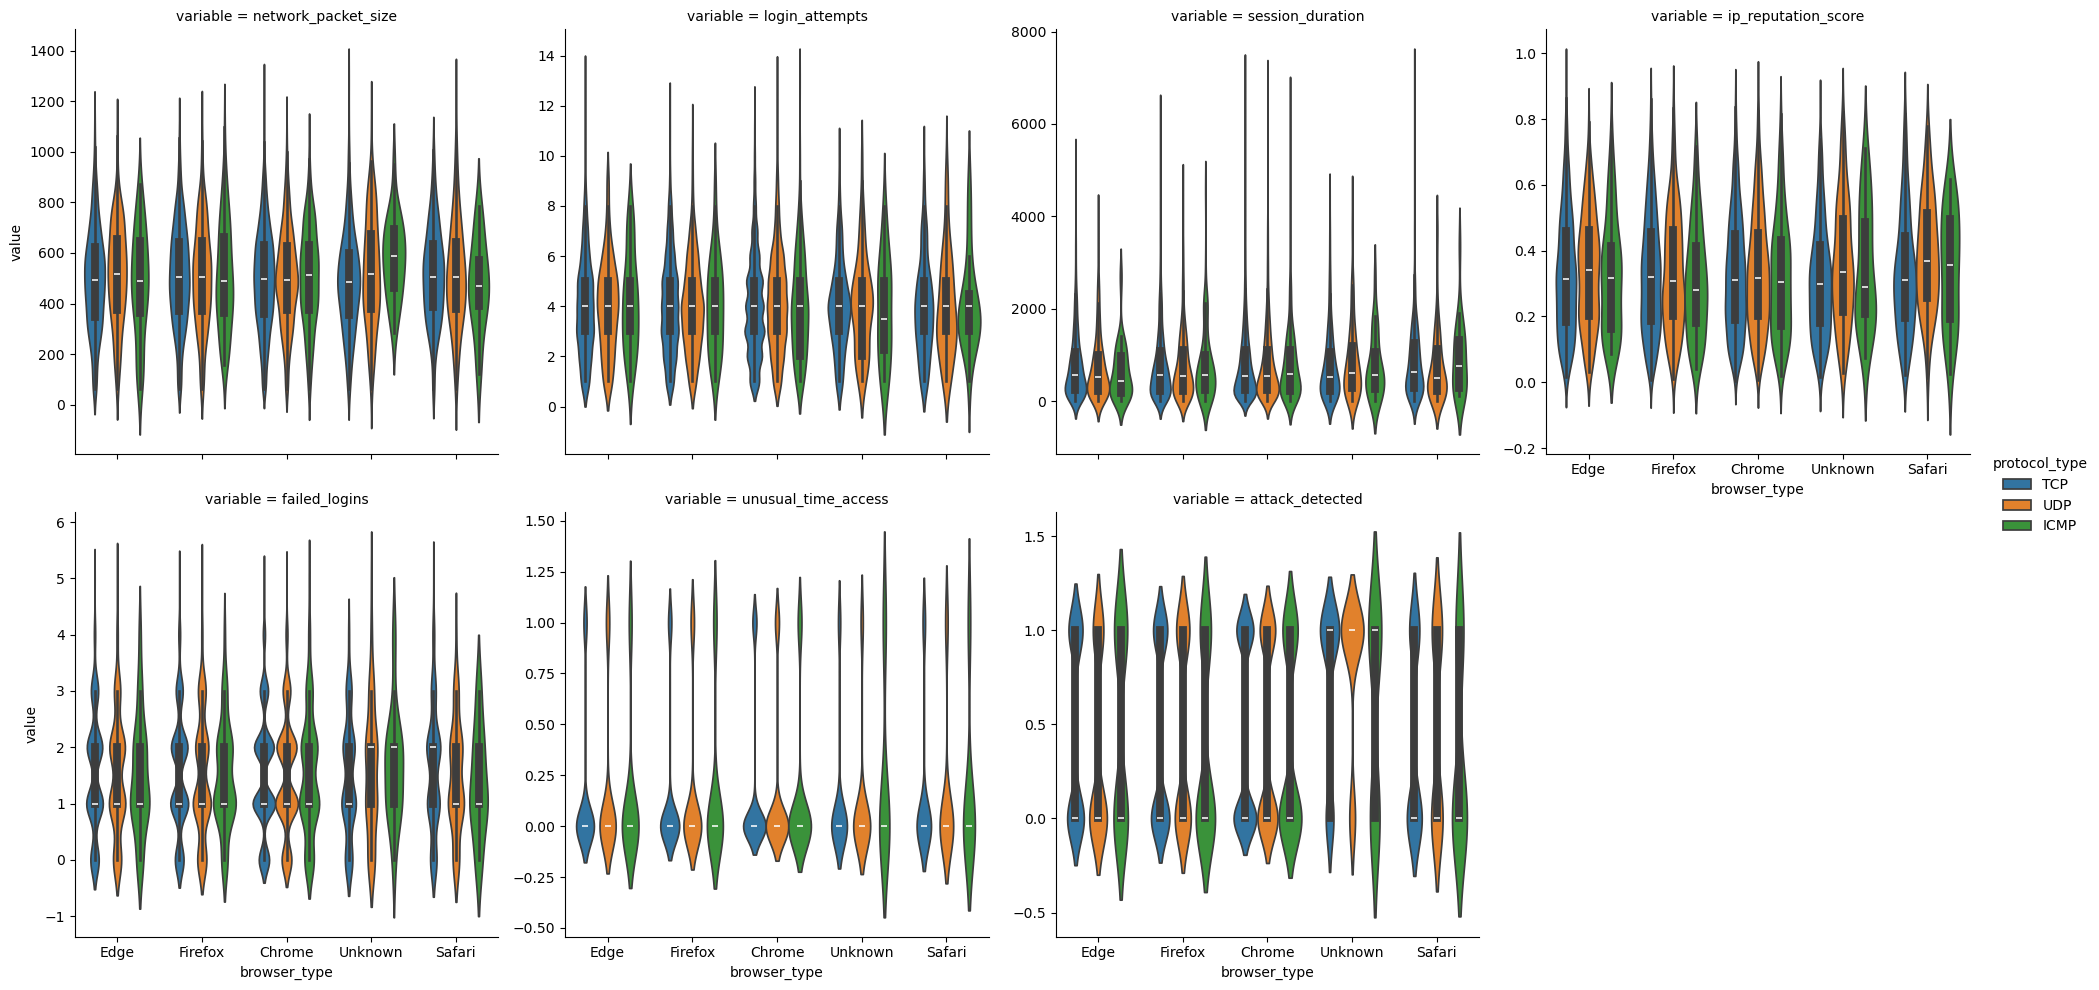

In [58]:
sns.catplot(data=df_clean_lf, 
            x='browser_type', 
            y='value', 
            col='variable', 
            col_wrap=4,
            hue='protocol_type',
            kind='violin', 
            sharey=False)
plt.show()

### Violin Plot – Marginal Distribution Density of the `attack_detected` Continuous Variable, Grouped by Each `encryption_used` Categorical Variable

All three encryption groups show the same bimodal pattern (mass at 0 and 1), so attacks occur across DES/AES/NONE with no clear difference in attack rate visible from the plot.

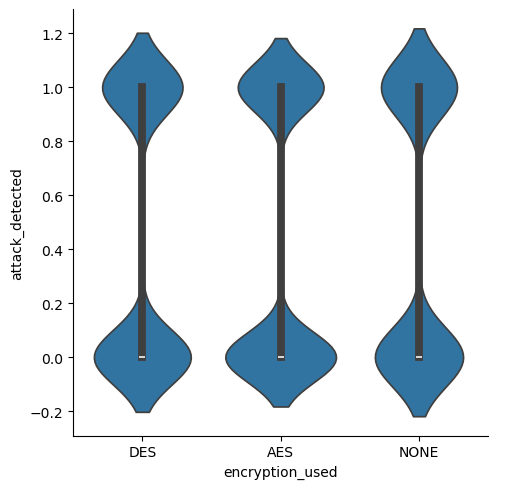

In [59]:
sns.catplot(data=df_clean, 
            x='encryption_used', 
            y='attack_detected', 
            kind='violin')
plt.show()

### Point Plots – Mean and Confidence Interval of Each Numerical Variable by `browser_type`, Faceted by the Respective Numerical Variable

The Unknown browser shows a much higher attack_detected rate (~72%) compared with other browsers (~41–45%), while other metrics are broadly similar across browser_type: network packet size medians are roughly 495–512  (Safari highest), login attempts are about 4.0, failed logins about 1.5, unusual time access is near zero (~0.13–0.16), IP reputation score centers around 0.32–0.345 (slightly higher for Safari), and session duration averages are modestly higher for Safari and Unknown (~830 and ~805) though their confidence intervals overlap.

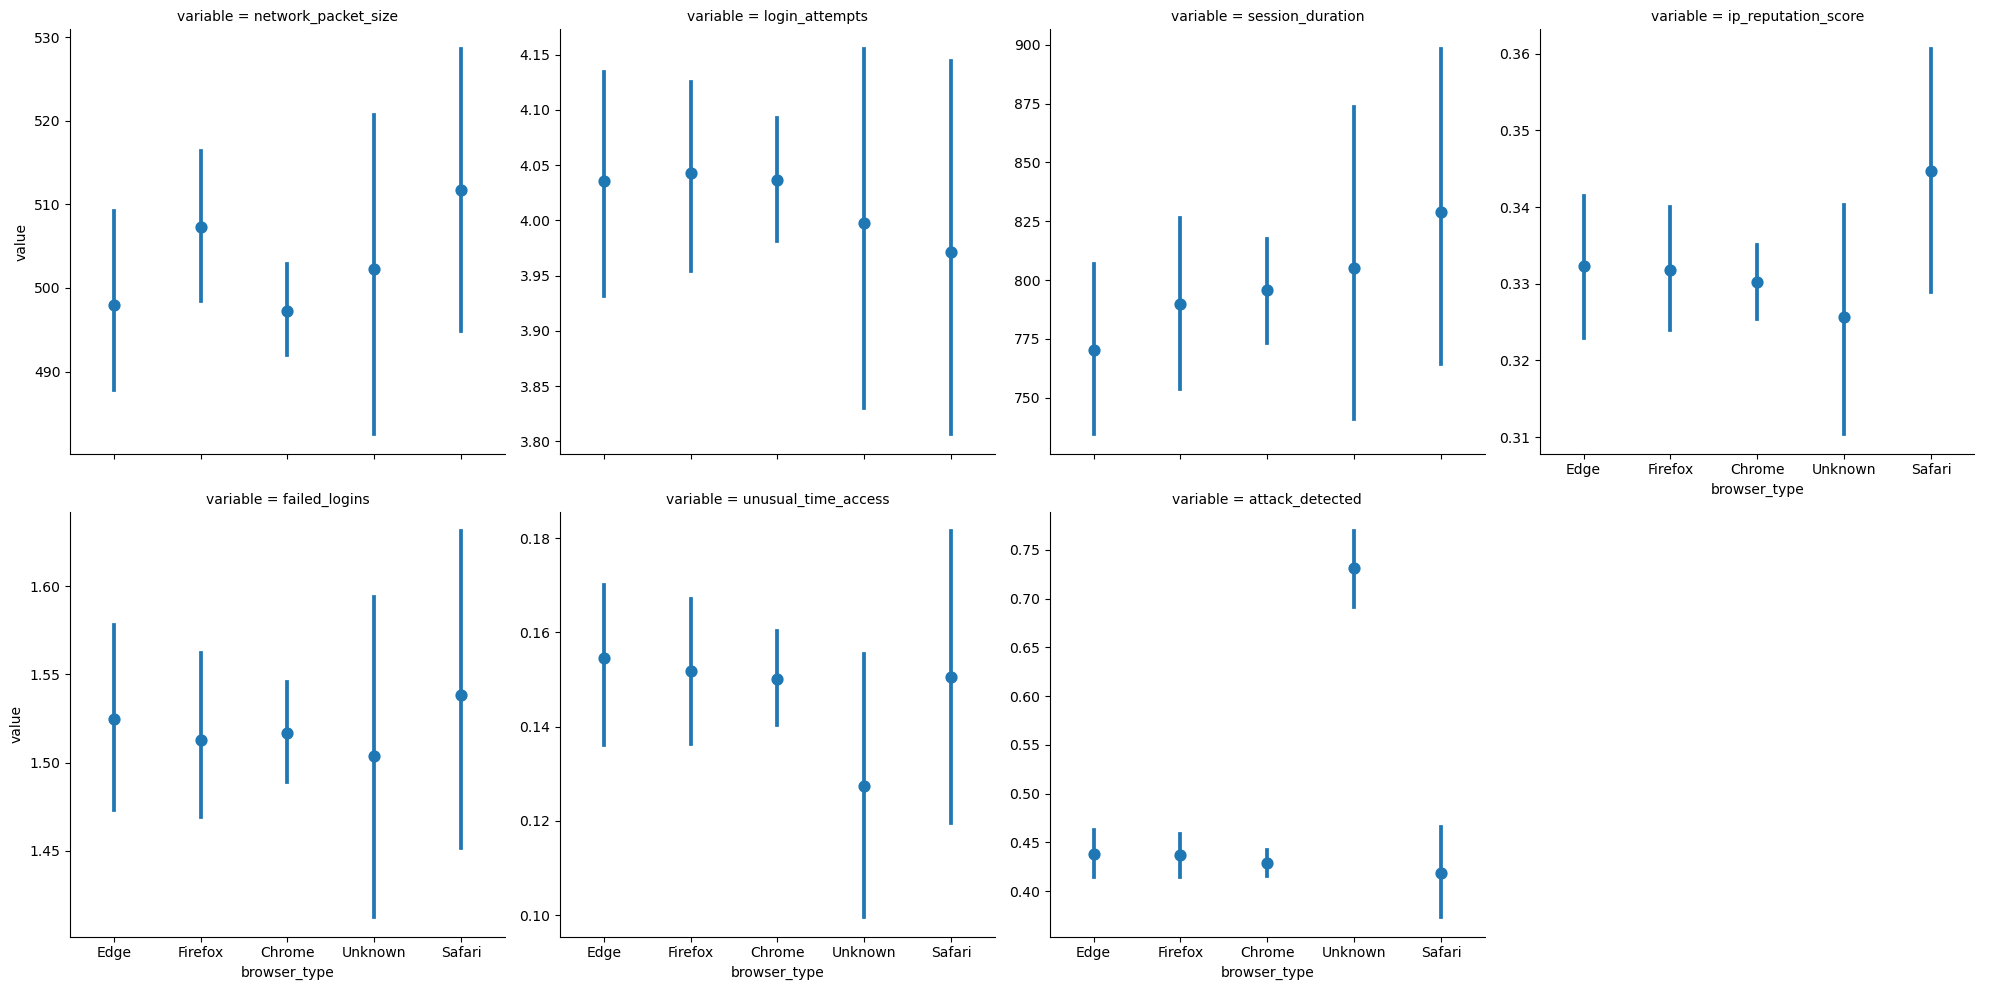

In [60]:
sns.catplot(data=df_clean_lf, 
            x='browser_type', 
            y='value', 
            col='variable', 
            col_wrap=4,
            kind='point', 
            sharey=False,
            linestyle='none')
plt.show()

### Point Plots – Mean and Confidence Interval of Each Numerical Variable by `browser_type`, Colored by `protocol_type` Categorical Variable, Faceted by the Respective Numerical Variable

That wider CI for ICMP is noteworthy as it likely reflects a much smaller ICMP sample size and/or much higher within‑group variance, making ICMP mean estimates far less precise than TCP/UDP and meaning any apparent ICMP differences should be treated cautiously; overall, the Unknown browser exhibits a markedly higher attack detected rate (about 70–80%) versus other browsers (roughly 40–50%), while network packet size, login attempts, failed logins, IP reputation score, and unusual time access show similar central tendencies across browsers with overlapping CIs, and session_duration is modestly higher on average for Unknown and Safari (though their CIs overlap), with protocol type primarily driving tail behavior and variability.

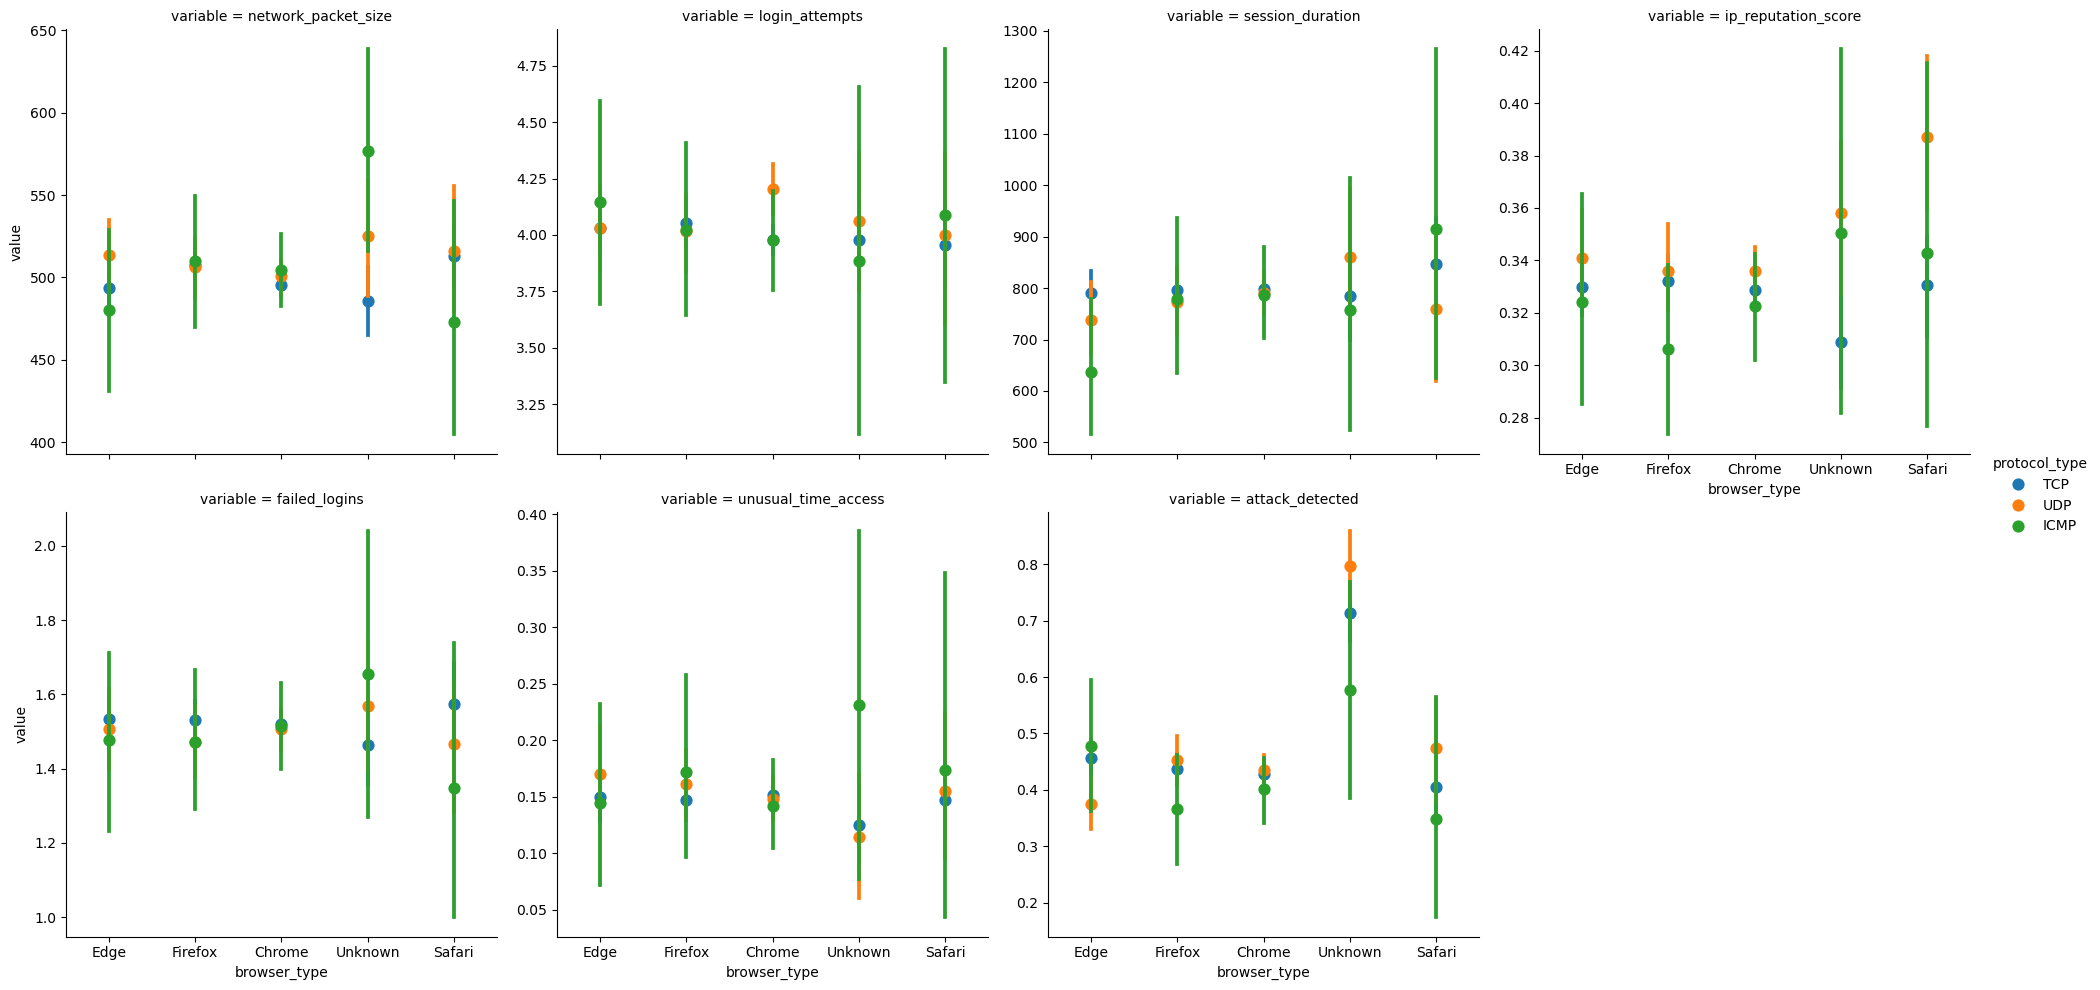

In [61]:
sns.catplot(data=df_clean_lf, 
            x='browser_type', 
            y='value', 
            col='variable', 
            col_wrap=4,
            hue='protocol_type',
            kind='point', 
            sharey=False,
            linestyle='none')
plt.show()

### Point Plot – Mean and Confidence Interval of the `attack_detected` Continuous Variable, Grouped by Each `encryption_used` Categorical Variable

The plot shows slightly higher mean attack rates for NONE (~0.46) and DES (~0.45) versus AES (~0.44), but the confidence intervals overlap meaning the differences are small and may not be statistically significant.

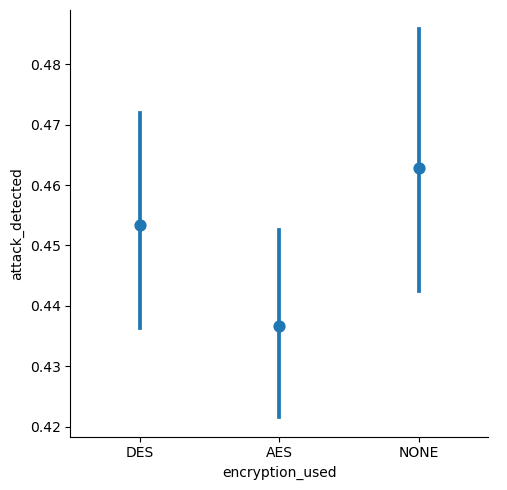

In [62]:
sns.catplot(data=df_clean, 
            x='encryption_used', 
            y='attack_detected', 
            kind='point', 
            linestyle='none')
plt.show()

### Point Plot – Mean and Confidence Interval of the `attack_detected` Continuous Variable, Grouped by Each Combination of `browser_type` Categorical Variable, Colored by `protocol_type` Categorical Variable

Across protocols the Unknown browser shows markedly higher attack rates (UDP ≈0.80, TCP ≈0.72, ICMP ≈0.58) compared with other browsers (roughly 0.37–0.50), and the ICMP estimates have noticeably wider confidence intervals especially for Unknown and Safari suggesting smaller ICMP sample sizes or higher within‑group variance, so protocol/browser differences for ICMP should be interpreted cautiously.

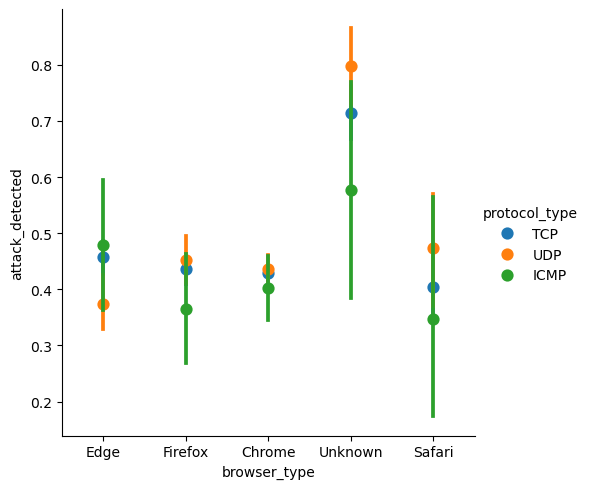

In [63]:
sns.catplot(data=df_clean, 
            x='browser_type', 
            y='attack_detected', 
            hue='protocol_type', 
            kind='point',  
            linestyle='none')
plt.show()

### Pair Plots – Pairwise Relationships of All Numerical Variables

Overall, network packet size and session duration are right‑skewed with long upper tails, login attempts and failed logins are small discrete counts, IP reputation score is spread roughly 0–0.8 and unusual time access is mostly zero, attack detected is binary and the Unknown browser shows a much higher attack rate (about 70–80%) versus other browsers (around 40–50%), session duration is somewhat larger for Unknown and Safari though confidence intervals overlap, protocol type drives much of the variability and the ICMP estimates have noticeably wider confidence intervals likely from smaller sample sizes or higher within‑group variance as ICMP differences should be treated cautiously.

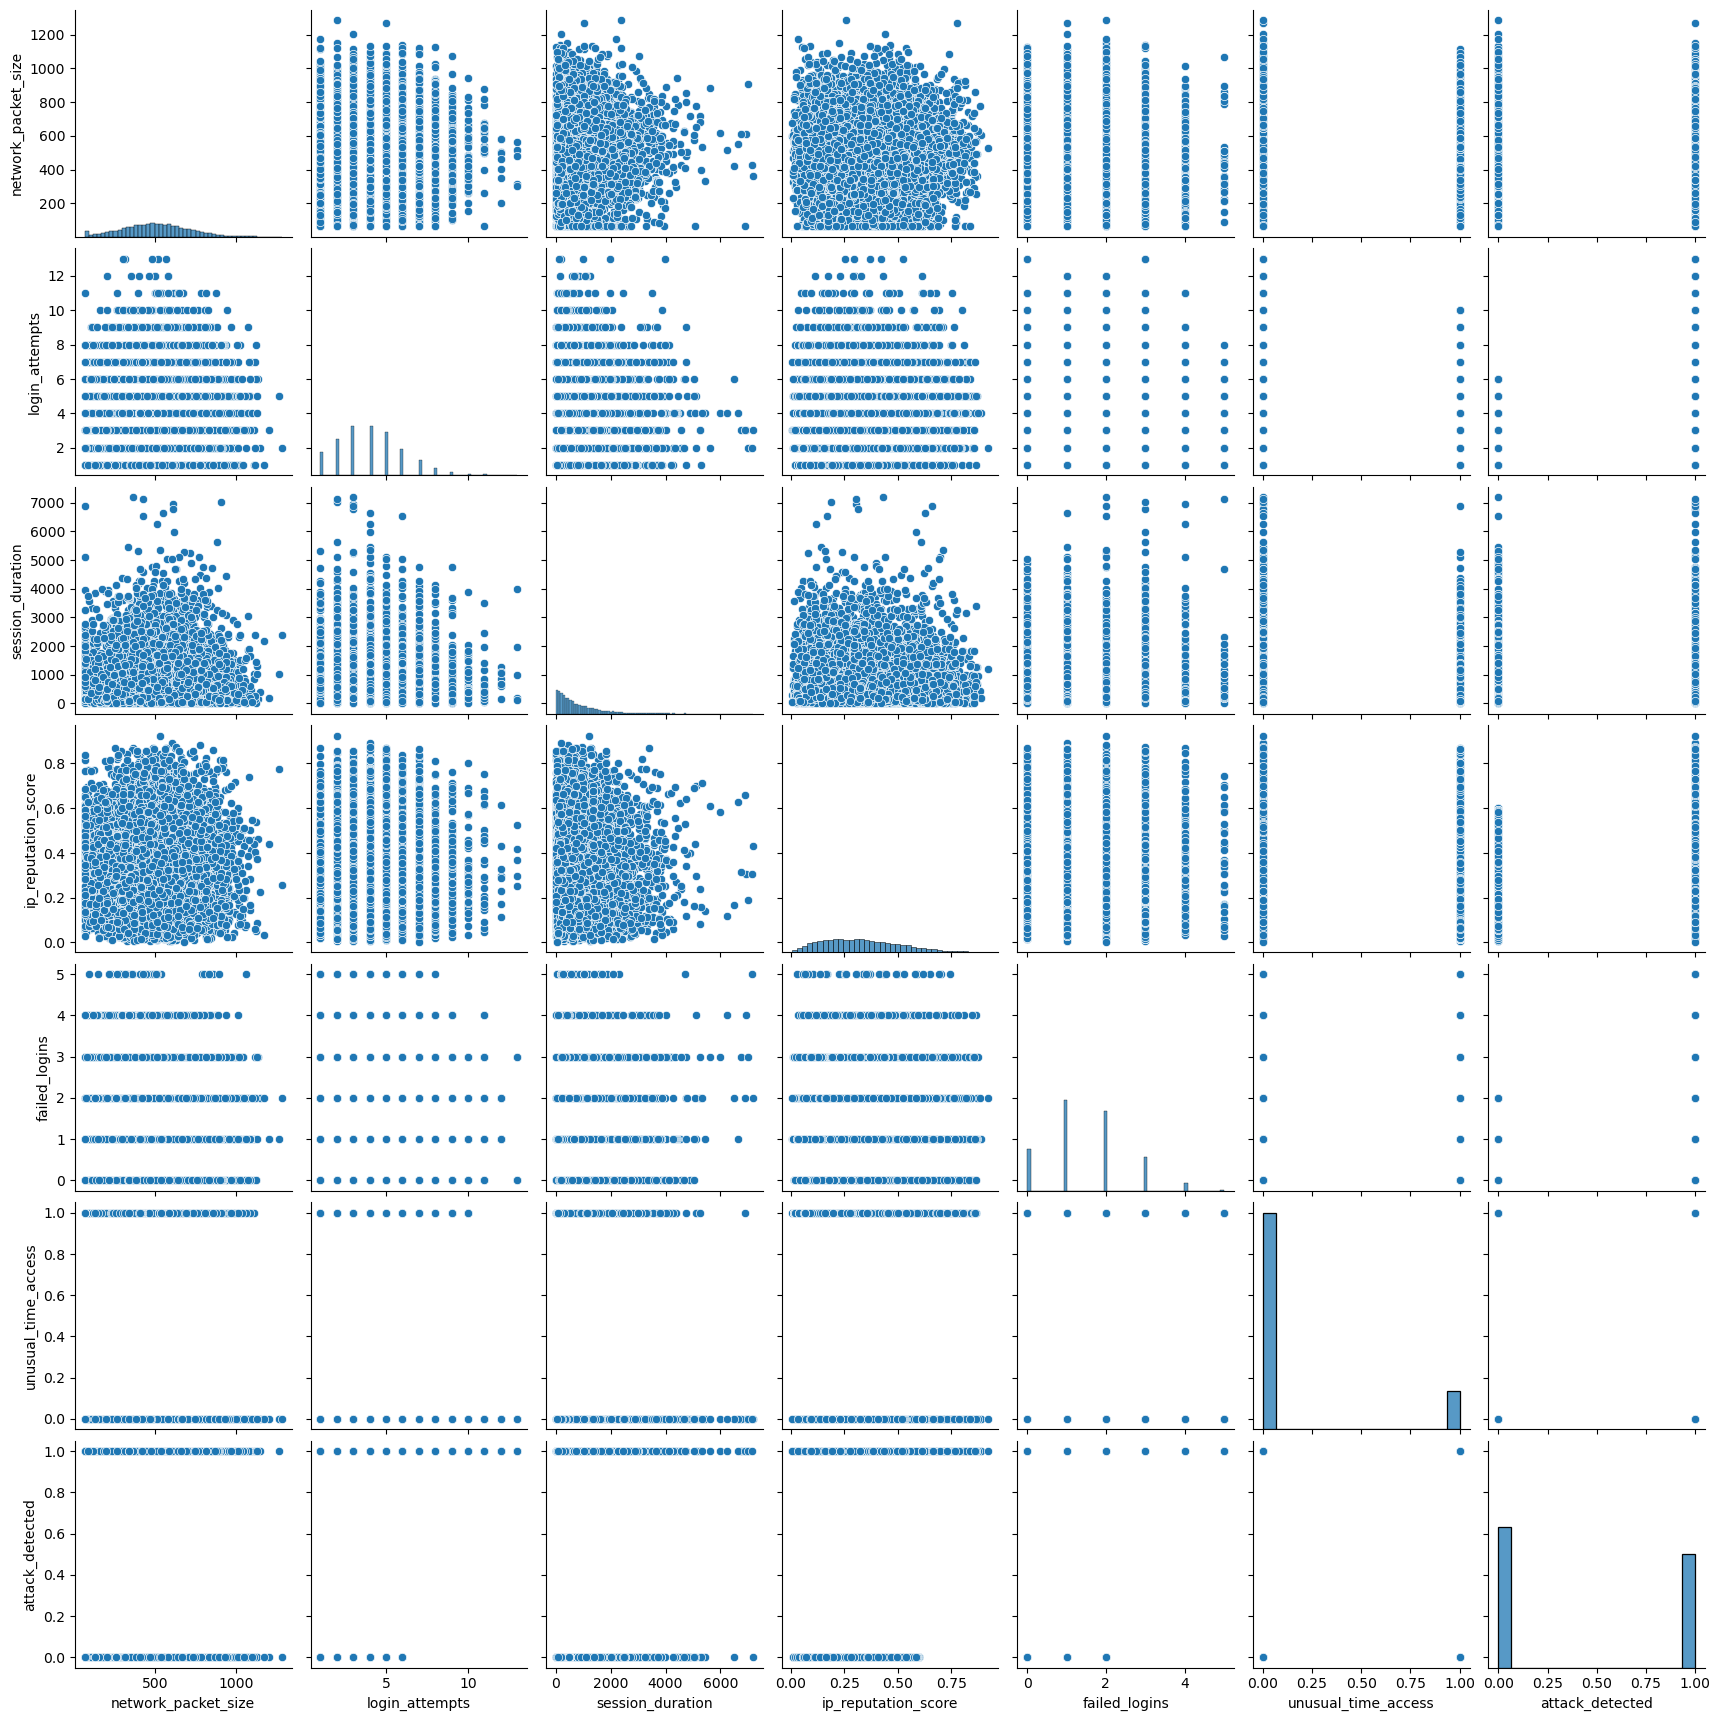

In [64]:
sns.pairplot(df_clean)
plt.show()

### Pair Plots – Pairwise Relationships of All Numerical Variables, Colored by `browser_type` Categorical Variable

In the pairwise plot, network packet size and session duration are right‑skewed with long upper tails, login attempts and failed logins appear as small discrete counts, IP reputation score is spread across the 0–1 range, unusual time access is mostly zero, and attack detected is binary with points clustered at 0 and 1 and a noticeably higher proportion of attacks in the Unknown browser; there are no strong linear relationships among the continuous variables aside from a modest positive association between packet size and session duration.

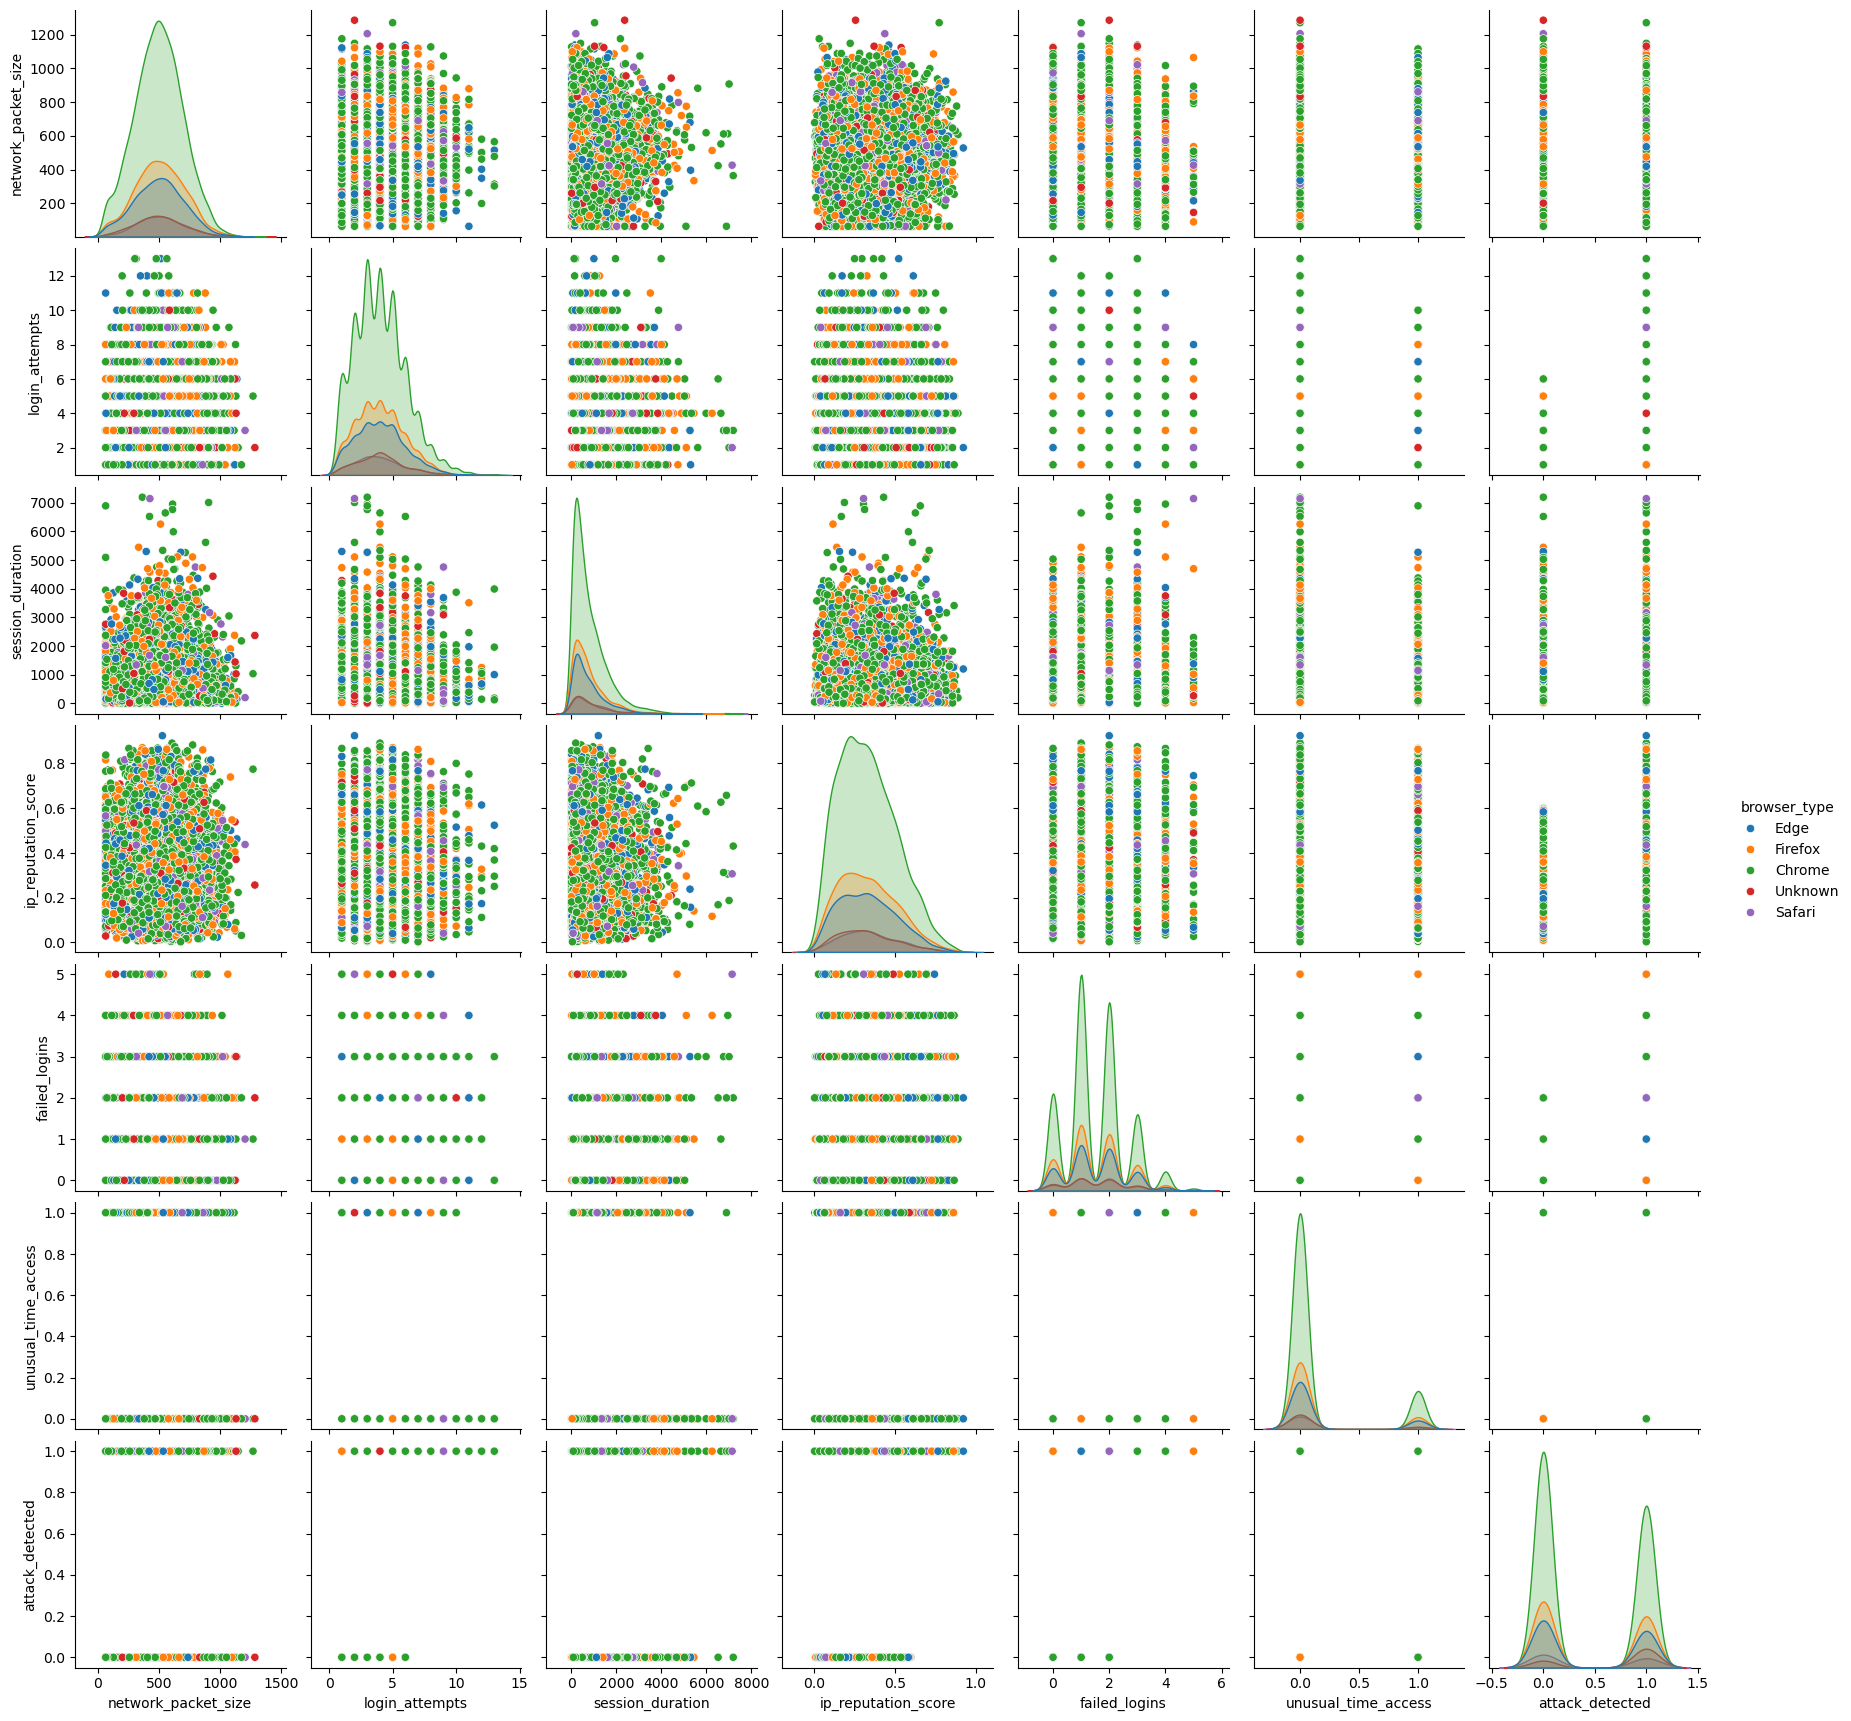

In [65]:
sns.pairplot(df_clean,
             hue='browser_type')
plt.show()

### Scatter Plot – Joint Distribution of the `attack_detected` and `network_packet_size` Continuous Variables

The scatterplot shows no clear separation: both attacked (1) and non‑attacked (0) sessions span the full range of network packet sizes, including the largest values, so packet size alone does not visibly distinguish attacked sessions.

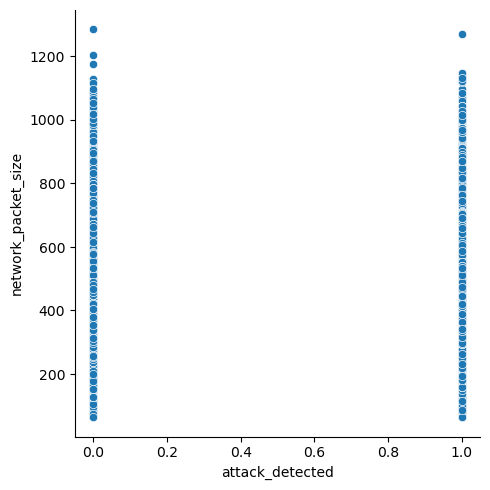

In [66]:
sns.relplot(data=df_clean, 
            x='attack_detected', 
            y='network_packet_size')
plt.show()

### Scatter Plot – Joint Distribution of the `attack_detected` and `login_attempts` Continuous Variables

Attacked sessions (1) show many more login attempts, up to about 13, while non‑attacked sessions (0) cluster at lower counts (mostly 1–6), which suggests a positive association between higher login attempts and attacks.

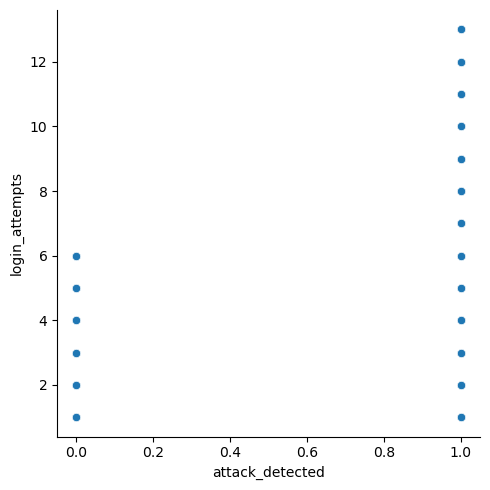

In [67]:
sns.relplot(data=df_clean, 
            x='attack_detected', 
            y='login_attempts')
plt.show()

### Scatter Plot – Joint Distribution of the `attack_detected` and `session_duration` Continuous Variables

There’s no clear separation as both attacked and non‑attacked sessions span the full range of session durations (including the longest values), so session duration alone does not visibly distinguish attacks; the groups overlap heavily (with a few very long durations among attacked sessions).

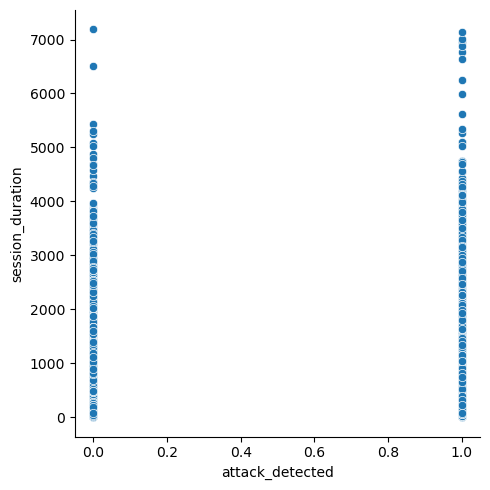

In [68]:
sns.relplot(data=df_clean, 
            x='attack_detected', 
            y='session_duration')
plt.show()

### Scatter Plot – Joint Distribution of the `attack_detected` and `ip_reputation_score` Continuous Variables

Attacked sessions show a much wider range of IP reputation scores including the highest values (up to about 0.9), while non‑attacked sessions are concentrated at lower scores (mostly below ~0.6), suggesting higher IP reputation scores are associated with attacks.

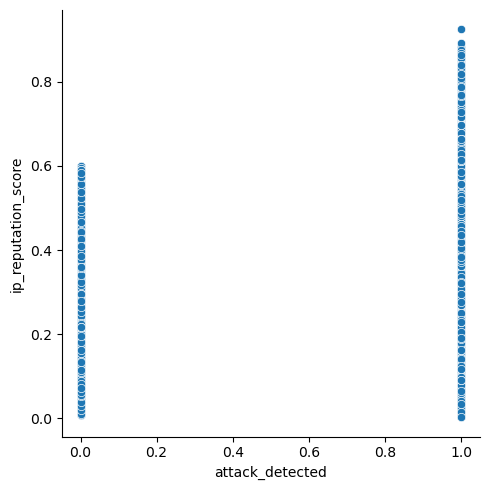

In [69]:
sns.relplot(data=df_clean, 
            x='attack_detected', 
            y='ip_reputation_score')
plt.show()

### Scatter Plot – Joint Distribution of the `attack_detected` and `failed_logins` Continuous Variables

Failed logins are higher and more variable in sessions with an attack detected (values up to about 5) while non‑attacked sessions cluster near 0–2, suggesting a positive association between more failed logins and attacks.

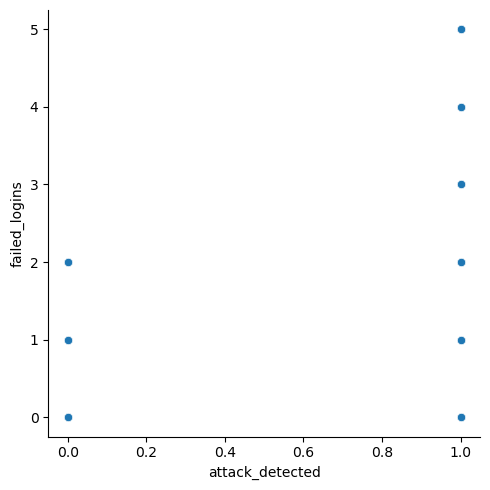

In [70]:
sns.relplot(data=df_clean, 
            x='attack_detected', 
            y='failed_logins')
plt.show()

### Scatter Plot – Joint Distribution of the `attack_detected` and `unusual_time_access` Continuous Variables

Unusual time access is rare (mostly zero) and occurs in both attacked and non‑attacked sessions (there are points at 0 and 1 for both classes), so it doesn’t clearly separate attacks.

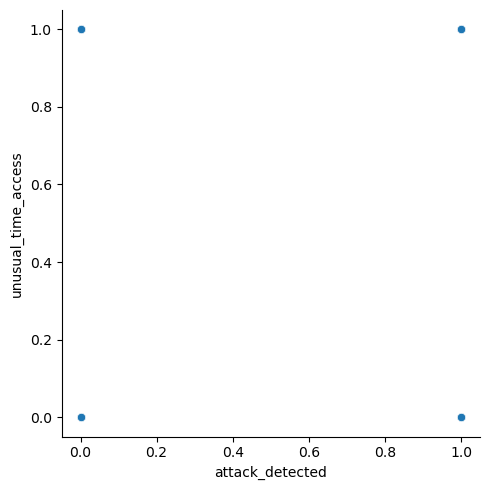

In [71]:
sns.relplot(data=df_clean, 
            x='attack_detected', 
            y='unusual_time_access')
plt.show()

### Scatter Plot – Joint Distribution of the `network_packet_size` and `session_duration` Continuous Variables

The scatter plot shows the relationship between network packet size and session duration as sessions with larger packet sizes tend to have a range of durations, but there is no strong linear pattern, with some clustering at shorter durations for various packet sizes.

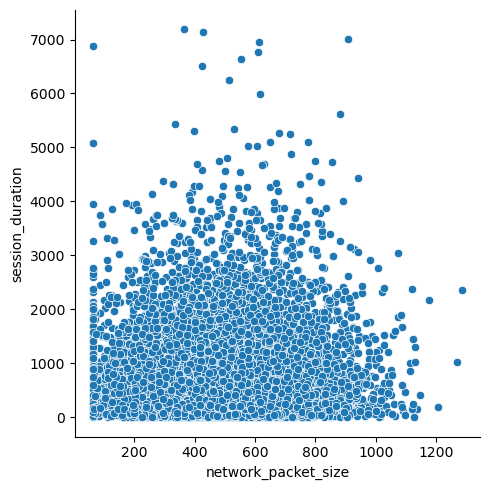

In [72]:
sns.relplot(data=df_clean, 
            x='network_packet_size', 
            y='session_duration')
plt.show()

### Scatter Plot – Joint Distribution of the `login_attempts` and `session_duration` Continuous Variables

The data form vertical stripes at integer login attempts, session durations are widely spread when login attempts are low but the upper range falls as login attempts increase, suggesting a modest negative relationship (more login attempts tend to occur in shorter sessions).

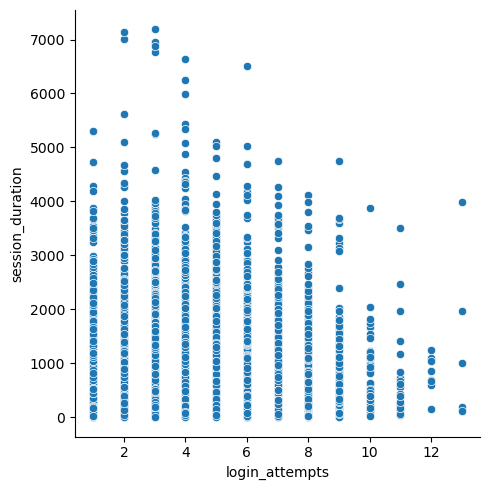

In [73]:
sns.relplot(data=df_clean, 
            x='login_attempts', 
            y='session_duration')
plt.show()

### Scatter Plot Facets – Joint Distribution of the `ip_reputation_score` and `failed_logins` Continuous Variables, Faceted by Each `browser_type` Categorical Variable

Across all browser types, failed logins (0–5) occur at nearly every IP reputation score, so there’s no clear relationship: points form vertical stripes of counts at all reputation values; Unknown and Safari show a few more high failed‑login outliers but overall the distributions overlap heavily, meaning IP reputation alone doesn’t separate sessions with many failed logins.

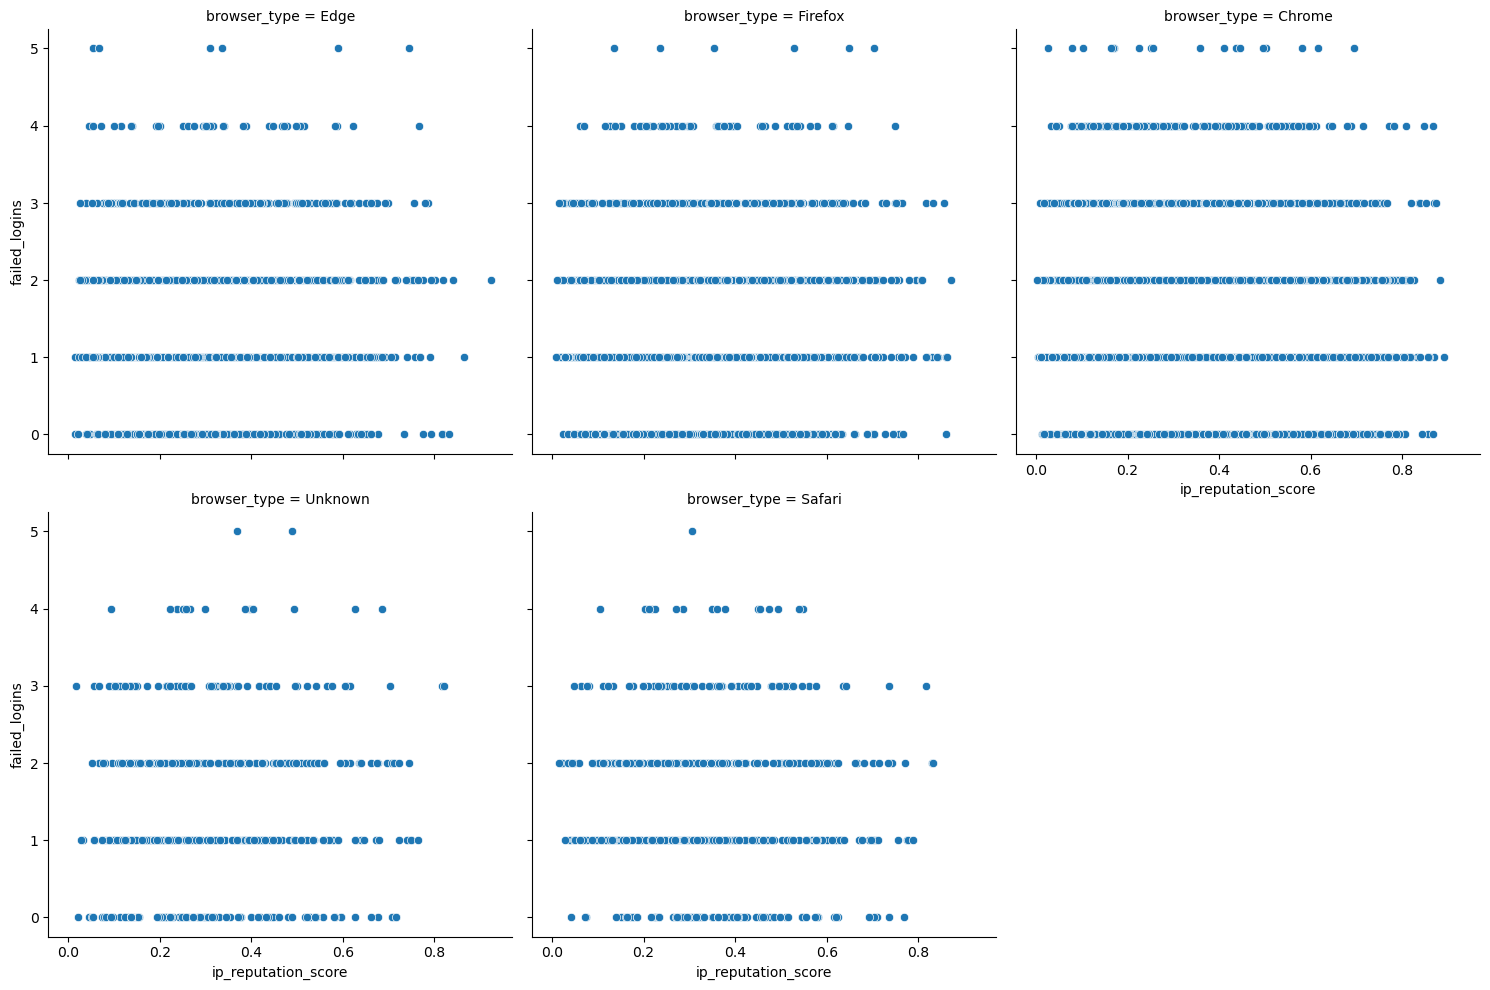

In [74]:
sns.relplot(data=df_clean, 
            x='ip_reputation_score', 
            y='failed_logins', 
            col='browser_type',
            col_wrap=3)
plt.show()

### Scatter Plot – Joint Distribution of the `login_attempts` and `session_duration` Continuous Variables, Colored by `encryption_used` Categorical Variable

Points form vertical stripes at integer login attempts with session durations widely spread at low login counts and a clear thinning of long sessions as login_attempts increases (i.e., more attempts tend to occur in shorter sessions), and the three encryption categories are mixed throughout those ranges with no obvious separation as all three show both short and very long durations and the highest-duration outliers appear for every encryption type as encryption used doesn’t visually distinguish session length here.

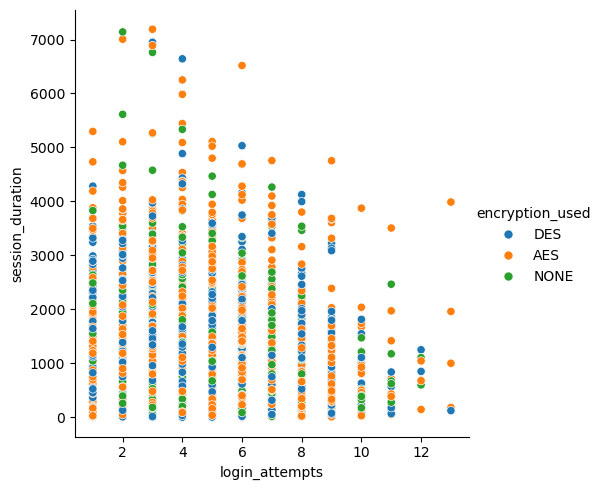

In [75]:
sns.relplot(data=df_clean, 
            x='login_attempts', 
            y='session_duration', 
            hue='encryption_used')
plt.show()

### Scatter Plot Facets – Joint Distribution of the `attack_detected` and `login_attempts` Continuous Variables, Faceted by Each `browser_type` Categorical Variable, Colored by `protocol_type` Categorical Variable

In all three protocols non‑attacked sessions cluster at low counts (roughly 1–6), while attacked sessions include many more high‑attempt cases (up to ~13), with TCP and UDP showing the largest number of high‑attempt attacks and ICMP having fewer points but the same tendency; browser types are mixed across the points so no single browser appears to drive the high‑attempt attacks as this suggests login attempts is positively associated with attacks across protocols.

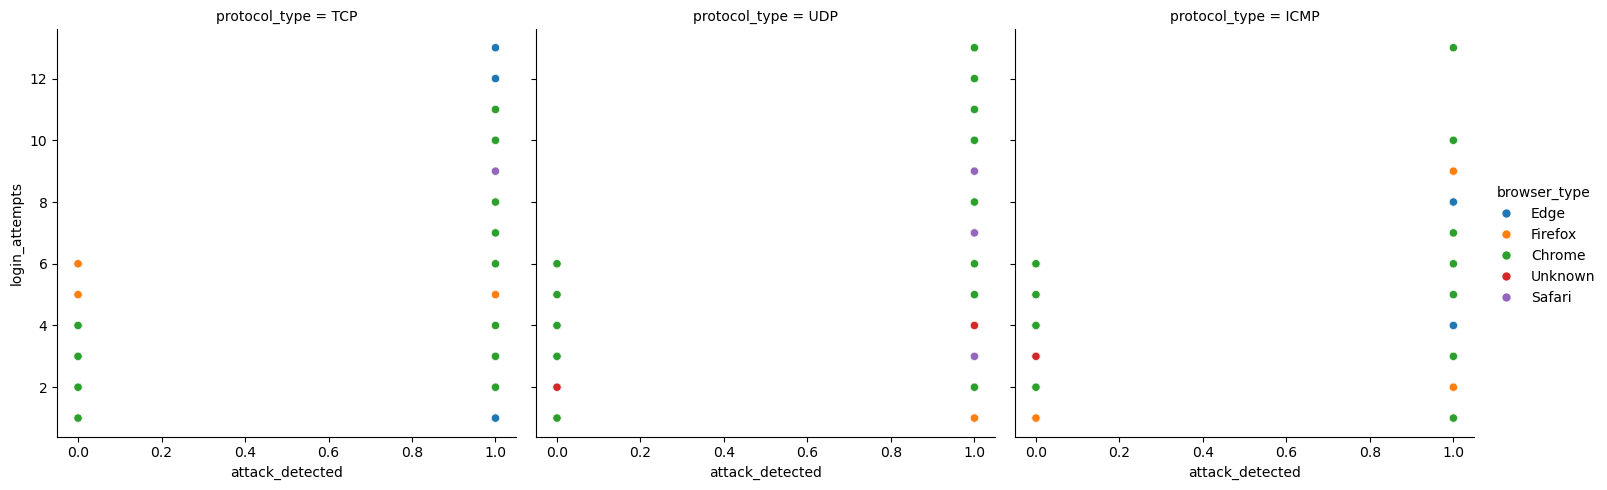

In [76]:
sns.relplot(data=df_clean, 
            x='attack_detected', 
            y='login_attempts', 
            hue='browser_type', 
            col='protocol_type')
plt.show()

### Scatter Plot Facets – Joint Distribution of the `network_packet_size` and `session_duration` Continuous Variables, Faceted by Each `browser_type` Categorical Variable, Colored by `protocol_type` Categorical Variable

Across the plots, the clearest signals are that sessions with many login attempts and more failed logins are much more likely to be flagged as attacks (attacked sessions include the highest counts up to ~13 attempts and ~5 failed logins), and attacked sessions tend to have higher IP reputation scores, while session duration and network packet size overlap heavily between attacked and non‑attacked sessions and therefore don’t by themselves separate attacks; unusual time access is rare and present in both groups, and categorical fields like encryption used and browser type are mixed throughout the ranges, so they don’t show obvious discriminatory patterns.

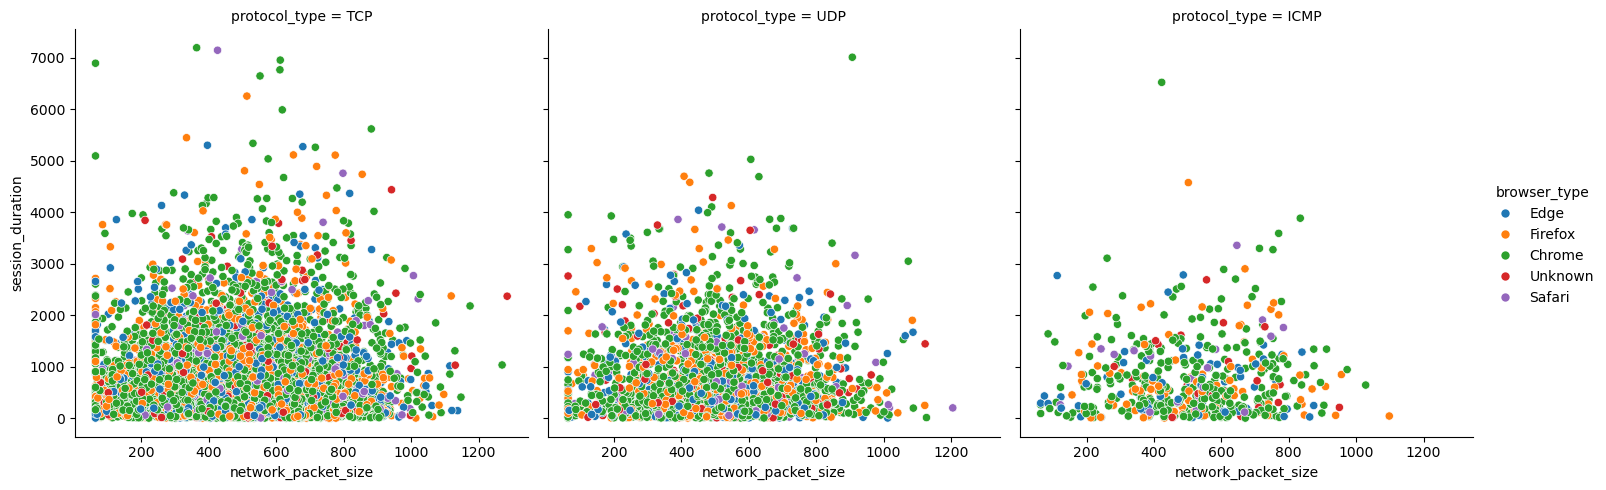

In [77]:
sns.relplot(data=df_clean, 
            x='network_packet_size', 
            y='session_duration', 
            hue='browser_type', 
            col='protocol_type')
plt.show()

### Scatter Plot Facets – Joint Distribution of the `failed_logins` and `ip_reputation_score` Continuous Variables, Faceted by Each Combination of `browser_type` and `protocol_type` Categorical Variables, Colored by `encryption_used` Categorical Variable

Across the faceted plots (protocol × browser) failed logins form vertical stripes at integer counts while IP reputation scores span the full 0–0.9 range at nearly every failed login value, so there’s heavy overlap and no clear, consistent monotonic relationship and a few protocol/browser panels show more high‑reputation points at higher failed login counts, but overall encryption types are mixed and no single combination cleanly separates low vs high failed logins by reputation.

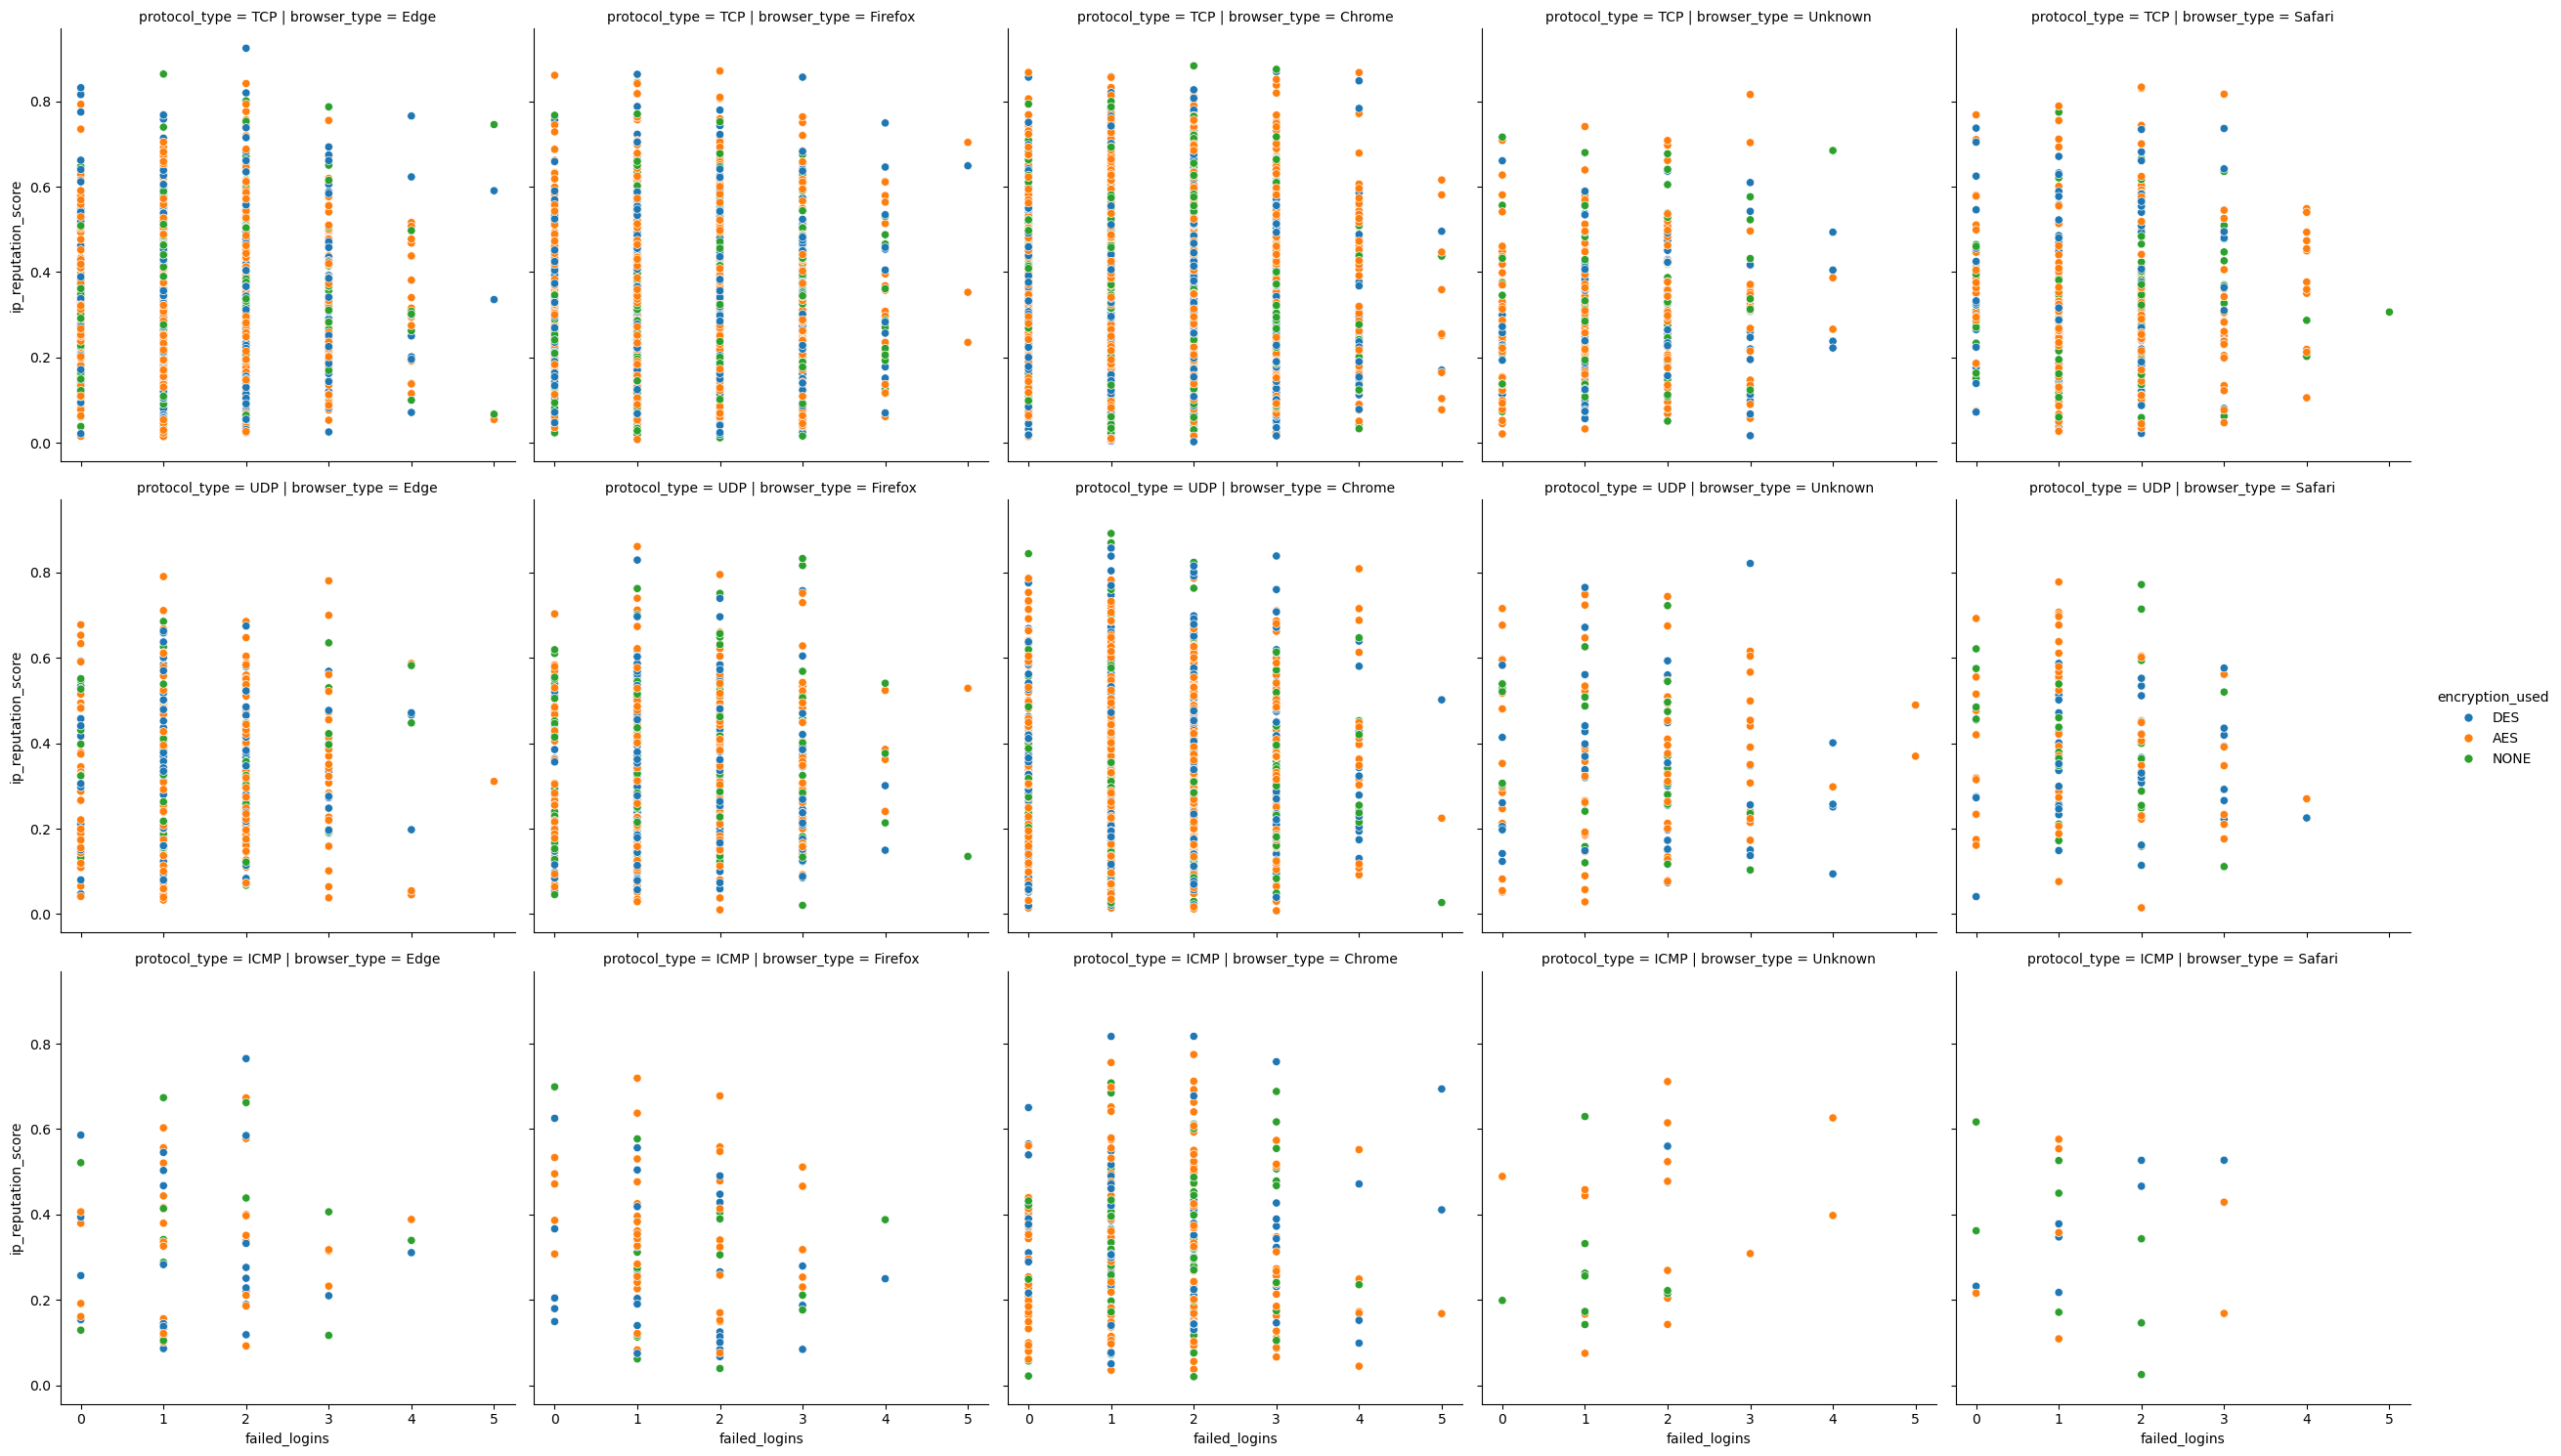

In [78]:
sns.relplot(data=df_clean, 
            x='failed_logins', 
            y='ip_reputation_score',
            hue='encryption_used',
            col='browser_type',
            row='protocol_type')
plt.show()

### Trend Plot – Joint Distribution of the `network_packet_size` and `login_attempts` Continuous Variables, with Fitted Linear Regression and Confidence Interval

Login attempts appear as horizontal stripes at integer counts across the full range of packet sizes — attempts from 1 up to ~13 occur at many packet sizes, with the highest attempt counts concentrated more in small-to-mid packet sizes and fewer high-attempt sessions at very large packet sizes (>~1000); overall there’s no strong linear relationship.

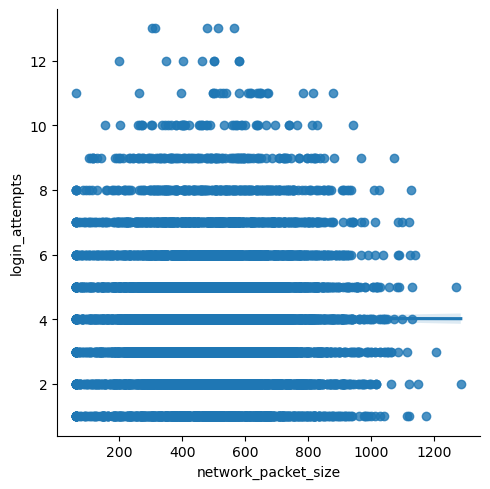

In [79]:
sns.lmplot(data=df_clean, 
           x='network_packet_size', 
           y='login_attempts')
plt.show()

### Trend Plot – Joint Distribution of the `login_attempts` and `session_duration` Continuous Variables, with Fitted Linear Regression and Confidence Interval

The points form clear vertical stripes at each integer attempt, with session durations widely spread at low attempt counts and a shrinking upper range as attempts increase (the plotted horizontal line shows the central tendency around the mid‑hundreds to ~800s), so long sessions are mostly associated with few login attempts while high attempt counts tend to occur in shorter sessions as this suggests a negative relationship between login attempts and session duration.

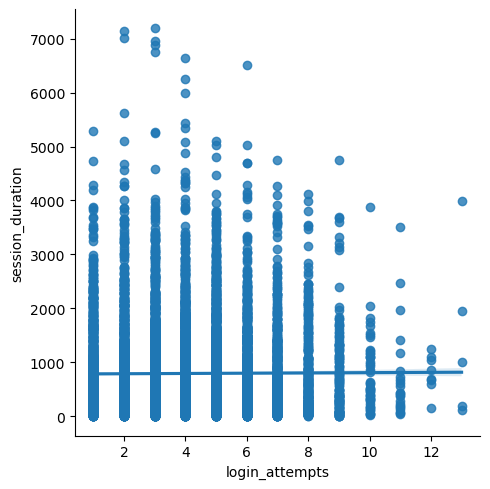

In [80]:
sns.lmplot(data=df_clean, 
           x='login_attempts', 
           y='session_duration')
plt.show()

### Trend Plot – Joint Distribution of the `session_duration` and `ip_reputation_score` Continuous Variables, Colored by `browser_type` Categorical Variable, with Fitted Linear Regression and Confidence Interval

Most sessions are short (dense cloud near the left) and IP reputation values span the full 0–0.9 range at almost every duration, the per‑browser trend lines are essentially flat with wide confidence bands (a tiny negative slope for some browsers and a slight positive one for Safari that overlaps zero), and browser types overlap heavily — in short, there’s no strong monotonic relationship visible and any signal is weak and likely driven by a small number of long‑duration outliers.

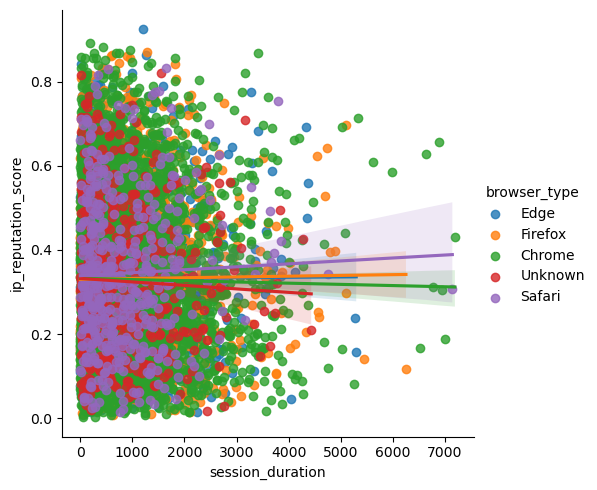

In [81]:
sns.lmplot(data=df_clean, 
           x='session_duration', 
           y='ip_reputation_score',
           hue='browser_type')
plt.show()

### Trend Plot – Joint Distribution of the `login_attempts` and `network_packet_size` Continuous Variables, Colored by `encryption_used` Categorical Variable, with Fitted Linear Regression and Confidence Interval

The plot shows clear vertical stripes at integer login_attempts with packet sizes spanning roughly 0–1300 bytes at nearly every attempt count, and the per‑encryption trend lines lie close together (around ~450–500) indicating almost no separation by encryption type; there’s a slight thinning of very large packet sizes at the highest login_attempts (>10) but overall no strong monotonic relationship and packet size and login attempts largely overlap for DES, AES, and NONE.

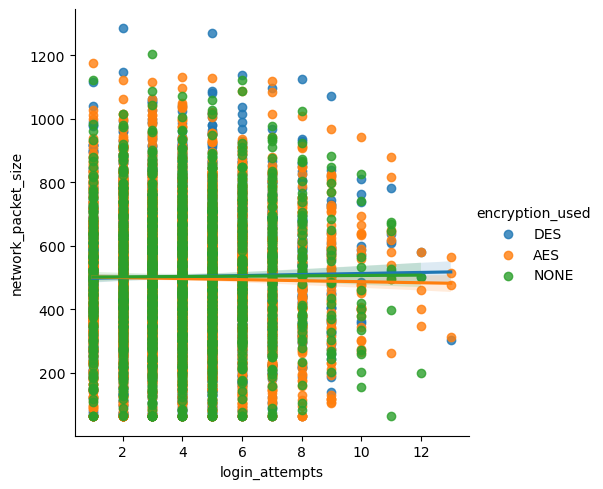

In [82]:
sns.lmplot(data=df_clean, 
           x='login_attempts', 
           y='network_packet_size',
           hue='encryption_used')
plt.show()

### Correlation Plots - Correlation Matrix of All Numerical Variables


Failed logins shows the strongest positive association with attacks (≈0.36), followed by login attempts (≈0.28) and then IP reputation score (≈0.21). Session duration has a very weak positive relationship with attack detected (≈0.04), while network packet size and unusual time access are essentially uncorrelated with attacks (≈−0.01 and ≈0.01, respectively). Among the predictors there is no meaningful multicollinearity as network packet size, login attempts, session duration, IP reputation score, failed logins and unusual time access all have correlations clustered near zero (roughly −0.01 to +0.02), so no pair stands out as strongly redundant failed logins and login attempts are the primary linear signals associated with attack labels, IP reputation score contributes a smaller but noticeable positive signal, and everything else shows minimal linear association.

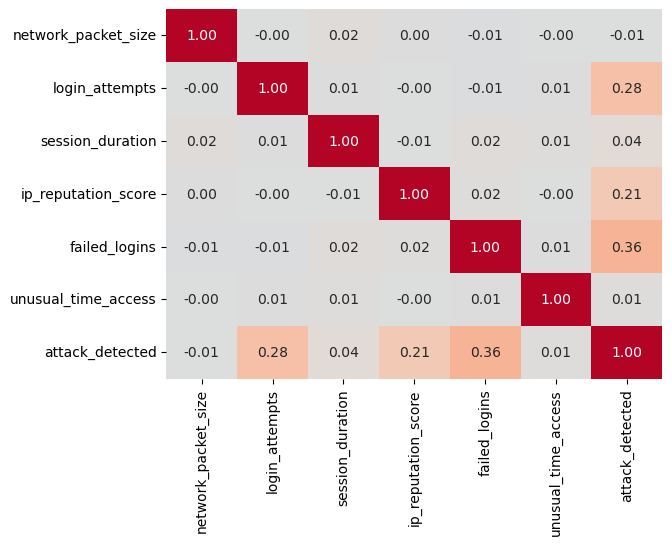

In [83]:
fig, ax = plt.subplots()
sns.heatmap(data=df_clean.corr(numeric_only=True),
            vmin=-1, 
            vmax=1, 
            center=0,
            cmap='coolwarm', 
            cbar=False,
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10},
            ax=ax)
plt.show()

### Correlation Plots – Correlation Matrix of All Numerical Variables, Faceted by `browser_type` Categorical Variable

For Edge the primary linear signals for attack detection are failed logins and login attempts, IP reputation score provides a smaller signal, and the rest of the features show minimal linear relationships; for Firefox the primary linear signals for attack detection are failed logins and login attempts, IP reputation score provides a smaller signal, and the other features show minimal linear relationships; for Chrome failed logins and login attempts are the primary linear signals for attack detection, IP reputation score provides a smaller signal, and the remaining features show minimal linear relationships; for the Unknown browser group, login attempts is the dominant linear signal for attack detection, failed logins and IP reputation score contribute weaker signals, and the other features show minimal linear relationships; in short, for Safari failed logins and login attempts are the primary linear signals for attack detection, IP reputation score provides a modest signal, and the remaining features show minimal linear relationships.

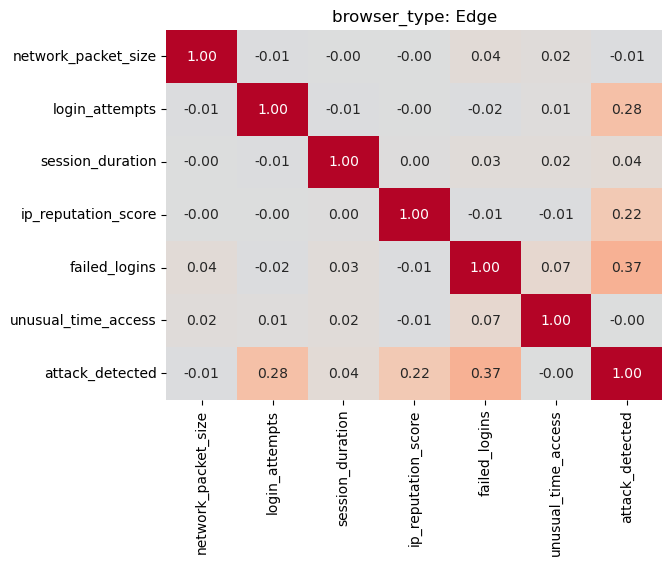

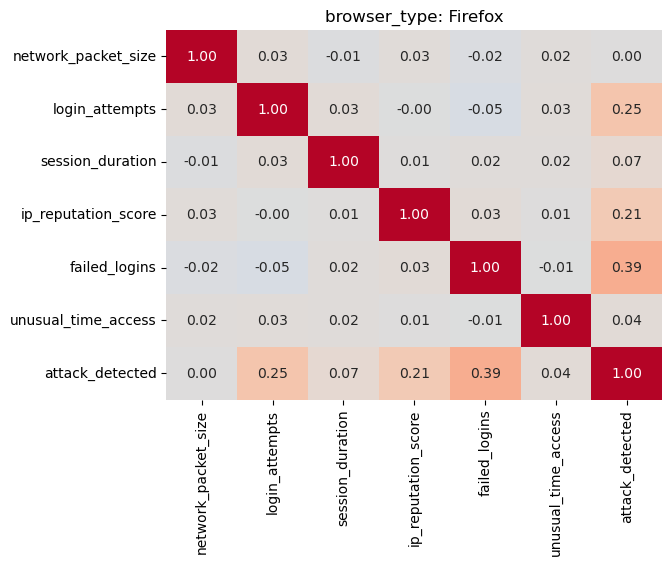

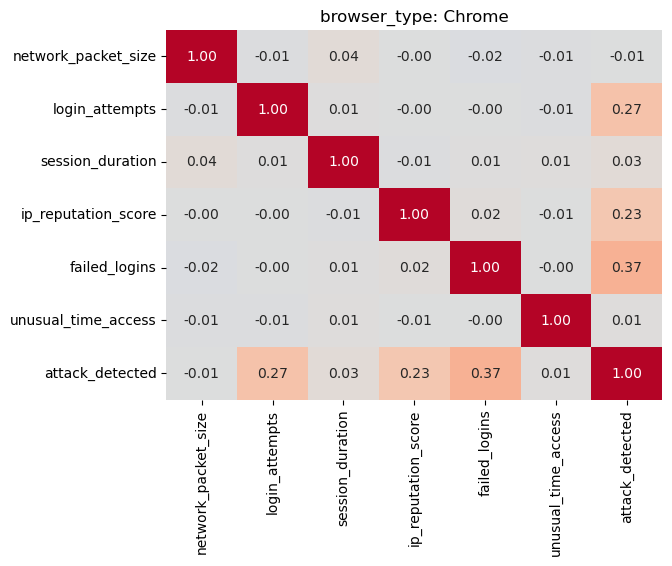

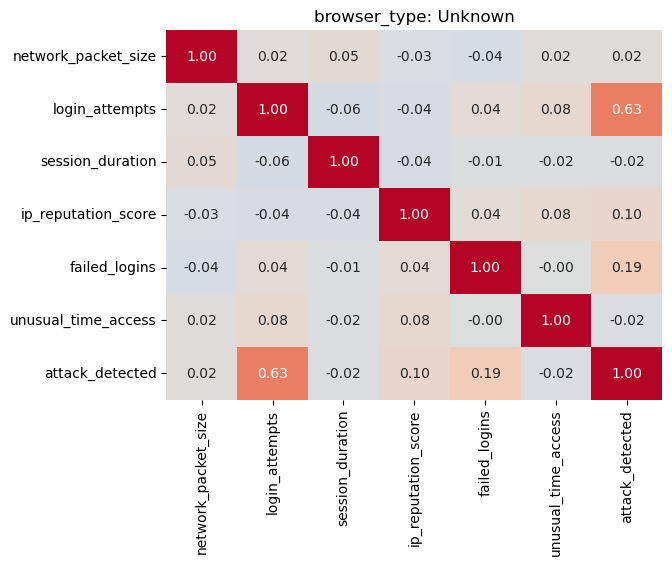

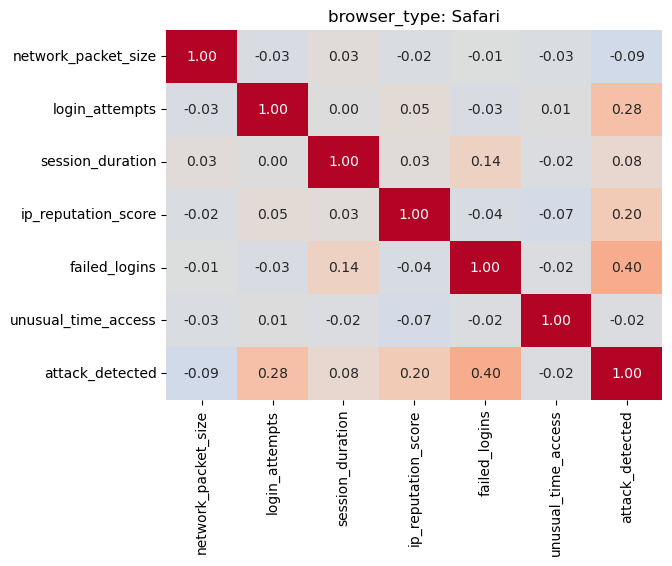

In [84]:
browser_types = df_clean['browser_type'].unique()
for browser_type in browser_types:
    fig, ax = plt.subplots()
    subset = df_clean[df_clean['browser_type'] == browser_type]
    sns.heatmap(data=subset.corr(numeric_only=True),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='coolwarm',
                cbar=False,
                annot=True,
                fmt='.2f',
                annot_kws={'size': 10},
                ax=ax)
    ax.set_title(f'browser_type: {browser_type}')
    plt.show()

### Correlation Plots – Correlation Matrix of All Numerical Variables, Faceted by `encryption_used` Categorical Variable

Across the three encryption groups the diagonal shows perfect self‑correlation and most off‑diagonal values are very small, and in all cases the strongest linear signals for attack detected are failed logins (DES ≈0.38, AES ≈0.36, NONE ≈0.35) and login attempts (DES ≈0.28, AES ≈0.27, NONE ≈0.28), with IP reputation score providing a smaller positive signal (DES ≈0.20, AES ≈0.22, NONE ≈0.20); session duration is a very weak positive signal for DES and AES (≈0.05) and essentially zero for NONE (≈0.00), unusual time access is negligible (DES ≈−0.01, AES ≈0.01, NONE ≈0.02), and network packet size is effectively zero or slightly negative (DES ≈−0.03, AES ≈0.00, NONE ≈−0.01), so overall failed_logins and login_attempts are the primary linear predictors of detected attacks across encryption types, IP reputation adds a smaller contribution, and the remaining features show minimal linear relationships.

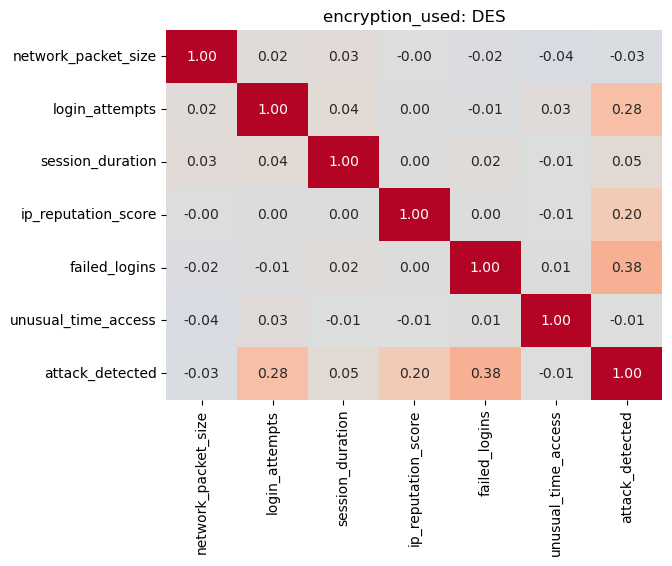

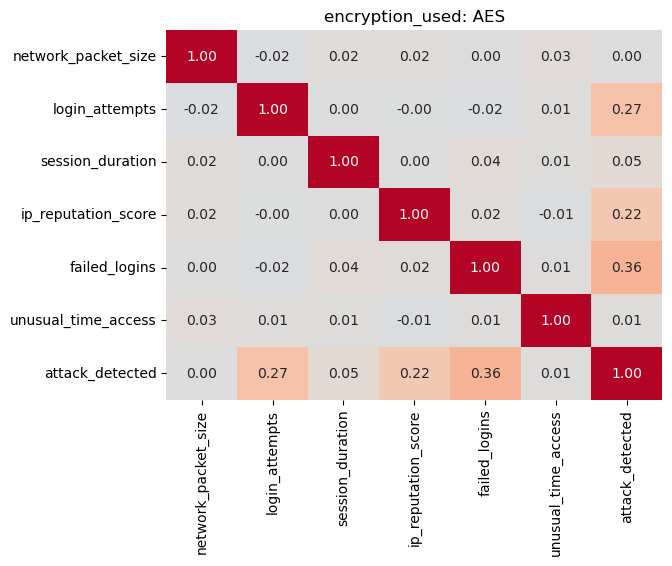

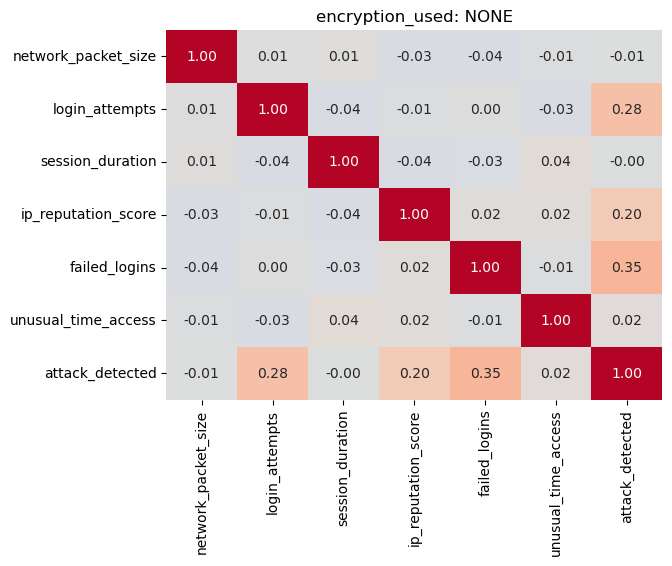

In [85]:
encryptions_used = df_clean['encryption_used'].unique()
for encryption_used in encryptions_used:
    fig, ax = plt.subplots()
    subset = df_clean[df_clean['encryption_used'] == encryption_used]
    sns.heatmap(data=subset.corr(numeric_only=True),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='coolwarm',
                cbar=False,
                annot=True,
                fmt='.2f',
                annot_kws={'size': 10},
                ax=ax)
    ax.set_title(f'encryption_used: {encryption_used}')
    plt.show()

### Correlation Plots – Correlation Matrix of All Numerical Variables, Faceted by `protocol_type` Categorical Variable

These three protocol‑specific correlation heatmaps show very similar patterns: the diagonal entries are 1.00 and the strongest linear signals for attack detected are failed logins (TCP ≈0.37, UDP ≈0.33, ICMP ≈0.37) and login attempts (TCP ≈0.28, UDP ≈0.28, ICMP ≈0.29), with IP reputation score providing a smaller positive association (TCP ≈0.21, UDP ≈0.21, ICMP ≈0.20); session duration has a tiny positive relationship (TCP ≈0.04, UDP ≈0.05, ICMP ≈0.03), network packet size is essentially zero or slightly negative (≈−0.01 to 0.02), and unusual time access is negligible (≈−0.01 to 0.02), so overall failed logins and login attempts are the primary linear predictors of detected attacks across TCP/UDP/ICMP, IP reputation adds a modest signal, and the remaining features show minimal linear relationships.

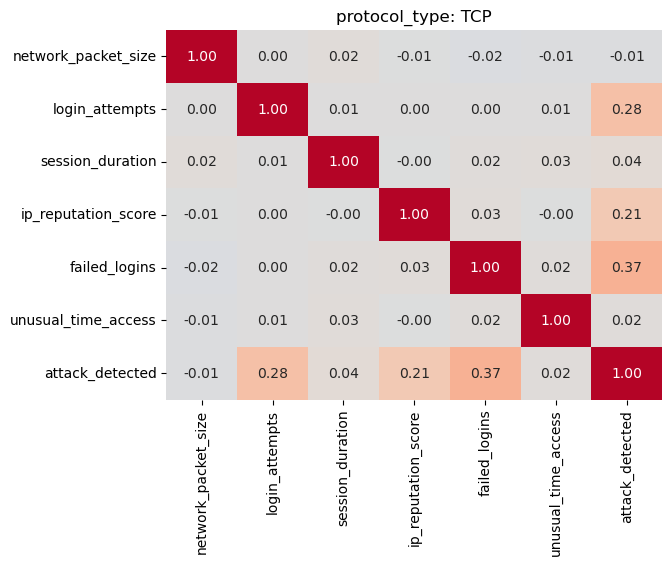

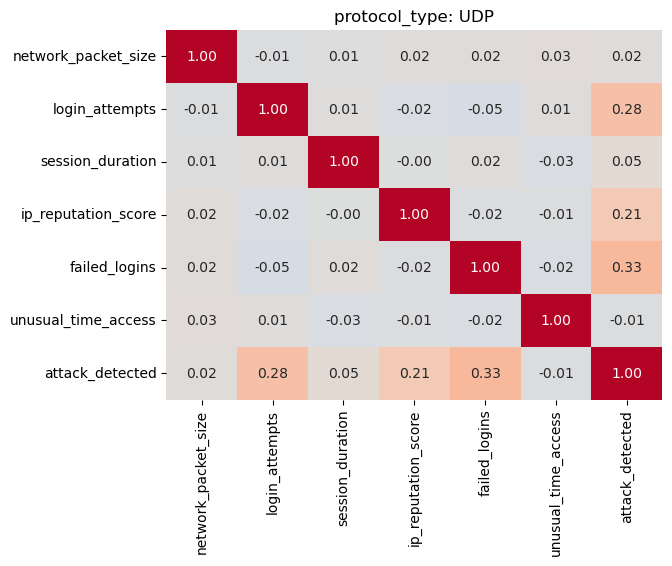

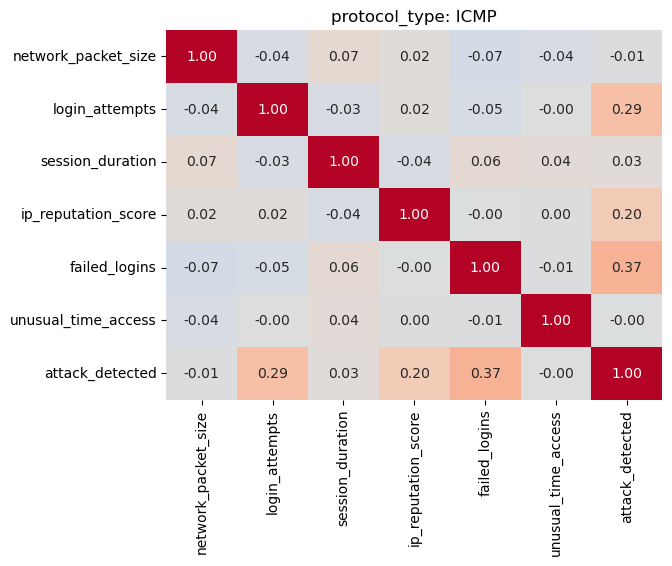

In [86]:
protocol_types = df_clean['protocol_type'].unique()
for protocol_type in protocol_types:
    fig, ax = plt.subplots()
    subset = df_clean[df_clean['protocol_type'] == protocol_type]
    sns.heatmap(data=subset.corr(numeric_only=True),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='coolwarm',
                cbar=False,
                annot=True,
                fmt='.2f',
                annot_kws={'size': 10},
                ax=ax)
    ax.set_title(f'protocol_type: {protocol_type}')
    plt.show()

### Heat Map – Counts of Observations for Each Combination of `browser_type` and `encryption_used` Categorical Variables


Chrome dominates with 2,541 AES, 1,541 DES and 1,055 NONE sessions; Firefox has 925 AES, 602 DES, 417 NONE; Edge 735 AES, 448 DES, 286 NONE; Safari 244 AES, 138 DES, 103 NONE; and Unknown 261 AES, 136 DES, 105 NONE as AES is the most common encryption across every browser, DES is the second-most used (notably present despite being weak), and NONE (unencrypted) is nontrivial especially for Chrome and Firefox.

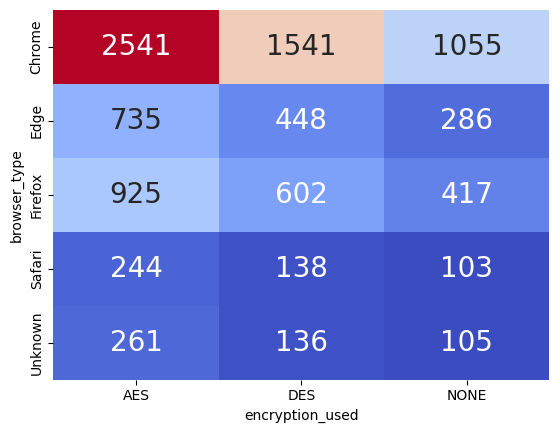

In [87]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab(df_clean.browser_type, 
                        df_clean.encryption_used), 
                        ax=ax,
                        annot=True, 
                        annot_kws={'size': 20}, 
                        fmt='d',
                        cmap='coolwarm',
                        cbar=False)
plt.show()

### Heat Map – Counts of Observations for Each Combination of `encryption_used` and `protocol_type` Categorical Variables

AES sessions are 248 ICMP, 3,241 TCP and 1,217 UDP; DES sessions are 147 ICMP, 1,994 TCP and 724 UDP; NONE (unencrypted) sessions are 112 ICMP, 1,389 TCP and 465 UDP—TCP is the dominant protocol across every encryption type, UDP is the second most common, and ICMP is the least frequent; AES-encrypted TCP traffic is by far the largest cell, indicating most traffic is encrypted TCP, DES and NONE counts are smaller but nontrivial (DES especially), and the presence of NONE/UDP traffic suggests some unencrypted or less common flows to investigate.

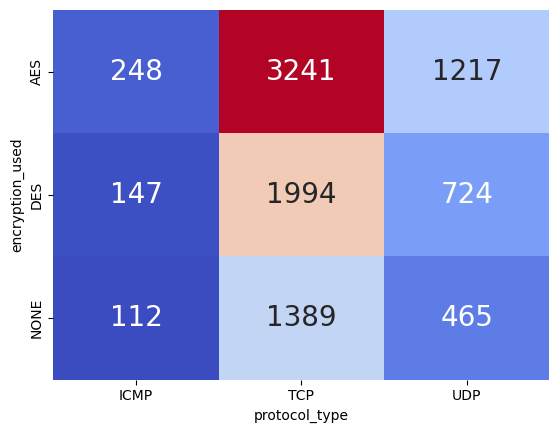

In [88]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab(df_clean.encryption_used, 
                        df_clean.protocol_type ), 
                        ax=ax,
                        annot=True, 
                        annot_kws={'size': 20}, 
                        fmt='d',
                        cmap='coolwarm',
                        cbar=False)
plt.show()

## Final Summation of EDA and Key Features for Modeling

The exploratory data analysis of the Cybersecurity Intrusion Detection dataset, comprising 9,537 cleaned records, revealed a balanced binary target variable `attack_detected` with approximately 44% attack instances. Univariate analyses showed right-skewed distributions for `network_packet_size` and `session_duration`, discrete counts for `login_attempts` and `failed_logins`, and mostly zero values for `unusual_time_access`. Categorical variables like `protocol_type` (dominated by TCP), `encryption_used` (AES most common), and `browser_type` (Chrome leading) exhibited varying volumes but similar attack rates across categories, except for `browser_type` where 'Unknown' showed a markedly higher attack rate (~72% vs. ~41-45% for others). Bivariate and multivariate visualizations, including scatter plots and correlation matrices, indicated that `failed_logins` (correlation 0.36), `login_attempts` (0.28), and `ip_reputation_score` (0.21) are the strongest linear predictors of attacks, with attacked sessions showing higher values in these features. In contrast, `network_packet_size`, `session_duration`, and `unusual_time_access` showed minimal associations with the target. For modeling `attack_detected`, key features should include `failed_logins`, `login_attempts`, `ip_reputation_score`, `browser_type` (especially distinguishing 'Unknown'), and potentially `protocol_type` and `encryption_used` for interaction effects, while considering feature engineering to capture non-linear relationships and addressing class imbalance if necessary.